<a href="https://colab.research.google.com/github/Aarrigui94/Centrales-de-riesgo/blob/main/EDA_base_clientes1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargue del dataset "base_clientes1"**

**El dataset "base_clientes1" ya cuenta con un proceso de ETL (Extracción, Transformación y Carga), lo que significa que los datos han sido correctamente extraídos de su fuente original, transformados para asegurar su calidad, consistencia y formato adecuado, y finalmente cargados en un entorno listo para su análisis, garantizando que se pueda trabajar con datos limpios y estructurados.**

In [1]:
#Instalación de paquetes
!pip install pingouin
!pip install plotly

In [68]:
#Librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
import plotly.express as px

import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import PowerTransformer

from scipy.stats.mstats import winsorize


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix

# **Descripción del dataframe**

In [3]:
# Cargar el archivo Excel desde Colab
base_clientes1 = pd.read_excel('/content/base_clientes1.xlsx')

# Mostrar las primeras filas del DataFrame
base_clientes1.head()

FECHA DESEMBOLSO  VALOR_CREDITO  PLAZO_MESES          LINEA    SUBTIPO  \
0       2021-07-07         107756            9           SOAT  RETANQUEO   
1       2020-08-28         109541           12  COCINA Y ASEO    VIGENTE   
2       2020-06-13         130650            4           SOAT   RECOMPRA   
3       2020-08-05         151101            3           SOAT   RECOMPRA   
4       2020-07-02         158539           12  OTROS MUEBLES      NUEVO   

   EDAD       SEXO  PERSONAS_A_CARGO  ESTADOCIVIL           ESTUDIOS  ...  \
0    46  MASCULINO                 0       CASADO  TECNICO/TECNOLOGO  ...   
1    55  MASCULINO                 0      SOLTERO       BACHILLERATO  ...   
2    54   FEMENINO                 2      SOLTERO       BACHILLERATO  ...   
3    40  MASCULINO                 2  UNION LIBRE  TECNICO/TECNOLOGO  ...   
4    52   FEMENINO                 1      SOLTERO       BACHILLERATO  ...   

  CUOTA_ALDIA_SECTOR_FINANCIERO_Y_TARJETASDECREDITO  \
0                                                 0   
1                                               847   
2                                                 0   
3                                               286   
4                                               366   

   NUMERO_OBLIG_SECTORFINANCIERO_Y_TARJETASDECREDITO  \
0                                                  0   
1                                                  1   
2                                                  2   
3                                                  1   
4                                                  5   

  NUMERO_OBLIG_ALDIA_SECTORFINANCIERO_Y_TARJETASDECREDITO  \
0                                                  0        
1                                                  1        
2                                                  2        
3                                                  1        
4                                                  5        

   SALDO_ALDIA_SECTORFINANCIERO_Y_TARJETASDECREDITO  \
0                                                 0   
1                                             60780   
2                                               209   
3                                               851   
4                                             11616   

  SALDO_TOTAL_SECTORFIANCIERO_Y_TARJETASDECREDITO  \
0                                               0   
1                                           60780   
2                                             209   
3                                             851   
4                                           11616   

               ESTADO_OBLIGACIONES        REGION       SUCURSAL  \
0      SIN OBLIGACIONES EN SF Y TC        LLANOS  VILLAVICENCIO   
1  OBLIGACIONES ACTIVAS EN SF Y TC  TOLIMA HUILA         IBAGUE   
2  OBLIGACIONES ACTIVAS EN SF Y TC        LLANOS          YOPAL   
3  OBLIGACIONES ACTIVAS EN SF Y TC        LLANOS          YOPAL   
4  OBLIGACIONES ACTIVAS EN SF Y TC     EJE-VALLE      MANIZALES   

   COMPORTAMIENTO_PAGO  CUENTAS_EMBARGADAS  
0                    0                   0  
1                    1                   0  
2                    0                   0  
3                    0                   0  
4                    0                   0  

[5 rows x 41 columns]

In [4]:
from google.colab import drive
drive.mount('/content/drive')
base_clientes1 = pd.read_excel('/content/drive/MyDrive/base_clientes1.xlsx')

Mounted at /content/drive


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/base_clientes1.xlsx'

In [ ]:
# Cargar el archivo Excel desde Colab
base_clientes1 = pd.read_excel('/content/base_clientes1.xlsx')

# Mostrar las primeras filas del DataFrame
base_clientes1.head()

In [5]:
# Contar el número de filas y columnas, y clasificar las variables en cualitativas y cuantitativas

# Contar filas y columnas
filas, columnas = base_clientes1.shape

# Separar las columnas cualitativas (object) y cuantitativas (numéricas: int64, float64)
cualitativas = base_clientes1.select_dtypes(include=['object']).columns
cuantitativas = base_clientes1.select_dtypes(include=['int64', 'float64']).columns

# Contar las columnas cualitativas y cuantitativas
num_cualitativas = len(cualitativas)
num_cuantitativas = len(cuantitativas)

# Imprimir resultados
print(f'Filas: {filas}, Columnas: {columnas}')
print(f'Variables cualitativas: {num_cualitativas}, Variables cuantitativas: {num_cuantitativas}')

Filas: 18142, Columnas: 41
Variables cualitativas: 11, Variables cuantitativas: 29



El dataset contiene 18.142 y 41 variables, de las cuales 11 son categóricas y 29 númericas.

In [6]:
# Ver el tipo de dato de cada columna
tipos_de_dato = base_clientes1.dtypes
print(tipos_de_dato)

FECHA DESEMBOLSO                                           datetime64[ns]
VALOR_CREDITO                                                       int64
PLAZO_MESES                                                         int64
LINEA                                                              object
SUBTIPO                                                            object
EDAD                                                                int64
SEXO                                                               object
PERSONAS_A_CARGO                                                    int64
ESTADOCIVIL                                                        object
ESTUDIOS                                                           object
TIPO_VIVIENDA                                                      object
TIEMPO__VIVIENDA                                                    int64
DEPTO                                                              object
ANTIGUEDAD_LABORAL_MESES              

# **Análisis Exploratorio de Datos - EDA**

---



**Validación de datos**

In [7]:
# Porcentaje de valores nulos en variables cuantitativas
nulos_cuantitativos = base_clientes1.select_dtypes(include=['int64', 'float64']).isnull().mean() * 100
print("Porcentaje de valores nulos en variables cuantitativas:\n", nulos_cuantitativos)

# Porcentaje de valores nulos en variables cualitativas
nulos_cualitativos = base_clientes1.select_dtypes(include=['object']).isnull().mean() * 100
print("\nPorcentaje de valores nulos en variables cualitativas:\n", nulos_cualitativos)

Porcentaje de valores nulos en variables cuantitativas:
 VALOR_CREDITO                                              0.0
PLAZO_MESES                                                0.0
EDAD                                                       0.0
PERSONAS_A_CARGO                                           0.0
TIEMPO__VIVIENDA                                           0.0
ANTIGUEDAD_LABORAL_MESES                                   0.0
SALARIO_MENSUAL                                            0.0
ESTRATO                                                    0.0
PUNTAJE                                                    0.0
CUOTA_MENSUAL_SECTOR_REAL                                  0.0
CUOTA_DIA_TOTAL                                            0.0
NUMERO_OBLI_SECTOR_REAL                                    0.0
NUMERO_OBLI_TOTAL                                          0.0
NUMERO_OBLI_ALDIA_SECTOR_REAL                              0.0
NUMERO_OBLI_ALDIA_TOTAL                                    0.

In [8]:
#validación de la variable ESTRATO
base_clientes1['ESTRATO'].unique()

array([2, 1, 3, 4, 6, 5])

Se ajusta la variable ESTRATO a tipo cualitativa.

In [9]:
# Copia del dataset original
base_clientes1_ajus = base_clientes1.copy()

# Definir un diccionario para mapear los valores numéricos a las etiquetas cualitativas
estrato_labels = {
    1: 'ESTRATO 1',
    2: 'ESTRATO 2',
    3: 'ESTRATO 3',
    4: 'ESTRATO 4',
    5: 'ESTRATO 5',
    6: 'ESTRATO 6'
}

# Reemplazar los valores de la columna 'ESTRATO' con las etiquetas cualitativas
base_clientes1_ajus['ESTRATO'] = base_clientes1_ajus['ESTRATO'].map(estrato_labels)

# Verificar los cambios
print(base_clientes1_ajus['ESTRATO'].unique())

['ESTRATO 2' 'ESTRATO 1' 'ESTRATO 3' 'ESTRATO 4' 'ESTRATO 6' 'ESTRATO 5']


In [10]:
# Contar el número de filas y columnas, y clasificar las variables en cualitativas y cuantitativas

# Contar filas y columnas
filas, columnas = base_clientes1_ajus.shape

# Separar las columnas cualitativas (object) y cuantitativas (numéricas: int64, float64)
cualitativas = base_clientes1_ajus.select_dtypes(include=['object']).columns
cuantitativas = base_clientes1_ajus.select_dtypes(include=['int64', 'float64']).columns

# Contar las columnas cualitativas y cuantitativas
num_cualitativas = len(cualitativas)
num_cuantitativas = len(cuantitativas)

# Imprimir resultados
print(f'Filas: {filas}, Columnas: {columnas}')
print(f'Variables cualitativas: {num_cualitativas}, Variables cuantitativas: {num_cuantitativas}')

Filas: 18142, Columnas: 41
Variables cualitativas: 12, Variables cuantitativas: 28


In [11]:
# Ver el tipo de dato de cada columna
tipos_de_dato = base_clientes1_ajus.dtypes
print(tipos_de_dato)

# Inicializar listas para clasificar las variables
continuas = []
discretas = []
binomiales = []
nominales = []
ordinales = []
razon = []
intervalo = []
dummy = []
temporales = []

# Definir posibles valores ordinales conocidos (si los hay)
valores_ordinales_conocidos = {
    'nivel_satisfaccion': ['bajo', 'medio', 'alto'],
    'nivel_educativo': ['primaria', 'secundaria', 'universitaria', 'postgrado'],
    # Agrega más variables ordinales conocidas aquí si es necesario
}

# Clasificar cada variable en función de sus características
for columna in base_clientes1_ajus.columns:
    num_unicos = base_clientes1_ajus[columna].nunique()

    if 'datetime' in str(tipos_de_dato[columna]):
        temporales.append(columna)
    elif tipos_de_dato[columna] == 'float64':
        # Considerar como variable de razón (continua) si no se ajusta a intervalo
        if num_unicos > 20:
            razon.append(columna)
        else:
            continuas.append(columna)
    elif tipos_de_dato[columna] == 'int64':
        if num_unicos == 2:
            binomiales.append(columna)
        elif num_unicos <= 20:
            discretas.append(columna)
        elif num_unicos > 20:
            razon.append(columna)  # La mayoría de las variables numéricas con muchos valores únicos son de razón
    elif tipos_de_dato[columna] == 'object':
        if num_unicos == 2:
            dummy.append(columna)
        elif columna in valores_ordinales_conocidos:
            ordinales.append(columna)
        else:
            nominales.append(columna)

# Clasificación final para variables de intervalo
# Si una variable tiene valores con un cero arbitrario (ej. temperatura en Celsius), podría ser de intervalo
intervalo.extend([col for col in continuas if col not in razon])

# Mostrar las listas de variables clasificadas
print("Variables continuas:", continuas)
print("Variables discretas:", discretas)
print("Variables binomiales:", binomiales)
print("Variables categóricas nominales:", nominales)
print("Variables categóricas ordinales:", ordinales)
print("Variables de razón:", razon)
print("Variables de intervalo:", intervalo)
print("Variables dummy:", dummy)
print("Variables temporales:", temporales)

FECHA DESEMBOLSO                                           datetime64[ns]
VALOR_CREDITO                                                       int64
PLAZO_MESES                                                         int64
LINEA                                                              object
SUBTIPO                                                            object
EDAD                                                                int64
SEXO                                                               object
PERSONAS_A_CARGO                                                    int64
ESTADOCIVIL                                                        object
ESTUDIOS                                                           object
TIPO_VIVIENDA                                                      object
TIEMPO__VIVIENDA                                                    int64
DEPTO                                                              object
ANTIGUEDAD_LABORAL_MESES              

Dado que la variable 'ESTRATO' se analaizará en el EDA como una variable cualitativa, el dataset actual contiene 18.142 y 41 variables, de las cuales 12 son categóricas y 28 númericas.

# **Variables Cualitativas**

In [12]:
# Filtrar solo las variables cualitativas (category o object)
variables_cualitativas = base_clientes1_ajus.select_dtypes(include=['category', 'object'])

# Generar el resumen de las variables cualitativas
resumen_cualitativas = variables_cualitativas.describe()

# Mostrar el resumen
print(resumen_cualitativas)

             LINEA SUBTIPO      SEXO ESTADOCIVIL      ESTUDIOS TIPO_VIVIENDA  \
count        18142   18142     18142       18142         18142         18142   
unique          18       5         2           4             5             3   
top     TELEVISION   NUEVO  FEMENINO     SOLTERO  BACHILLERATO     ARRENDADA   
freq          3933   10005     10026        8092         11491          6308   

        DEPTO  TIPO_CONTRATO    ESTRATO              ESTADO_OBLIGACIONES  \
count   18142          18142      18142                            18142   
unique     21              5          6                                3   
top      META  INDEPENDIENTE  ESTRATO 2  OBLIGACIONES ACTIVAS EN SF Y TC   
freq     3970           8775      12854                            10531   

        REGION SUCURSAL  
count    18142    18142  
unique       5       34  
top     LLANOS    YOPAL  
freq      6403     1617  


## **Participación según variable**

In [15]:
# Filtrar solo las variables de tipo 'object'
variables_cualitativas = base_clientes1_ajus.select_dtypes(include=['object'])

# Crear gráfico de barras para cada variable cualitativa, organizado de mayor a menor
for col in variables_cualitativas.columns:
    # Calcular los conteos
    count_data = base_clientes1_ajus[col].value_counts().reset_index()
    count_data.columns = [col, 'Número de Clientes']
    count_data['Porcentaje'] = (count_data['Número de Clientes'] / count_data['Número de Clientes'].sum()) * 100

    # Crear gráfico de barras
    fig = px.bar(count_data,
                 x=col,
                 y='Número de Clientes',
                 text='Porcentaje',
                 color=col,
                 color_discrete_sequence=px.colors.sequential.Turbo,  # Colores en tonos turquesa
                 labels={col: col, 'Número de Clientes': 'Número de Clientes'},
                 title=f"DISTRIBUCIÓN DE LA VARIABLE {col}",
                 template='plotly_white')

    # Actualizar el diseño del gráfico
    fig.update_traces(texttemplate='%{text:.1f}%', textposition='outside', marker=dict(line=dict(width=1, color='black')))
    fig.update_layout(title_font_size=22, title_x=0.5, xaxis_title_font=dict(size=16), yaxis_title_font=dict(size=16),
                      xaxis_tickfont=dict(size=12), yaxis_tickfont=dict(size=12),
                      showlegend=False)

    # Mostrar el gráfico
    fig.show()

**Línea de crédito:** Las principales categorías de productos adquiridos son televisores, neveras y lavadoras, que representan más del 58% del total de clientes, lo que evidencia una alta demanda de bienes electrónicos y electrodomésticos esenciales.

**Subtipo de cliente:** El 55.1% de los clientes corresponden a clientes nuevos, mientras que la recompra se sitúa en 22.4%, lo que indica que la base de clientes está creciendo principalmente por nuevos usuarios.

**Sexo:** El 55.3% de los clientes son mujeres, lo que revela una ligera predominancia femenina en el acceso a los servicios analizados.

**Estado civil:** Los clientes solteros constituyen el 44.6% del total, seguidos por aquellos en unión libre (36.3%), lo que podría influir en las estrategias comerciales dirigidas a estos grupos.

**Nivel de estudios:** El 63.3% de los clientes tienen estudios a nivel de bachillerato, indicando que la mayoría cuenta con un nivel educativo básico.

**Tipo de vivienda:** Se observa una distribución equilibrada entre quienes viven en viviendas arrendadas (34.8%), familiares (34.4%) y propias (30.9%).

**Departamento de residencia:** La mayor parte de los clientes proviene del Meta (21.9%), Casanare (12.3%) y Caldas (11.8%), destacando una concentración regional.

**Tipo de contrato:** Casi la mitad de los clientes (48.4%) son independientes, seguidos por quienes tienen contrato indefinido (41.7%), lo cual podría tener implicaciones en la estabilidad financiera de los usuarios.

**Estrato:** Más del 90% de los clientes indican ser del estrato1 y 2.

**Estado de obligaciones:** El 58% de los clientes tienen obligaciones activas, lo que sugiere un alto nivel de endeudamiento entre los usuarios, que debe ser monitoreado cuidadosamente.

**Region:** El 35,3% de los clientes indican encontrarse en los Llanos.

**Sucursal** Más del 32% de los clientes solicitaron un crédito en la sucursal de Yopal, Pereira,Acacias y Villavicencio.

**Además se grafica la variable de interés "COMPORTAMIENTO_PAGO", que si bien es numérica se codifica las opciones de respuesta de la siguiente manera: "0" = "Puntual", "1" = "Moroso"**

**Se evidencia que la mayoría de los clientes cumplen con sus pagos a tiempo, pero una parte significativa (24%) no lo hace, lo que puede ser clave para tomar decisiones.**

**Dado que los morosos representan una minoría significativa, se debe tener en cuenta esto para el balanceo e implementar métodos que permitan corregir esta situación.**




**Además, es esencial validar cómo cada opción de respuesta de la variable principal (COMPORTAMIENTO_PAGO) se distribuye a lo largo de las demás variables cualitativas. Esto permitirá identificar patrones o factores que influyan en el comportamiento de pago de los clientes, ya que diferentes categorías en las variables cualitativas podrían estar asociadas a una mayor probabilidad de ser "Puntual" o "Moroso".**

## **Participación de cada variable (Cualitativa) frente a variable principal 'COMPORTAMIENTO_PAGO'**

In [18]:
# Crear una copia del dataset
base_clientes_copy = base_clientes1_ajus.copy()

# Convertir los valores de la variable 'COMPORTAMIENTO_PAGO' a categóricos con las etiquetas correspondientes
base_clientes_copy['COMPORTAMIENTO_PAGO'] = base_clientes_copy['COMPORTAMIENTO_PAGO'].replace({0: 'Puntual', 1: 'Moroso'})

# Filtrar solo las variables de tipo 'object' (cualitativas)
qualitative_vars = base_clientes_copy.select_dtypes(include='object')

# Colores en tonos de azul oscuro y claro
colors = ['#1f77b4', '#aec7e8']  # Azul oscuro y azul claro

# Graficar cada una de las variables cualitativas según la variable 'COMPORTAMIENTO_PAGO', mostrando porcentajes
for column in qualitative_vars.columns:
    # Crear una tabla de frecuencia cruzada para calcular los porcentajes
    crosstab = pd.crosstab(base_clientes_copy[column], base_clientes_copy['COMPORTAMIENTO_PAGO'], normalize='index') * 100
    crosstab = crosstab.reset_index()  # Reiniciar índice para poder usar Plotly

    # Crear gráfico de barras apiladas
    fig = px.bar(crosstab,
                 x=column,
                 y=['Puntual', 'Moroso'],
                 color_discrete_sequence=colors,
                 title=f'Distribución porcentual de {column} según COMPORTAMIENTO_PAGO',
                 labels={'value': 'Porcentaje', column: column})

    # Calcular y agregar etiquetas de datos
    fig.for_each_trace(lambda t: t.update(text=[f"{val:.1f}%" for val in t.y], textposition='inside'))

    # Actualizar el diseño del gráfico
    fig.update_traces(marker=dict(line=dict(width=1, color='black')))
    fig.update_layout(title_font_size=22, title_x=0.5,
                      xaxis_title_font=dict(size=16),
                      yaxis_title_font=dict(size=16),
                      xaxis_tickfont=dict(size=12),
                      yaxis_tickfont=dict(size=12),
                      barmode='stack',  # Gráfico apilado
                      yaxis_title='Porcentaje',
                      showlegend=True)

    # Mostrar el gráfico
    fig.show()

**Al comparar cada una de las variables cuantitativas frente a la variable de interés 'COMPORTAMIENTO DE PAGO' se evidencia que:**

---

**Variables más relevantes**

**LÍNEA:** Se observan diferencias en la morosidad según la línea de producto, especialmente en productos específicos como televisores y motocicletas, lo que indica que la categoría del producto podría influir en el riesgo de incumplimiento.

**SUBTIPO:** La tasa de morosidad varía según el subtipo, con una mayor incidencia en productos nuevos, lo que sugiere un mayor riesgo asociado a ciertos tipos de compra.

**DEPARTAMENTO (DEPTO):** Existen variaciones en la morosidad entre departamentos, lo que indica que los factores geográficos pueden afectar el comportamiento de pago.

**SUCURSAL:** Las tasas de morosidad son diferentes entre sucursales, lo que sugiere que las condiciones locales específicas pueden influir en el comportamiento de pago.

**REGIÓN:** La morosidad varía según la región, lo que refuerza la importancia de los factores geográficos en el análisis.

**TIPO_CONTRATO:** La proporción de morosos es más alta en contratos independientes o de servicios, lo que puede reflejar una menor estabilidad laboral y mayor riesgo de incumplimiento.

**ESTADO_OBLIGACIONES:** Aunque las diferencias no son muy marcadas, se observa cierta variabilidad en la morosidad según el estado de las obligaciones, lo que aporta información adicional al análisis.

---
**Variables más relevantes**

**SEXO:** No muestra diferencias significativas entre hombres y mujeres en cuanto a la morosidad, lo que sugiere que no es un buen predictor del comportamiento de pago.

**ESTADOCIVIL:** La proporción de morosidad es similar entre los diferentes estados civiles, indicando que no aporta información relevante.

**ESTUDIOS:** La morosidad no varía significativamente según el nivel educativo, lo que indica una baja relevancia en el análisis.

**TIPO_VIVIENDA:** Las tasas de morosidad son similares entre los distintos tipos de vivienda, lo que muestra que no es un factor diferenciador importante.

**ESTRATO:** Aunque hay ligeras variaciones, las diferencias en la morosidad según el estrato no son suficientemente significativas como para considerarlo un factor relevante.

**Si bien algunas variables no parecen ser relevantes en este análisis, no se deben descartar de inmediato. Puede ser necesario un análisis más profundo, considerando interacciones o transformaciones, para identificar patrones ocultos y determinar su verdadera influencia en el comportamiento de pago. La decisión de mantener o eliminar variables debe basarse en un análisis complementario y una revisión del modelo con diferentes combinaciones de variables.**


## **Análisis de Cramér's V**

El análisis de Cramer's V es útil para evaluar la fuerza de asociación entre variables cualitativas y determinar si existe alguna relación entre ellas. En este sentido, el análisis de Cramer's V ayuda a priorizar las variables cualitativas más influyentes y a descartar aquellas con una asociación muy débil, lo que contribuye a construir modelos más precisos y eficientes.

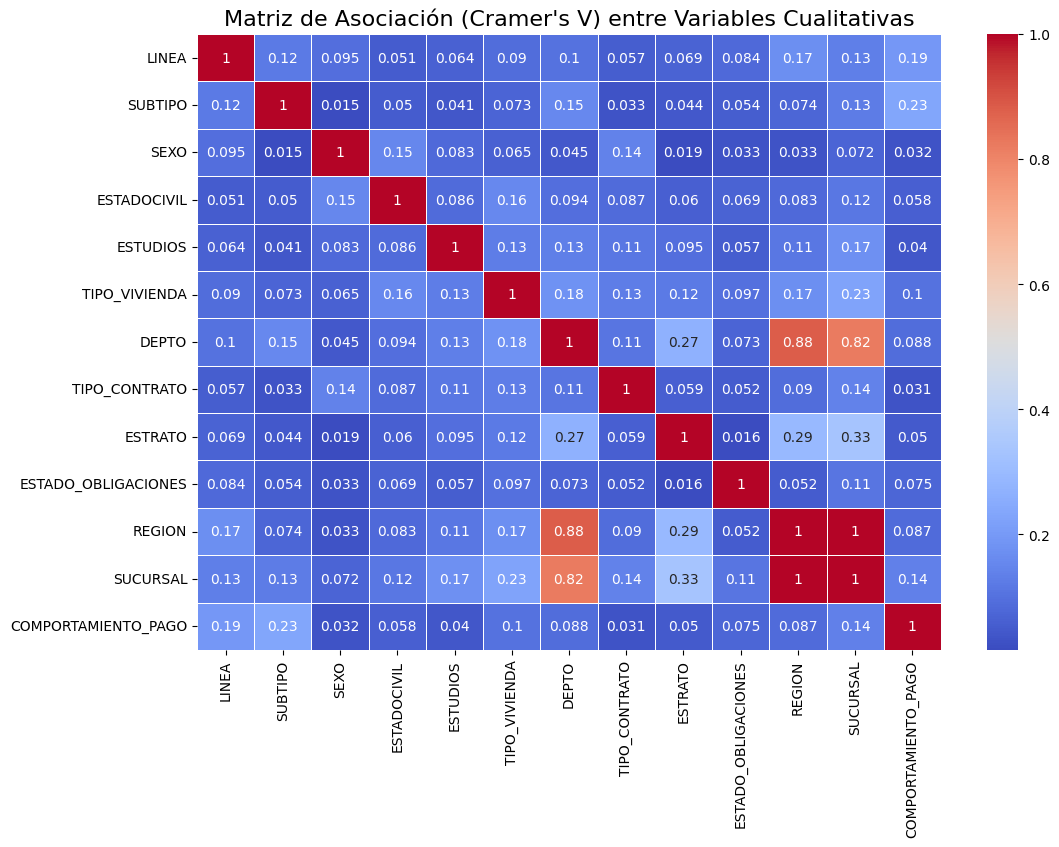

In [19]:
# Función para calcular el coeficiente de Cramer's V
def cramers_v(var1, var2):
    confusion_matrix = pd.crosstab(var1, var2)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Crear una copia del dataset
base_clientes_copy = base_clientes1_ajus.copy()

# Convertir los valores de la variable 'COMPORTAMIENTO_PAGO' a categóricos con las etiquetas correspondientes
base_clientes_copy['COMPORTAMIENTO_PAGO'] = base_clientes_copy['COMPORTAMIENTO_PAGO'].replace({0: 'Puntual', 1: 'Moroso'})

# Asegurarse de que 'COMPORTAMIENTO_PAGO' sea de tipo 'object'
base_clientes_copy['COMPORTAMIENTO_PAGO'] = base_clientes_copy['COMPORTAMIENTO_PAGO'].astype('object')

# Filtrar las variables cualitativas, incluyendo 'COMPORTAMIENTO_PAGO'
variables_cualitativas = base_clientes_copy.select_dtypes(include=['object'])

# Crear una matriz vacía para almacenar los coeficientes de Cramer
cramers_v_matrix = pd.DataFrame(np.zeros((variables_cualitativas.shape[1],
                                          variables_cualitativas.shape[1])),
                                index=variables_cualitativas.columns,
                                columns=variables_cualitativas.columns)

# Calcular el coeficiente de Cramer para cada par de variables cualitativas
for col1 in variables_cualitativas.columns:
    for col2 in variables_cualitativas.columns:
        cramers_v_matrix.loc[col1, col2] = cramers_v(variables_cualitativas[col1], variables_cualitativas[col2])

# Visualizar la matriz de correlación de Cramer's V
plt.figure(figsize=(12,8))
sns.heatmap(cramers_v_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Asociación (Cramer's V) entre Variables Cualitativas", fontsize=16)
plt.show()

**El análisis de la matriz de Cramér's V revela en genereal que las relaciones más fuertes en el dataset están relacionadas con variables geográficas (Región, Departamento y Sucursal), lo cual es esperable dada su naturaleza. Las variables sociodemográficas como sexo, estado civil y nivel educativo no presentan asociaciones significativas con otras variables, lo que indica que su influencia en el comportamiento general es limitada. Estos resultados son útiles para enfocar los análisis en factores geográficos o estructurales que tienen un mayor impacto en las interacciones entre variables cualitativas.**

**Por otra prate, las variables más relevantes en relación con el comportamiento de pago son SUBTIPO, LÍNEA, SUCURSAL y DEPTO, ya que presentan los valores más altos de Cramer's V. Además, variables como SEXO, ESTUDIOS, y TIPO_CONTRATO no muestran una asociación significativa, por lo que pueden considerarse menos relevantes para predecir la morosidad en este contexto.**

**Finalemente, si bien Cramér's V es útil para detectar asociaciones, no necesariamente identifica relaciones causales o complejas, por esta razón se deberá recurrir a otras técnicas de análisis que permiten evaluar la influencia de múltiples variables simultáneamente.**

---



## **Prueba de Chi-Cuadrado entre variable principal (Comportamiento de pago) y variables cualitativas.**

La prueba de Chi-cuadrado es importante porque permite identificar relaciones significativas entre variables categóricas, como COMPORTAMIENTO_PAGO y otras características del cliente. Esto es útil para seleccionar variables relevantes en modelos predictivos, confirmar observaciones con base estadística, y segmentar clientes de manera efectiva. Además, facilita decisiones informadas al destacar factores que influyen en el comportamiento de pago.

In [20]:
# Prueba Chi-cuadrado entre 'COMPORTAMIENTO_PAGO' y cada variable cualitativa
for column in base_clientes1_ajus.select_dtypes(include='object').columns:
    if column != 'COMPORTAMIENTO_PAGO':
        # Crear tabla de contingencia
        tabla = pd.crosstab(base_clientes1_ajus['COMPORTAMIENTO_PAGO'], base_clientes1_ajus[column])

        # Calcular el valor Chi-cuadrado y el p-valor
        chi2, p, dof, expected = chi2_contingency(tabla)

        # Mostrar los resultados
        print(f"Variable: {column}, p-valor: {p}")

Variable: LINEA, p-valor: 4.0313149552353377e-135
Variable: SUBTIPO, p-valor: 1.851702597696103e-210
Variable: SEXO, p-valor: 1.3028146810003078e-05
Variable: ESTADOCIVIL, p-valor: 3.5255564288261154e-13
Variable: ESTUDIOS, p-valor: 6.048365321547711e-06
Variable: TIPO_VIVIENDA, p-valor: 3.148762964363672e-41
Variable: DEPTO, p-valor: 2.142016116491996e-20
Variable: TIPO_CONTRATO, p-valor: 0.001529206804881486
Variable: ESTRATO, p-valor: 1.4756723390653131e-08
Variable: ESTADO_OBLIGACIONES, p-valor: 3.8482870002464914e-23
Variable: REGION, p-valor: 5.382163407105937e-29
Variable: SUCURSAL, p-valor: 1.2615765373113858e-51


**Análisis de p-valores según variables relacionadas con COMPORTAMIENTO_PAGO:**

---

**Variables Más Relevantes**

**SUBTIPO (p-valor: 1.85e-210):** Presenta el p-valor más bajo, lo que indica una asociación muy significativa con el comportamiento de pago. Esto sugiere que el tipo de producto o transacción es un factor determinante en la morosidad.

**SUCURSAL (p-valor: 1.26e-51):** El p-valor muy bajo refuerza la importancia de las diferencias entre sucursales, lo que podría estar relacionado con factores específicos locales o la gestión de cada sucursal.

**TIPO_VIVIENDA (p-valor: 3.14e-41) y REGION (p-valor: 5.38e-29):** Ambos p-valores indican una asociación fuerte, lo que sugiere que tanto el tipo de vivienda como la región tienen un impacto significativo en el comportamiento de pago.

**ESTADO_OBLIGACIONES (p-valor: 3.85e-23):** También muestra una fuerte asociación, lo que podría ser relevante en función del historial o la situación actual de las obligaciones del cliente.

---

**Variables Menos Relevantes**

**TIPO_CONTRATO (p-valor: 0.0015):** Aunque es estadísticamente significativo, el p-valor es más alto en comparación con las otras variables, lo que indica que su influencia relativa en el comportamiento de pago podría ser menor.

**SEXO (p-valor: 1.3e-05) y ESTUDIOS (p-valor: 6.05e-06):** A pesar de que los p-valores son bajos, siguen siendo mayores en comparación con variables como SUBTIPO o SUCURSAL, lo que sugiere que el sexo y el nivel educativo no son los factores más influyentes en la morosidad.

**ESTRATO (p-valor: 1.47e-08):** Aunque es significativo, su p-valor es mayor que el de muchas otras variables, lo que indica que podría tener una menor capacidad predictiva en este contexto.



# **Variables Cuantitativas**

In [21]:
# Crear una copia del dataset original
base_clientes_copy = base_clientes1.copy()

# Eliminar la variable 'ESTRATO' del nuevo dataset
base_clientes_sin_estrato = base_clientes_copy.drop(columns=['ESTRATO'], errors='ignore')

# Filtrar solo las variables cuantitativas (tipos int64 o float64) en el nuevo dataset
variables_cuantitativas = base_clientes_sin_estrato.select_dtypes(include=['int64', 'float64'])

In [22]:
# Generar el resumen estadístico de las variables cuantitativas
variables_cuantitativas.describe()

# Mostrar el resumen
print(variables_cuantitativas)

       VALOR_CREDITO  PLAZO_MESES  EDAD  PERSONAS_A_CARGO  TIEMPO__VIVIENDA  \
0             107756            9    46                 0               240   
1             109541           12    55                 0               240   
2             130650            4    54                 2               300   
3             151101            3    40                 2               156   
4             158539           12    52                 1                60   
...              ...          ...   ...               ...               ...   
18137        6203680           48    52                 0               240   
18138        6226059           36    25                 1                40   
18139        6321902           24    41                 0                72   
18140        6599805           36    40                 2                36   
18141        6599806           36    57                 1               220   

       ANTIGUEDAD_LABORAL_MESES  SALARIO_MENSUAL  P

**Algunas variables, como VALOR_CREDITO, SALARIO_MENSUAL, y SALDO_TOTAL_SECTORFINANCIERO_Y_TARJETASDECREDITO, muestran rangos amplios, con valores máximos significativamente mayores que los percentiles 75%, lo que indica la presencia de outliers.**

**Por ejemplo, el SALARIO_MENSUAL tiene un valor máximo de 30.000.000 mientras que el 75% de los datos se encuentran por debajo de 1.500.000, lo que puede sugerir que algunos valores extremos están influyendo en la media y desviación estándar de la distribución. Además, la variable NUMERO_CUENTAS_BANCARIAS también tiene un máximo elevado (20 cuentas), lo cual es inusual dado que el 75% de los casos tienen 3 cuentas o menos.**

**Dado lo anterior, se debe tener en cuenta tratamientos posteriores a los otliers identificados. El control de estas variables garantizará un análisis más preciso y evitará sesgos en la interpretación de los resultados.**

## **Participación según variable**

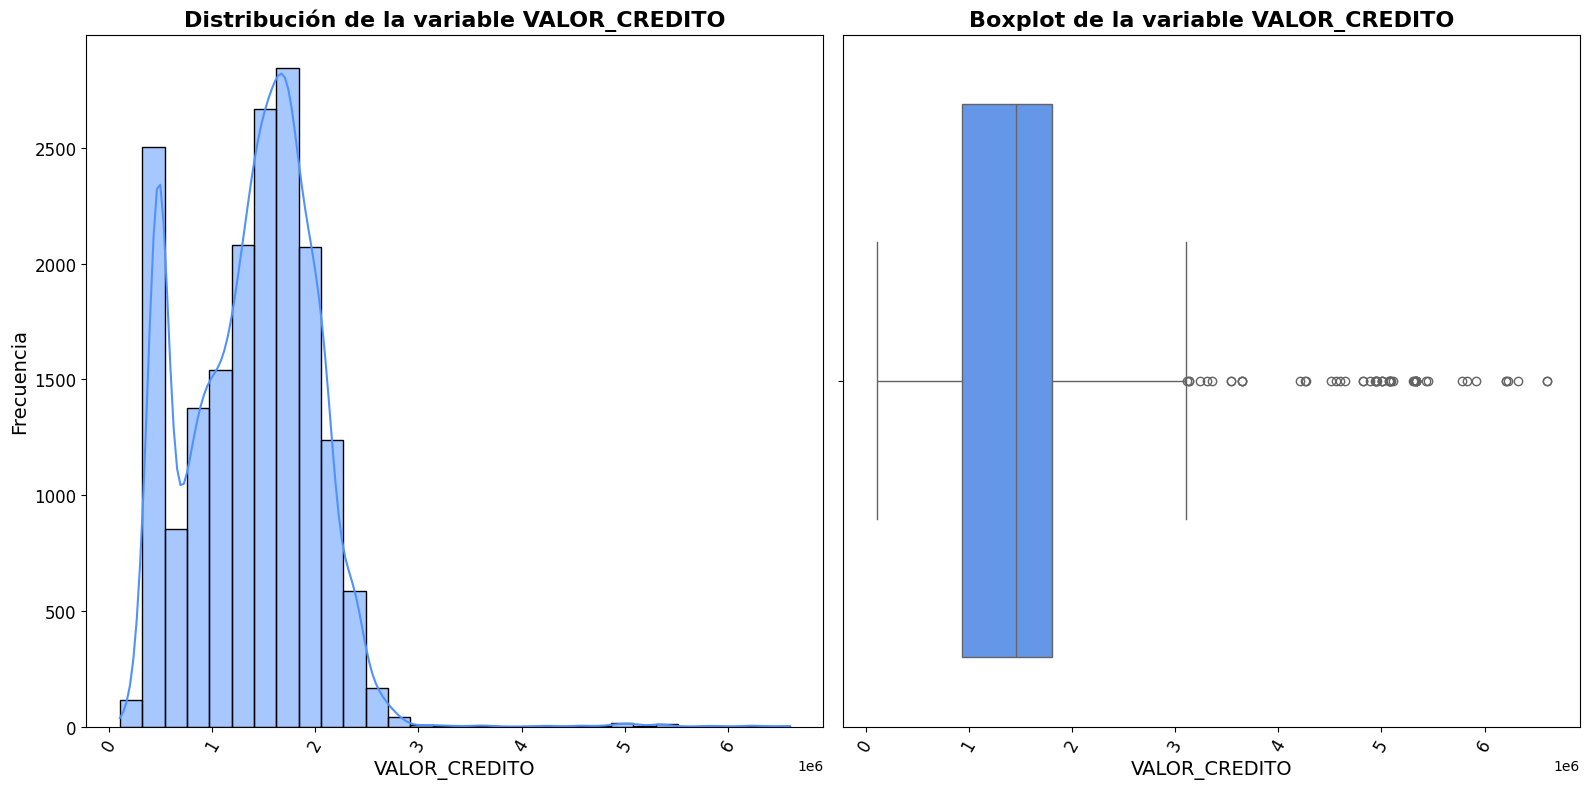

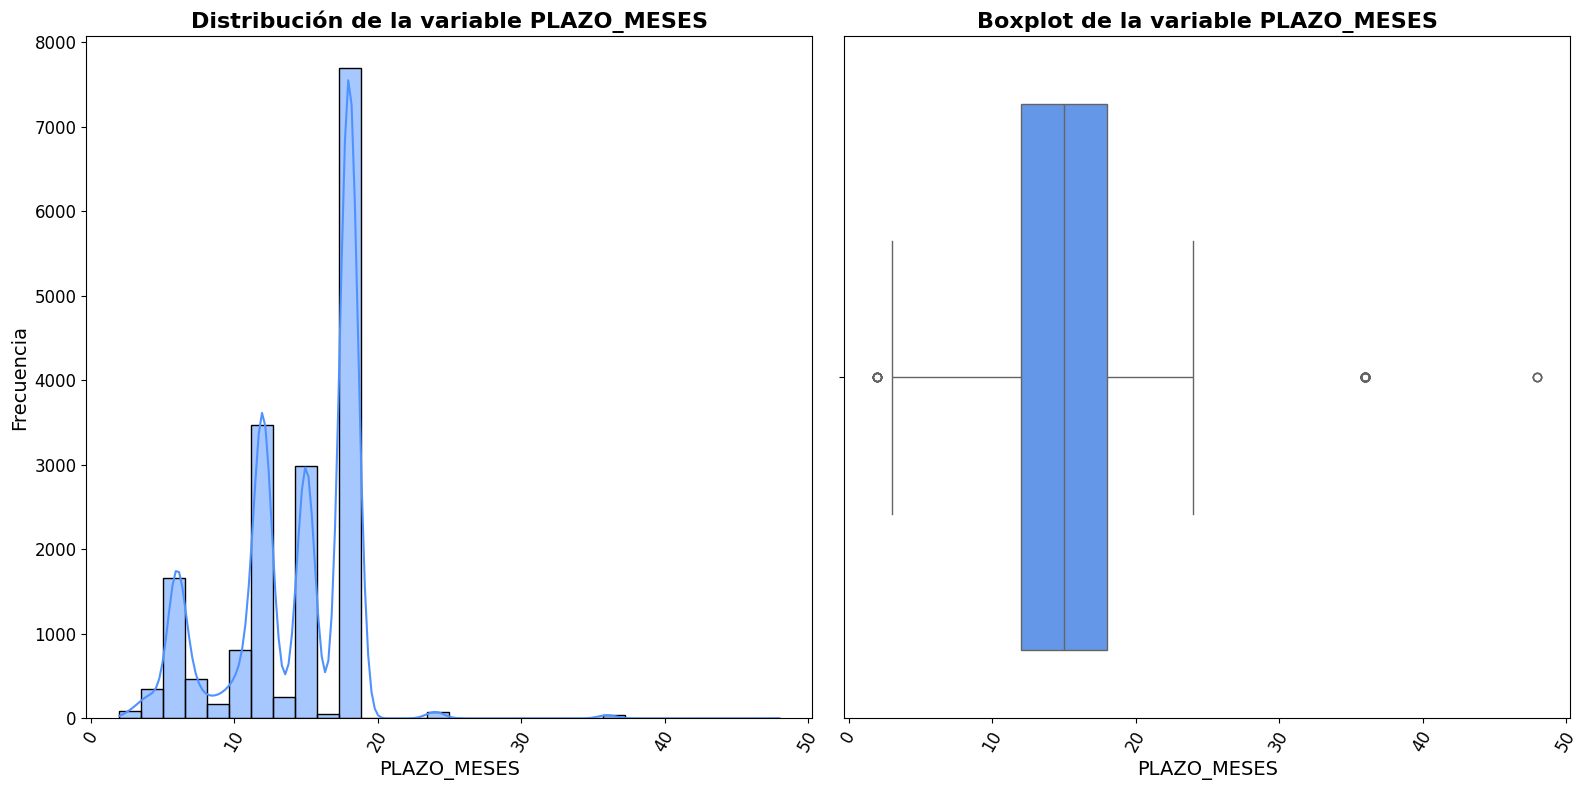

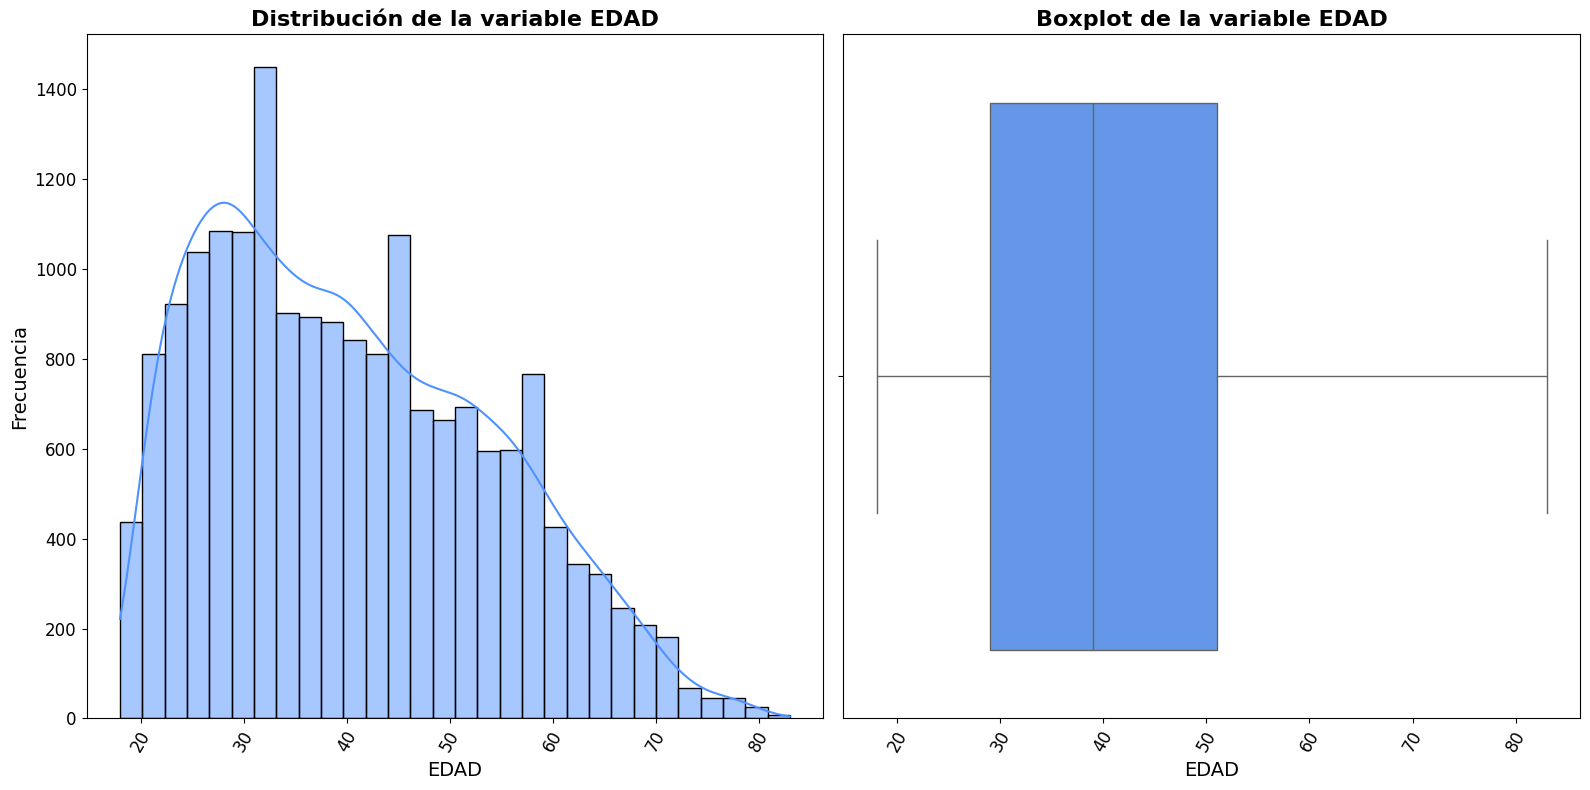

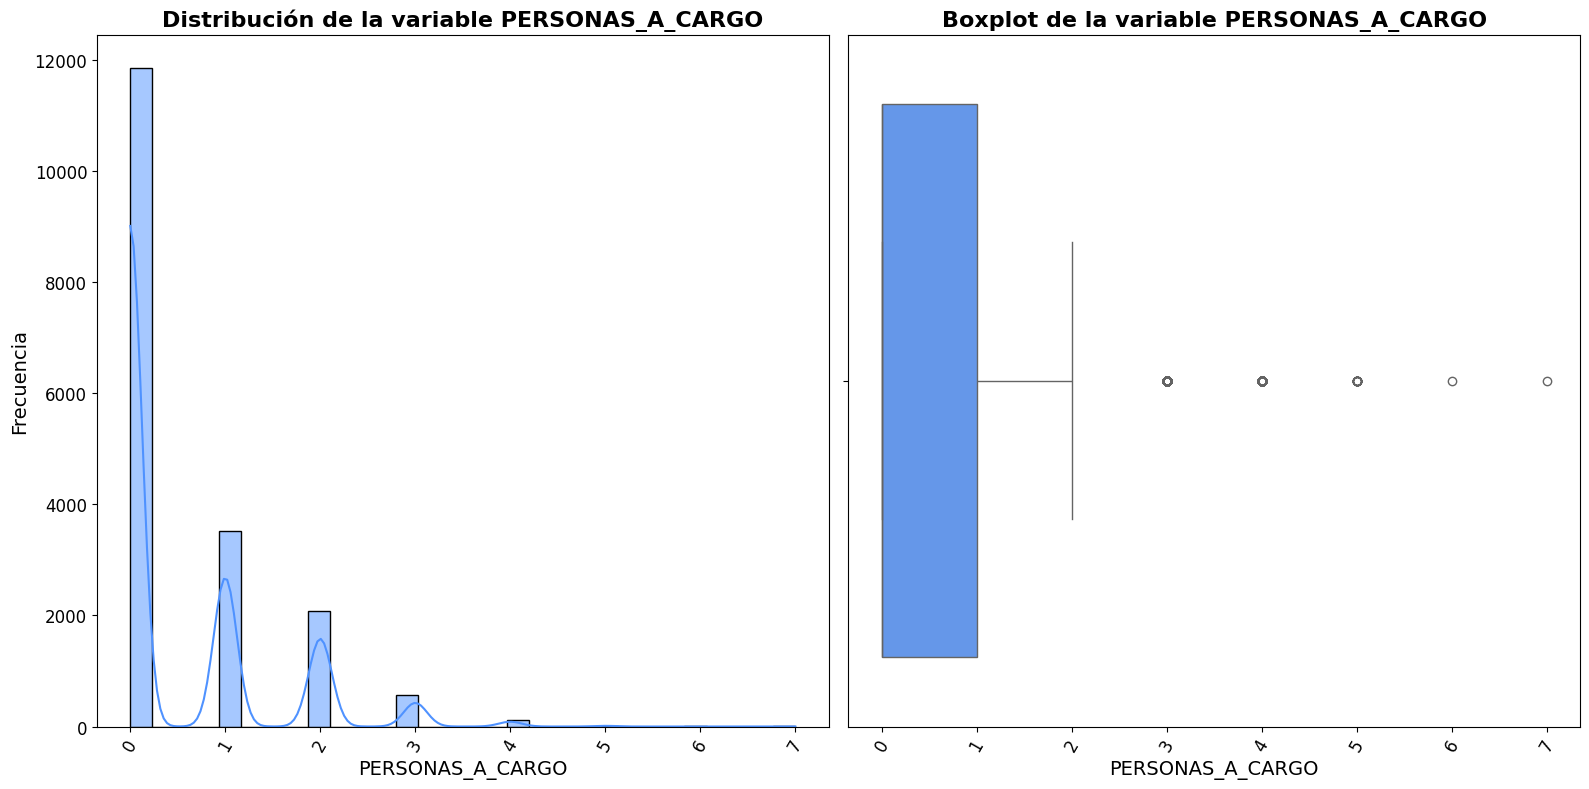

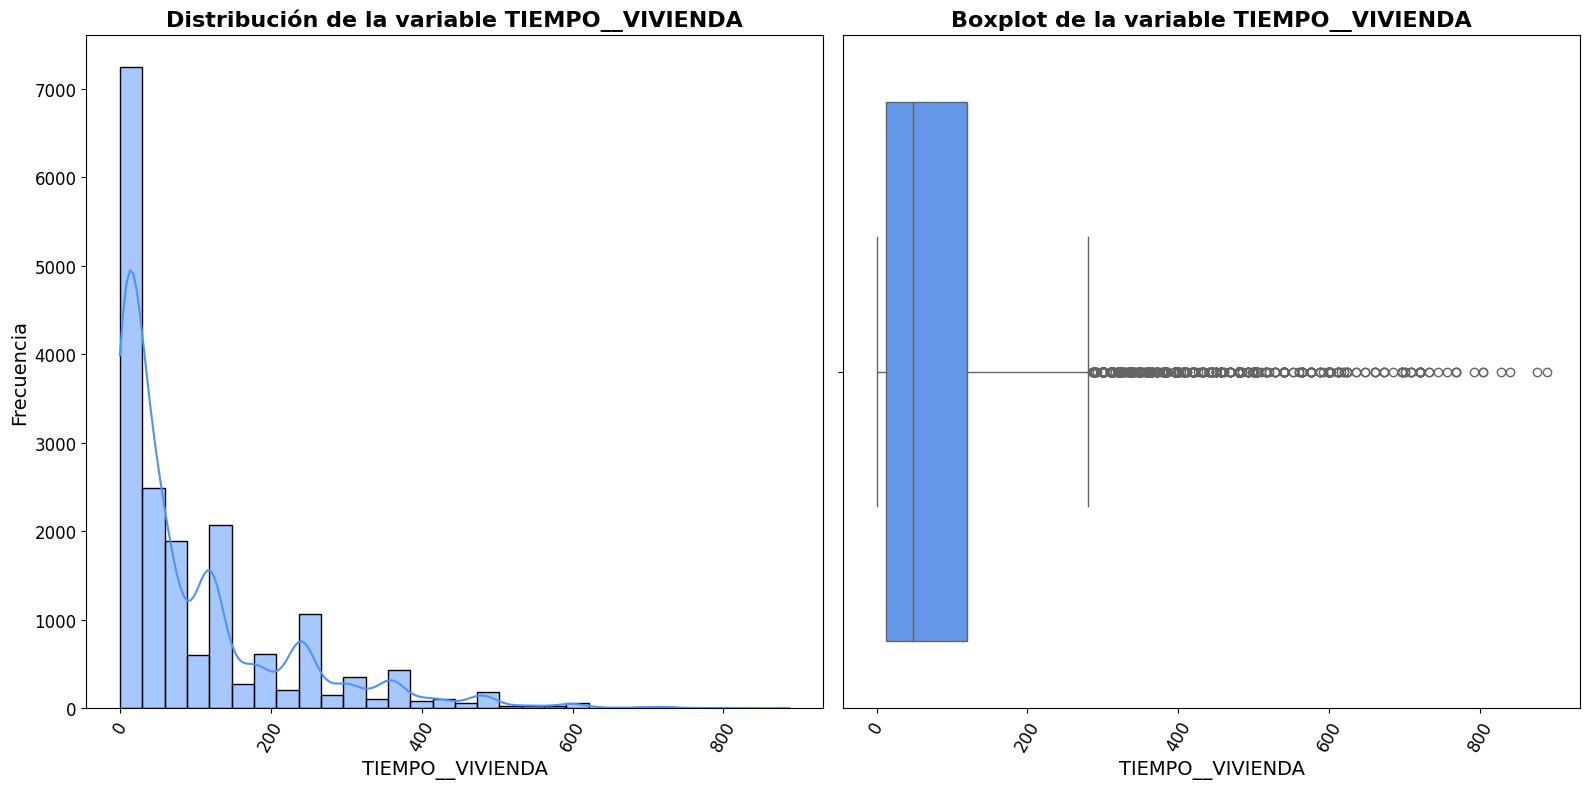

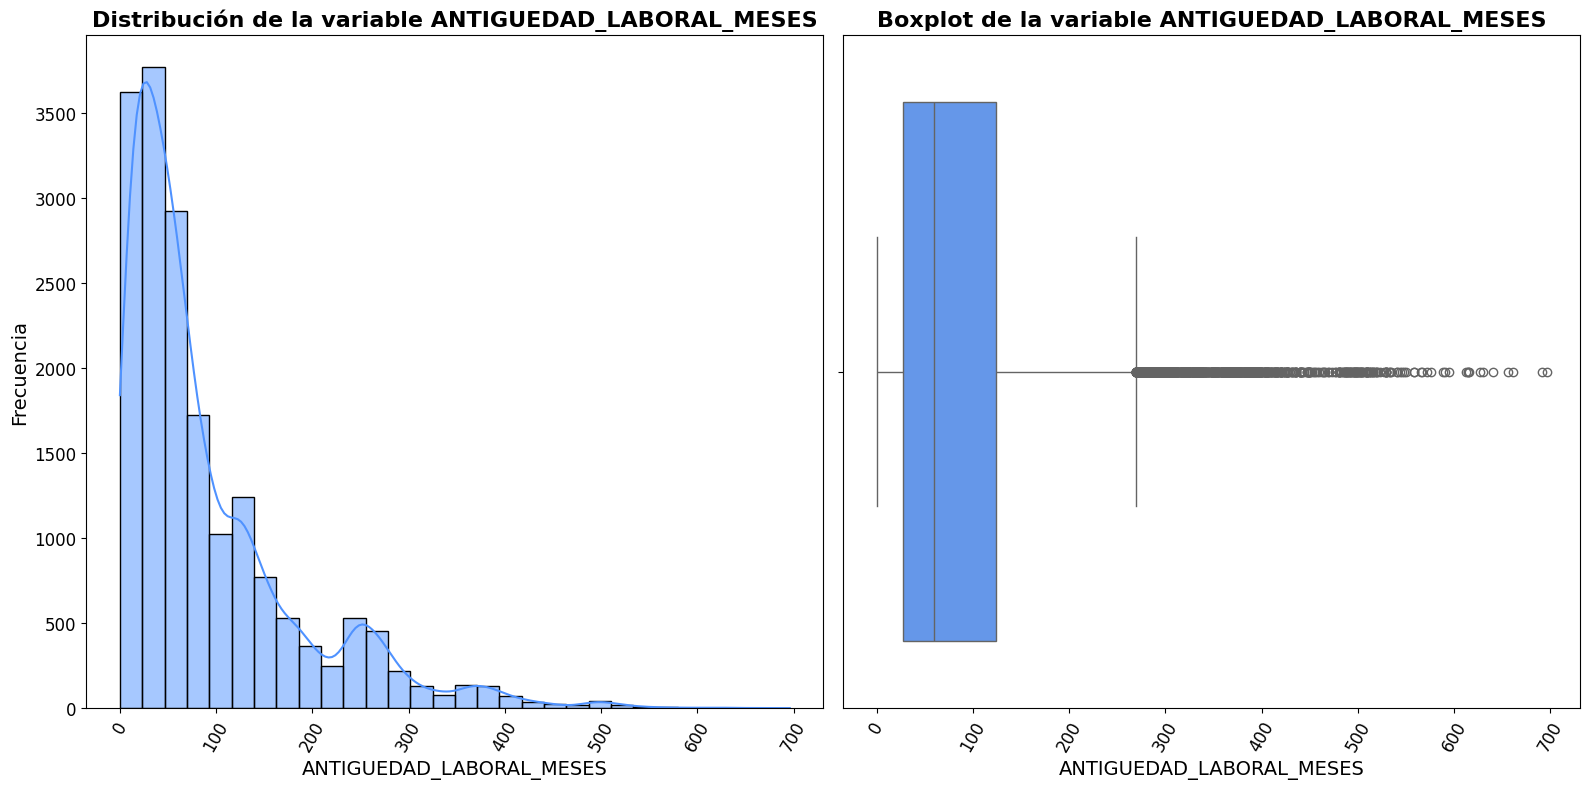

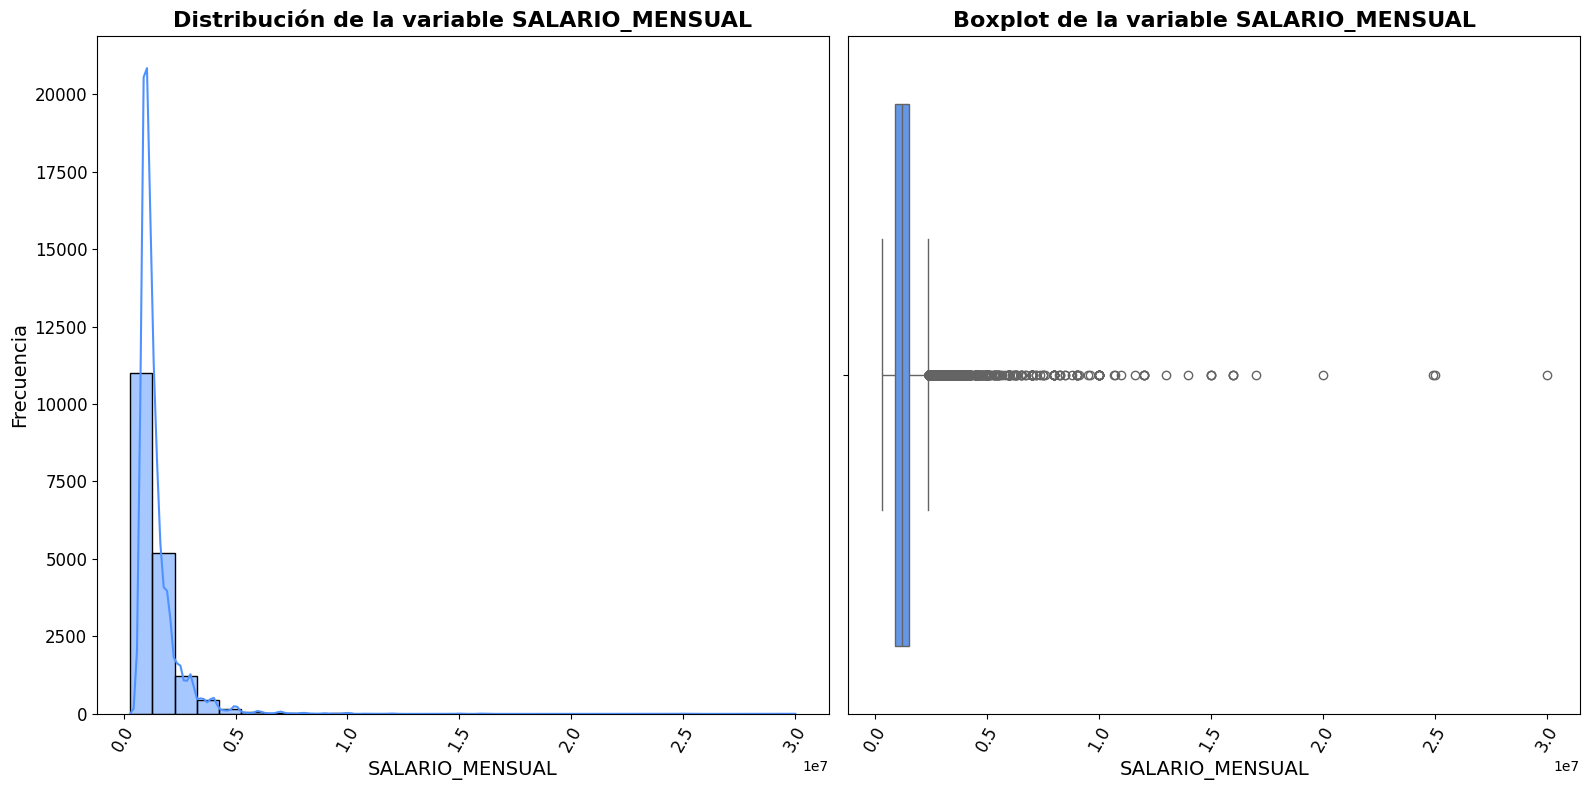

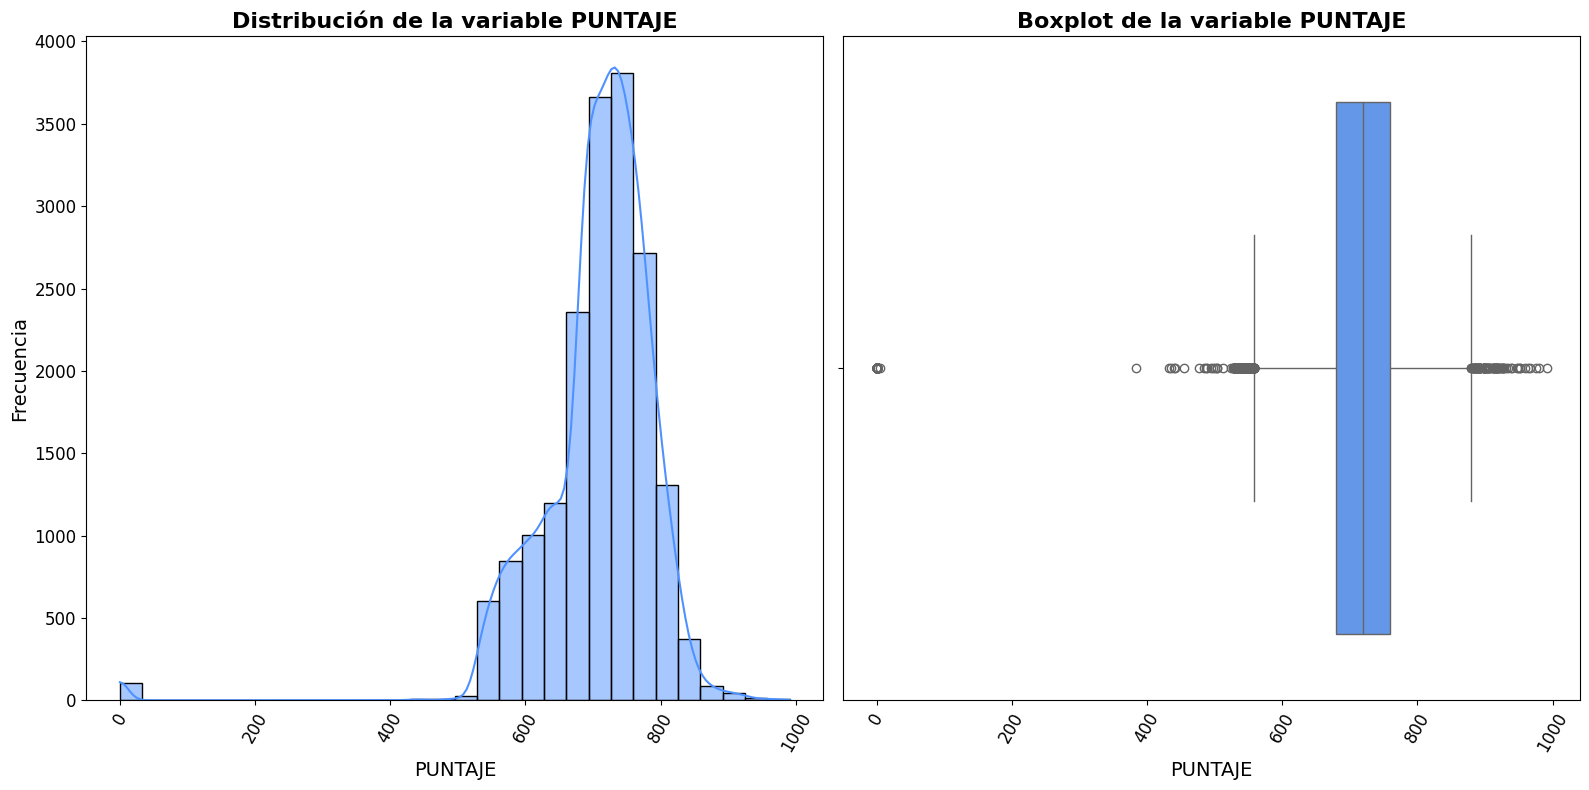

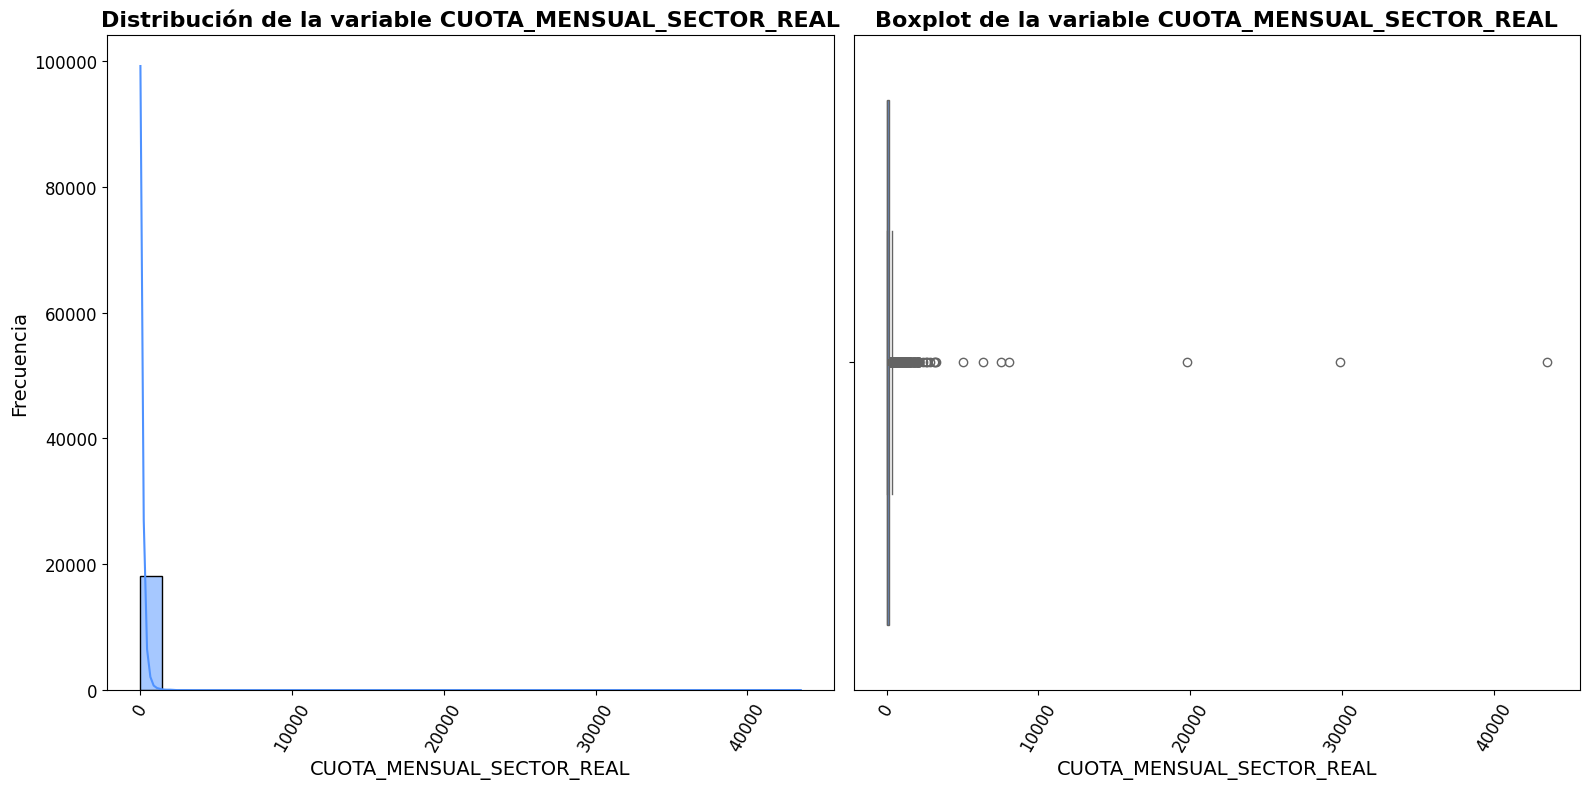

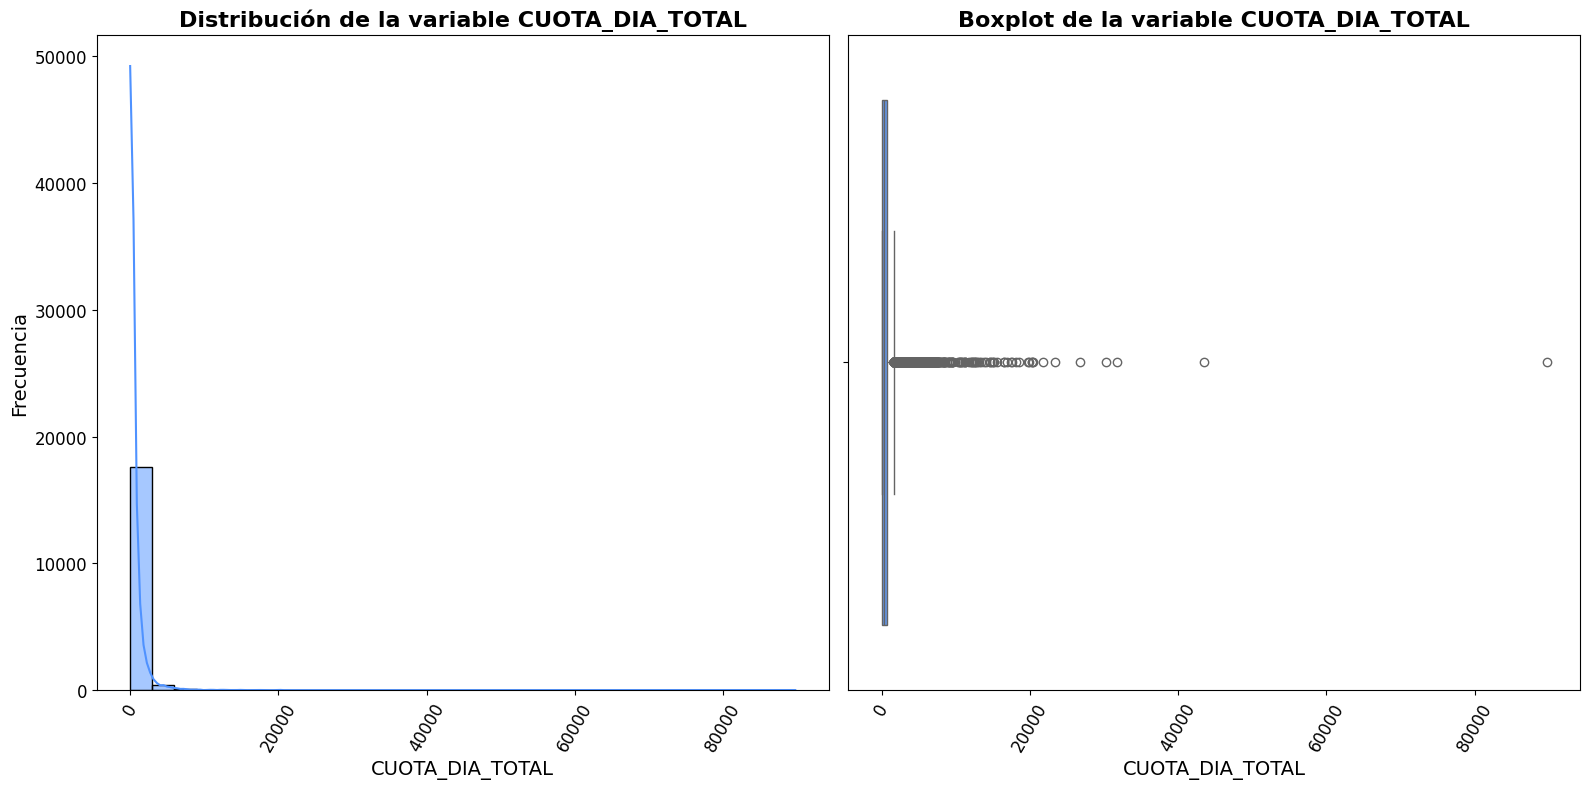

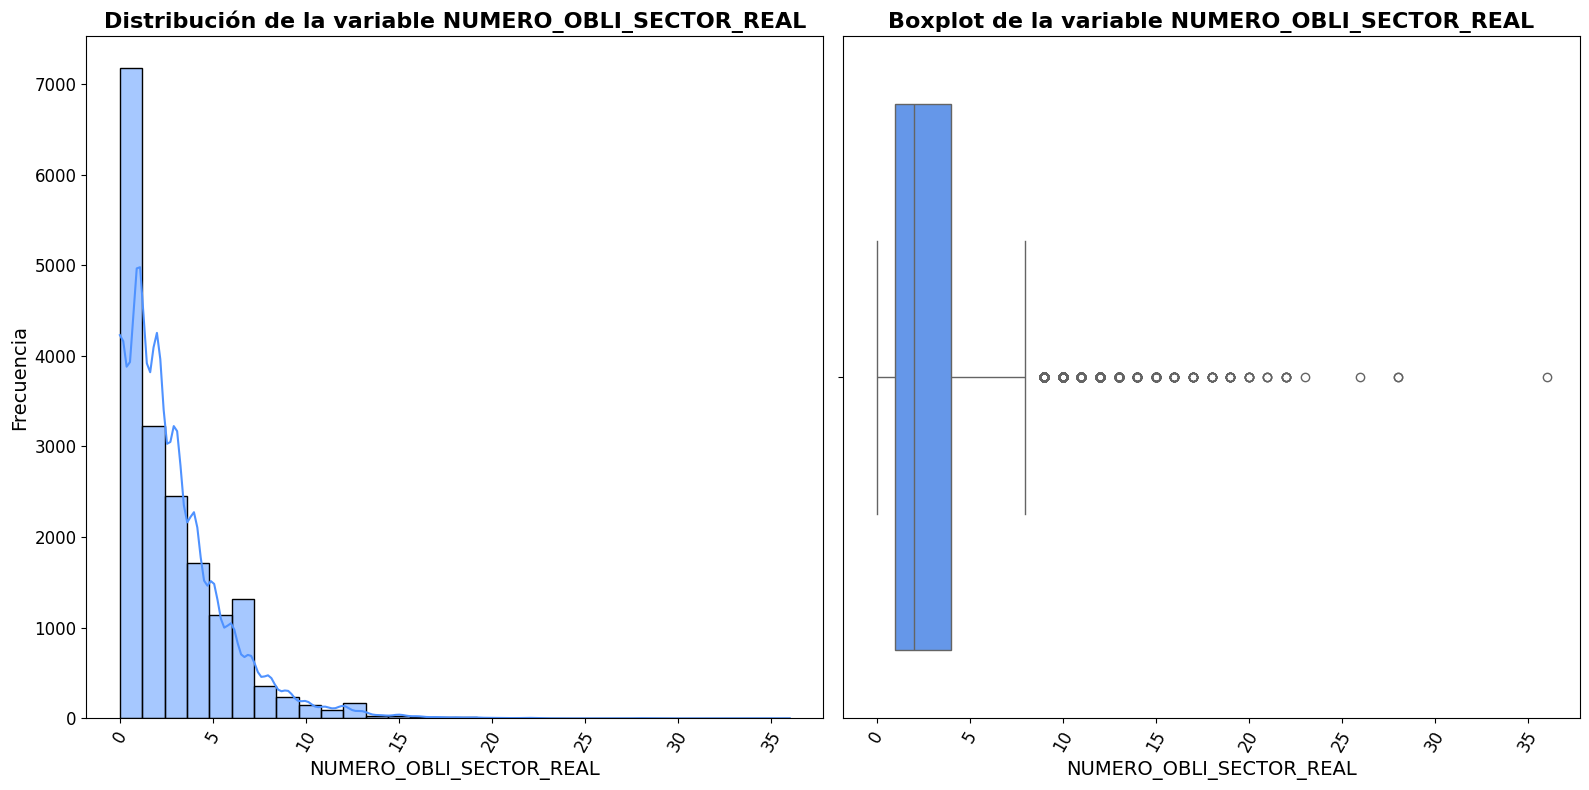

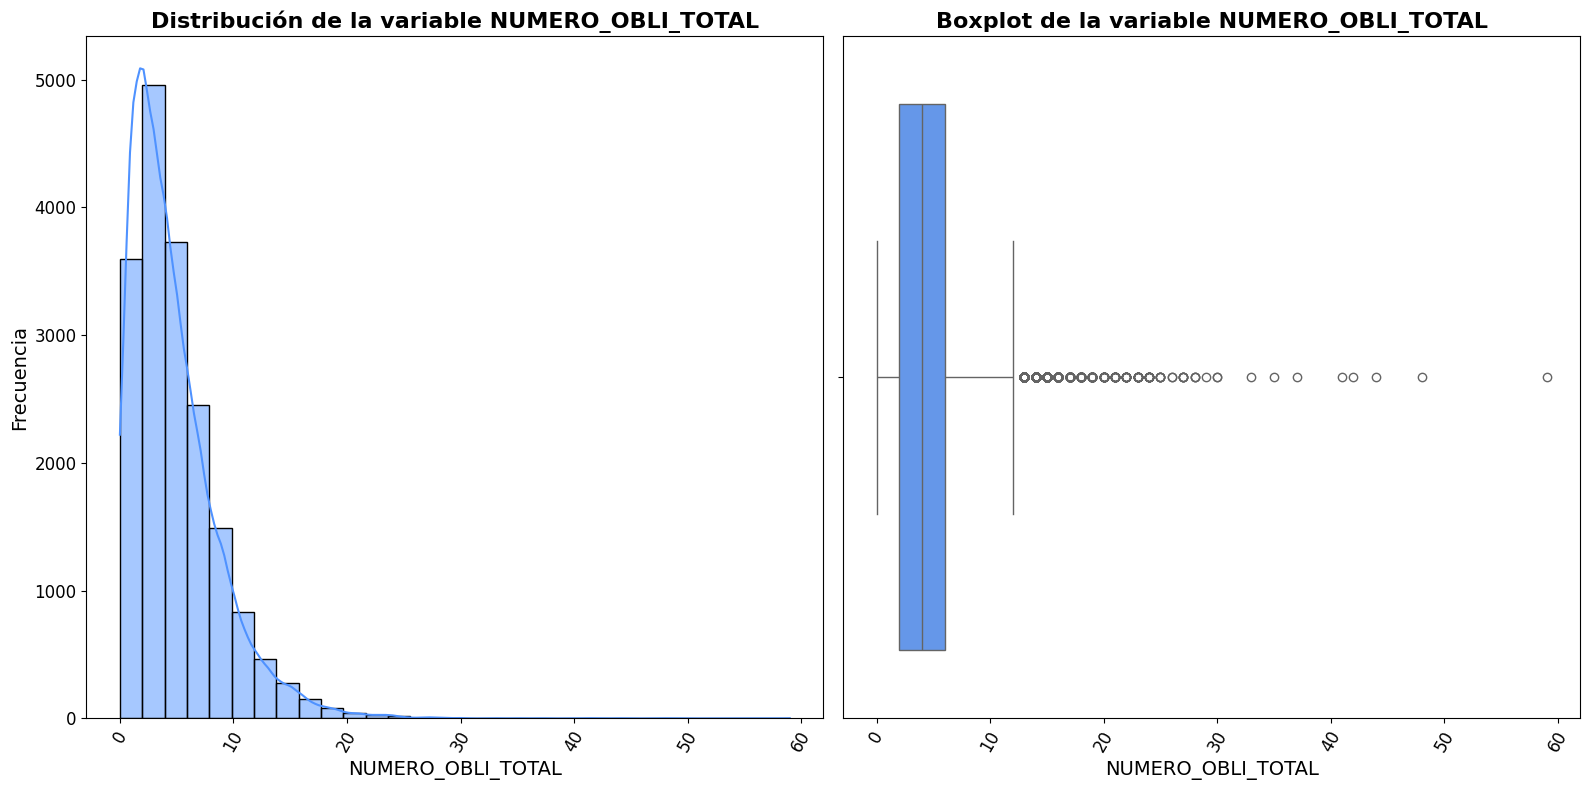

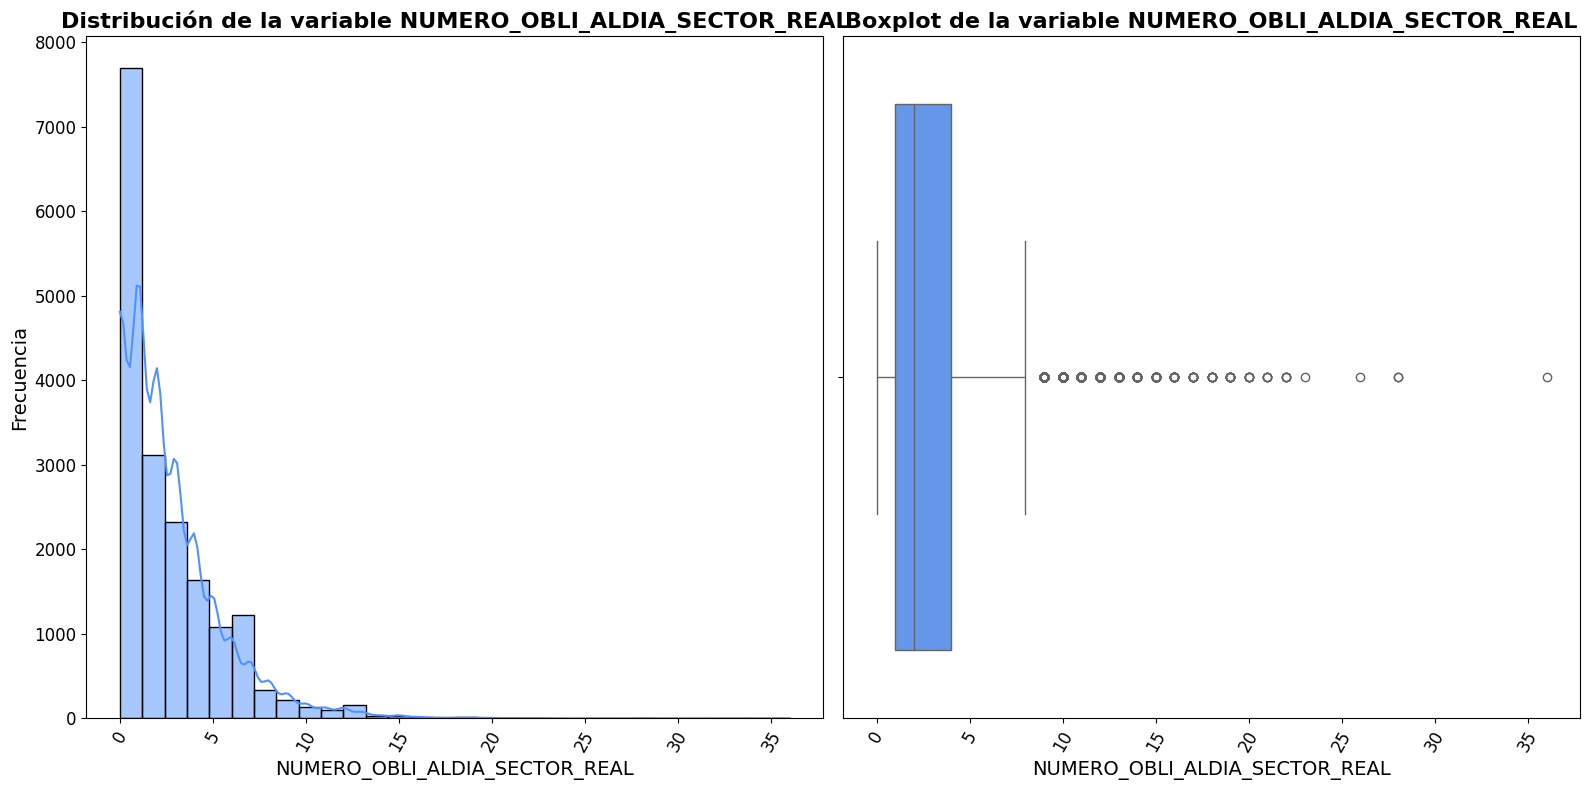

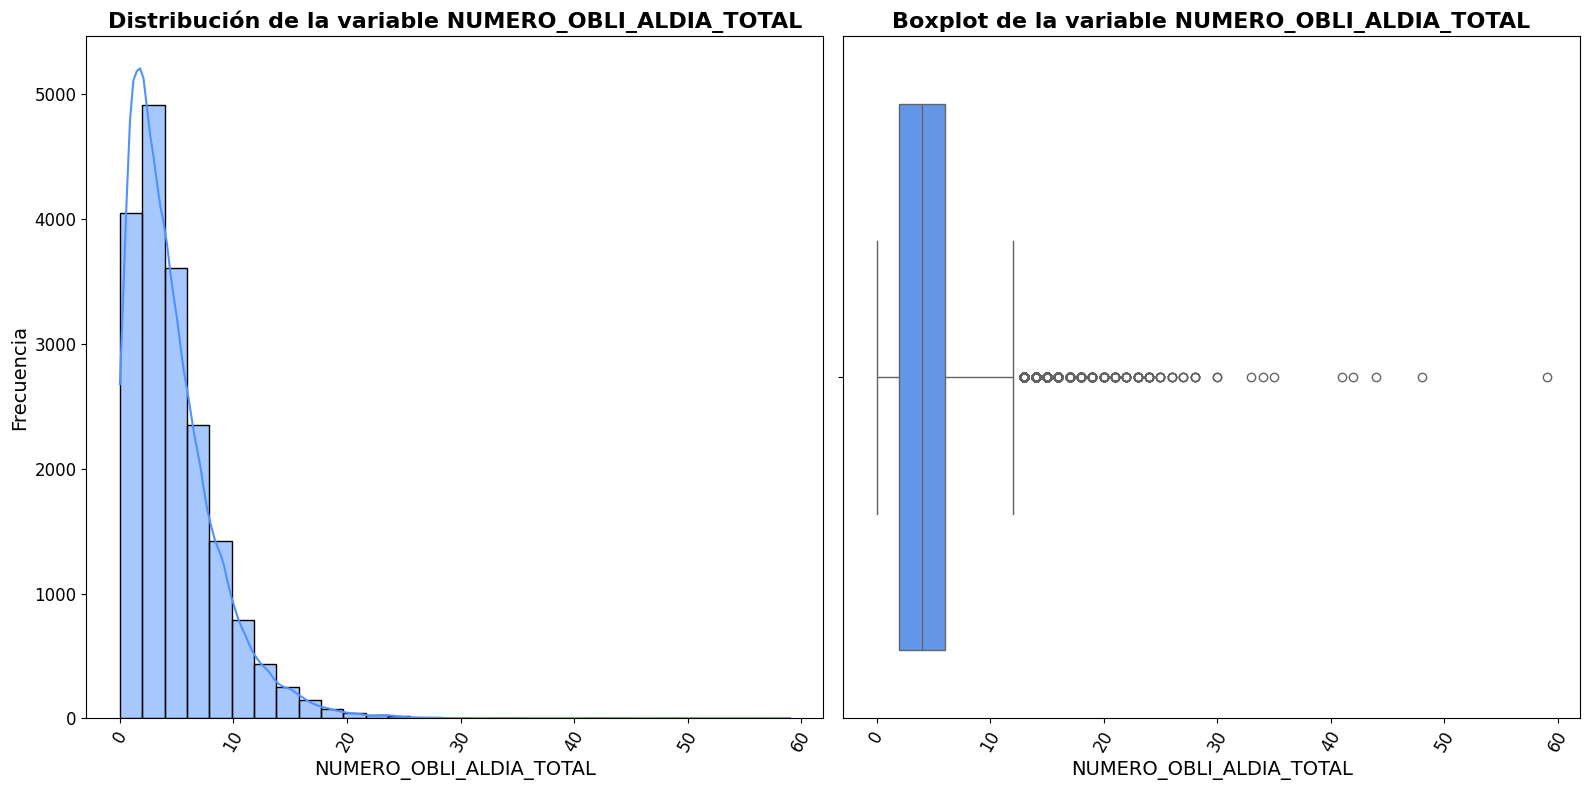

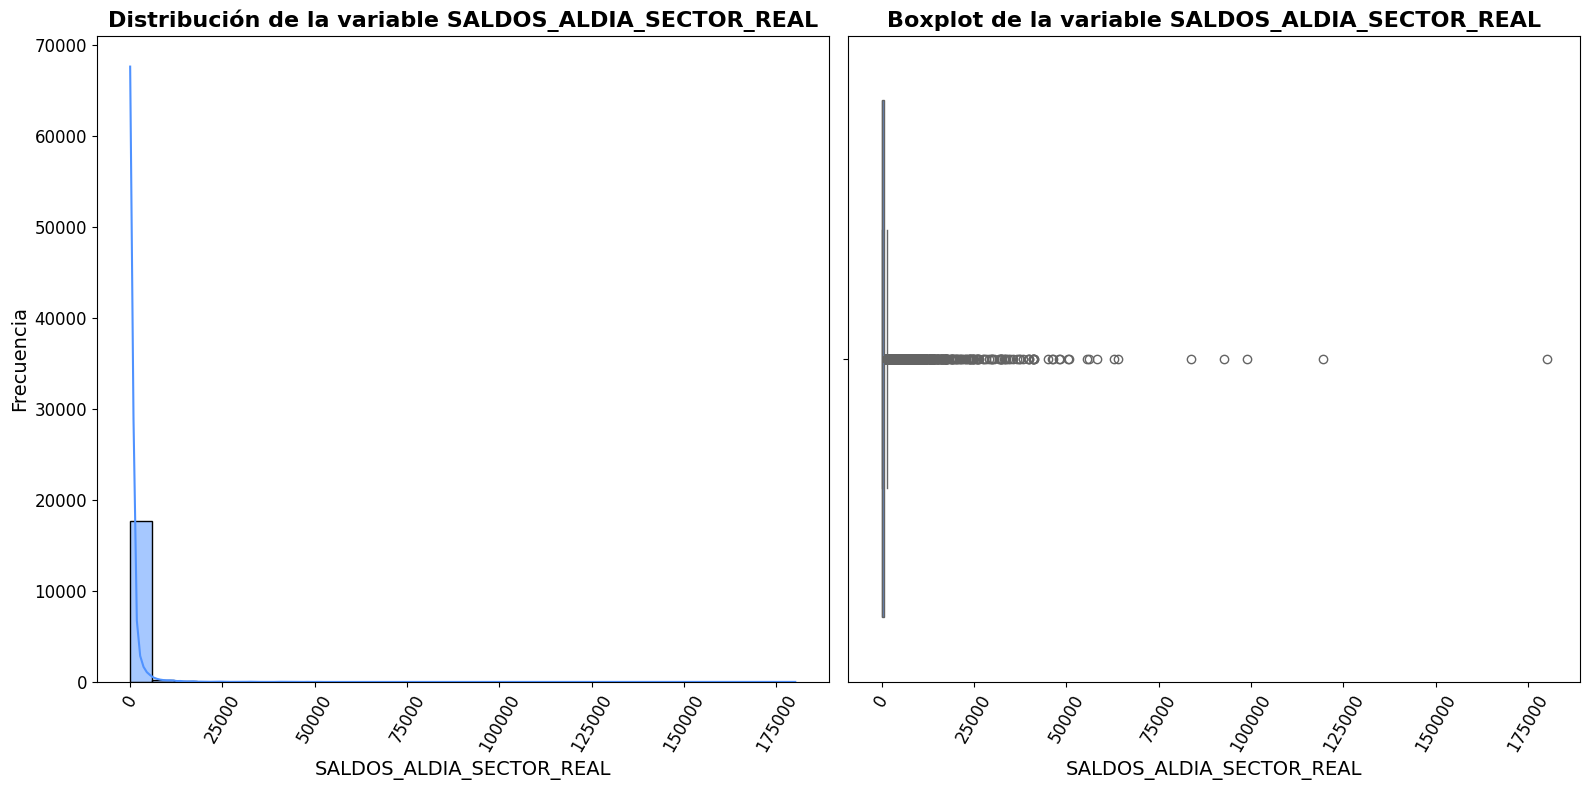

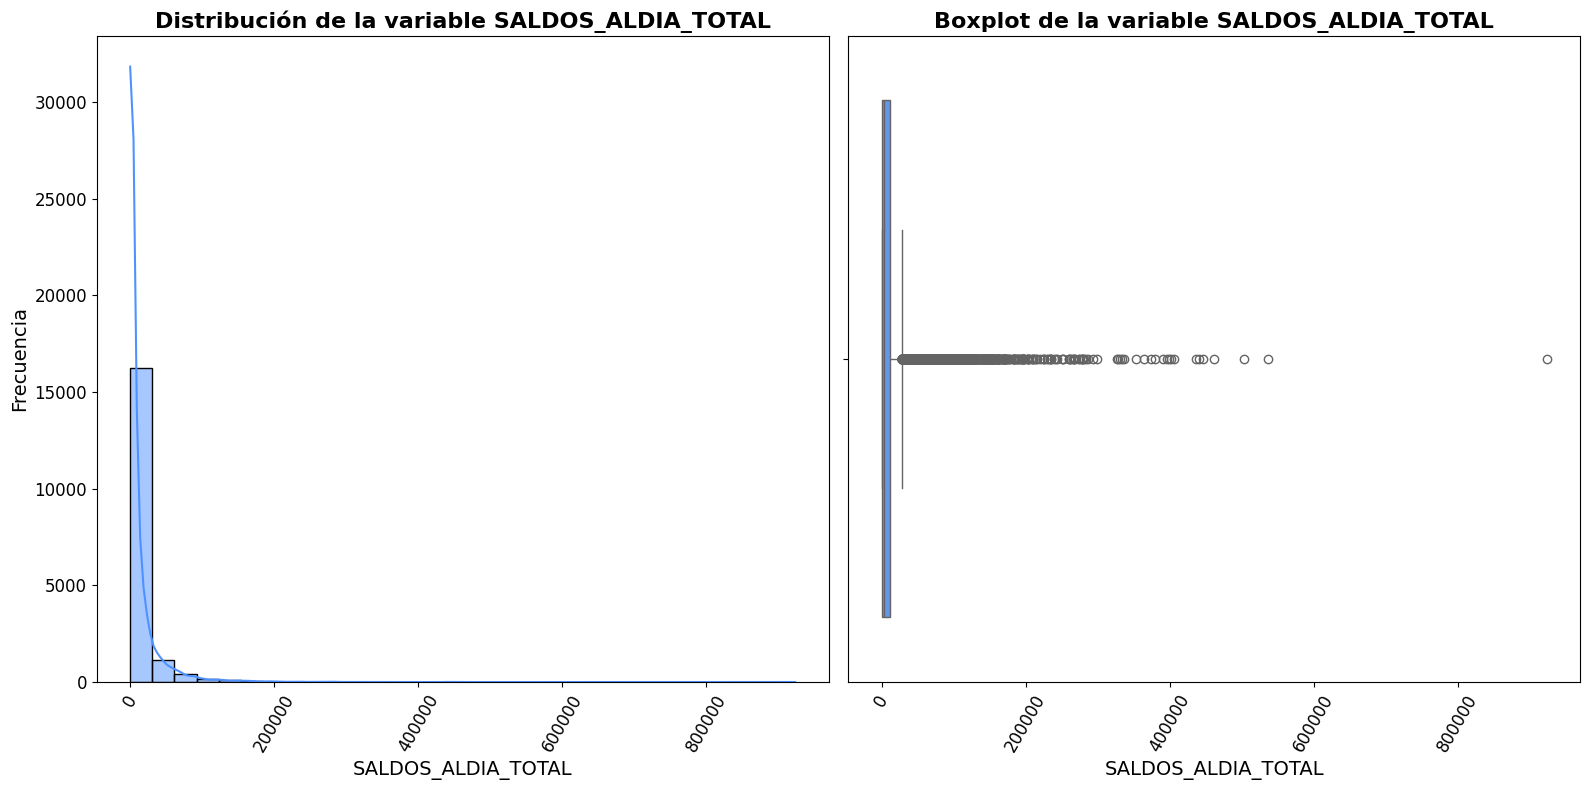

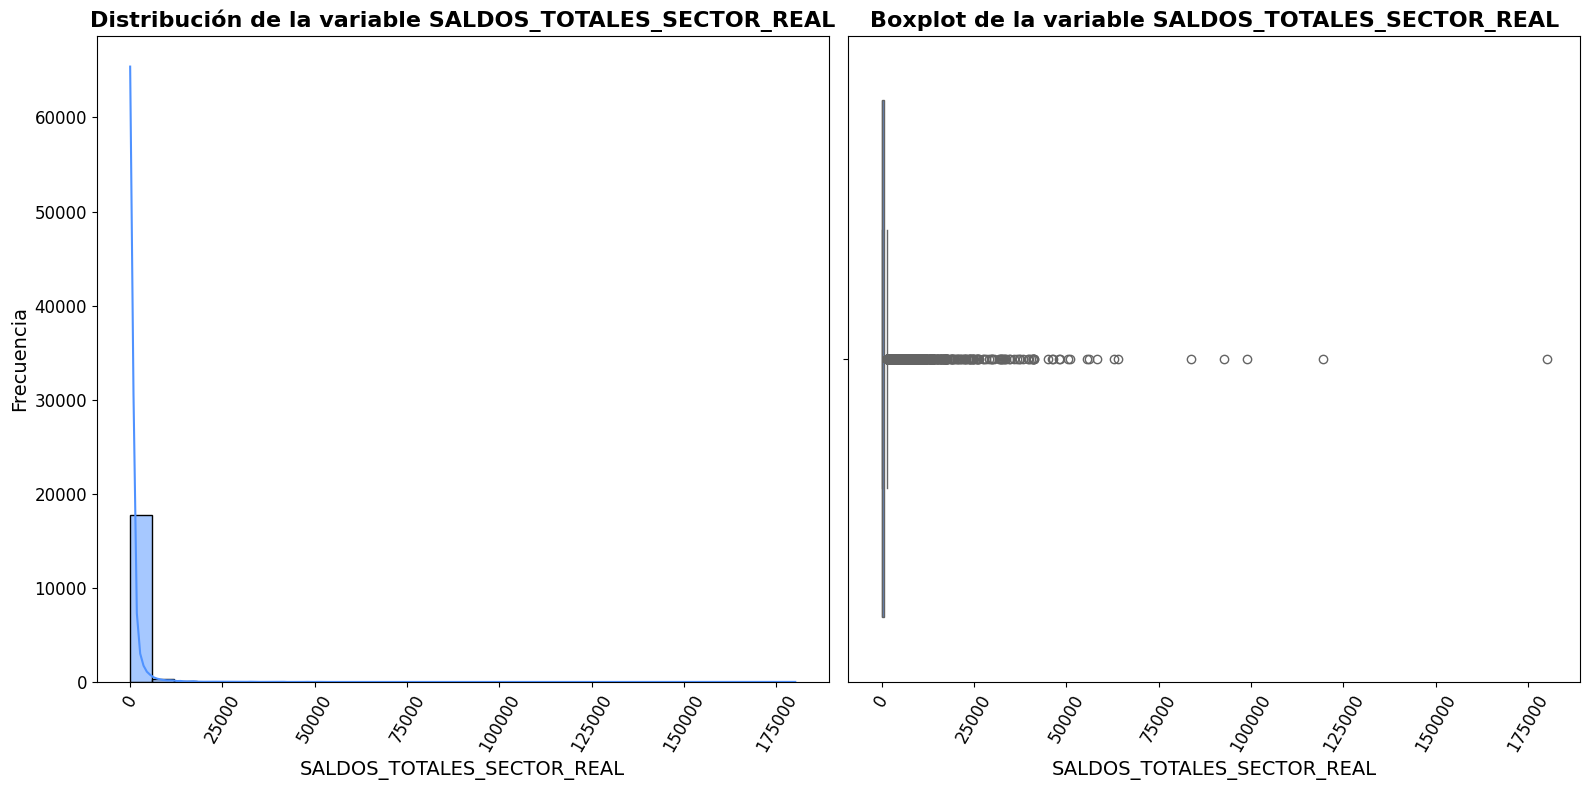

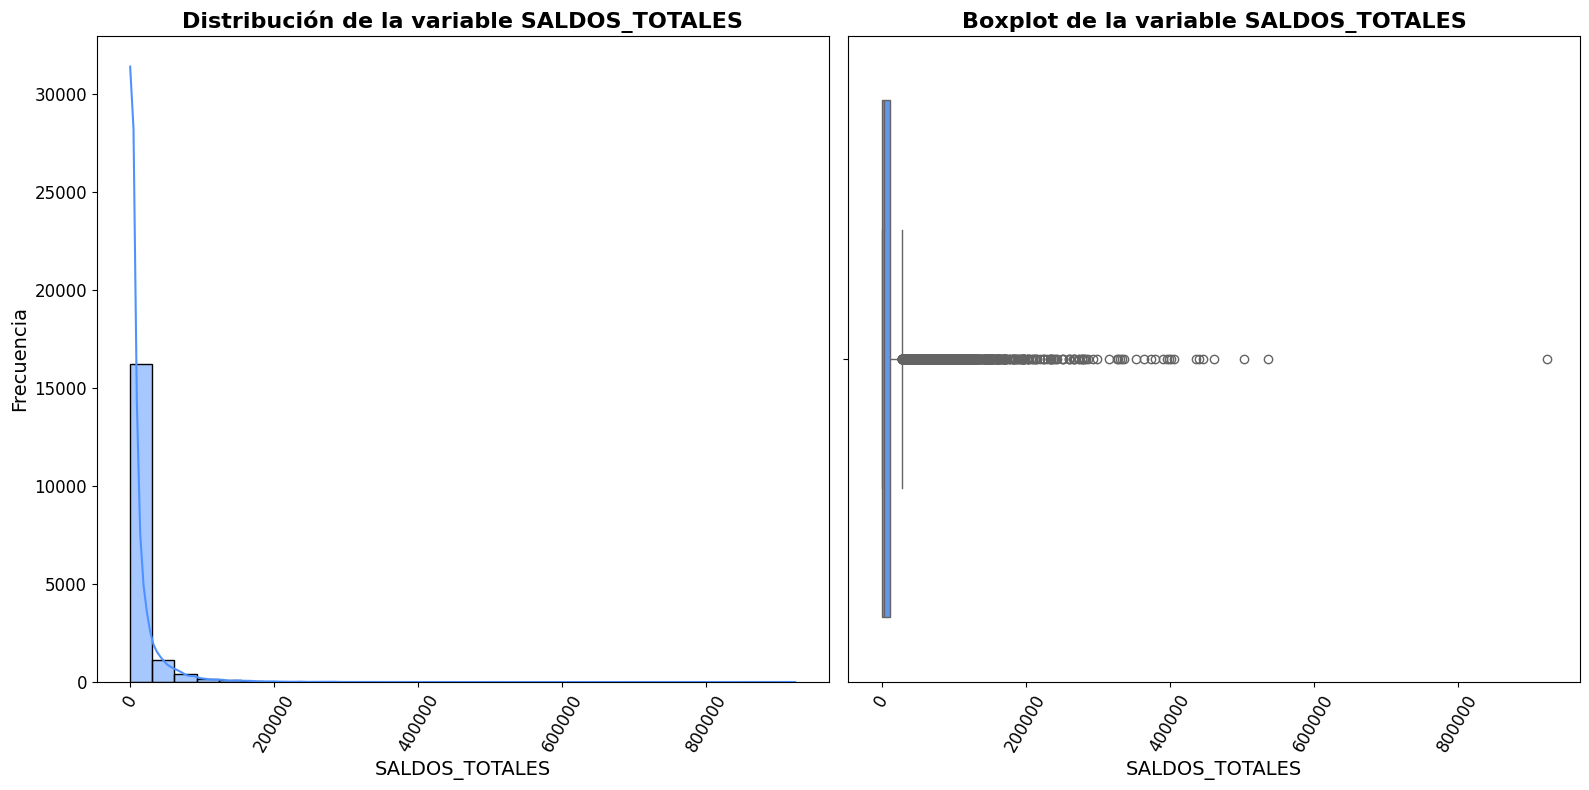

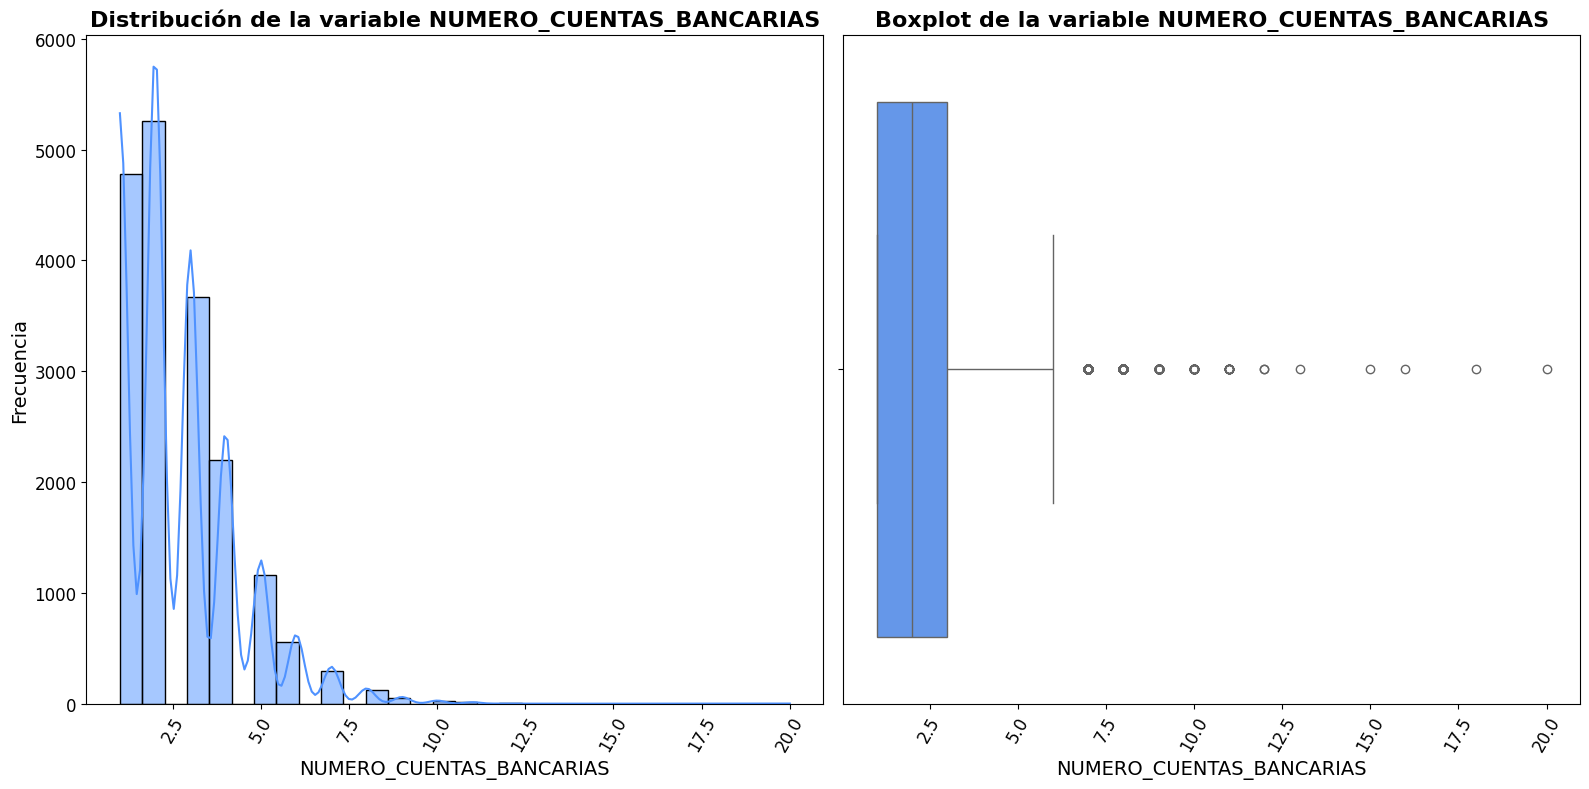

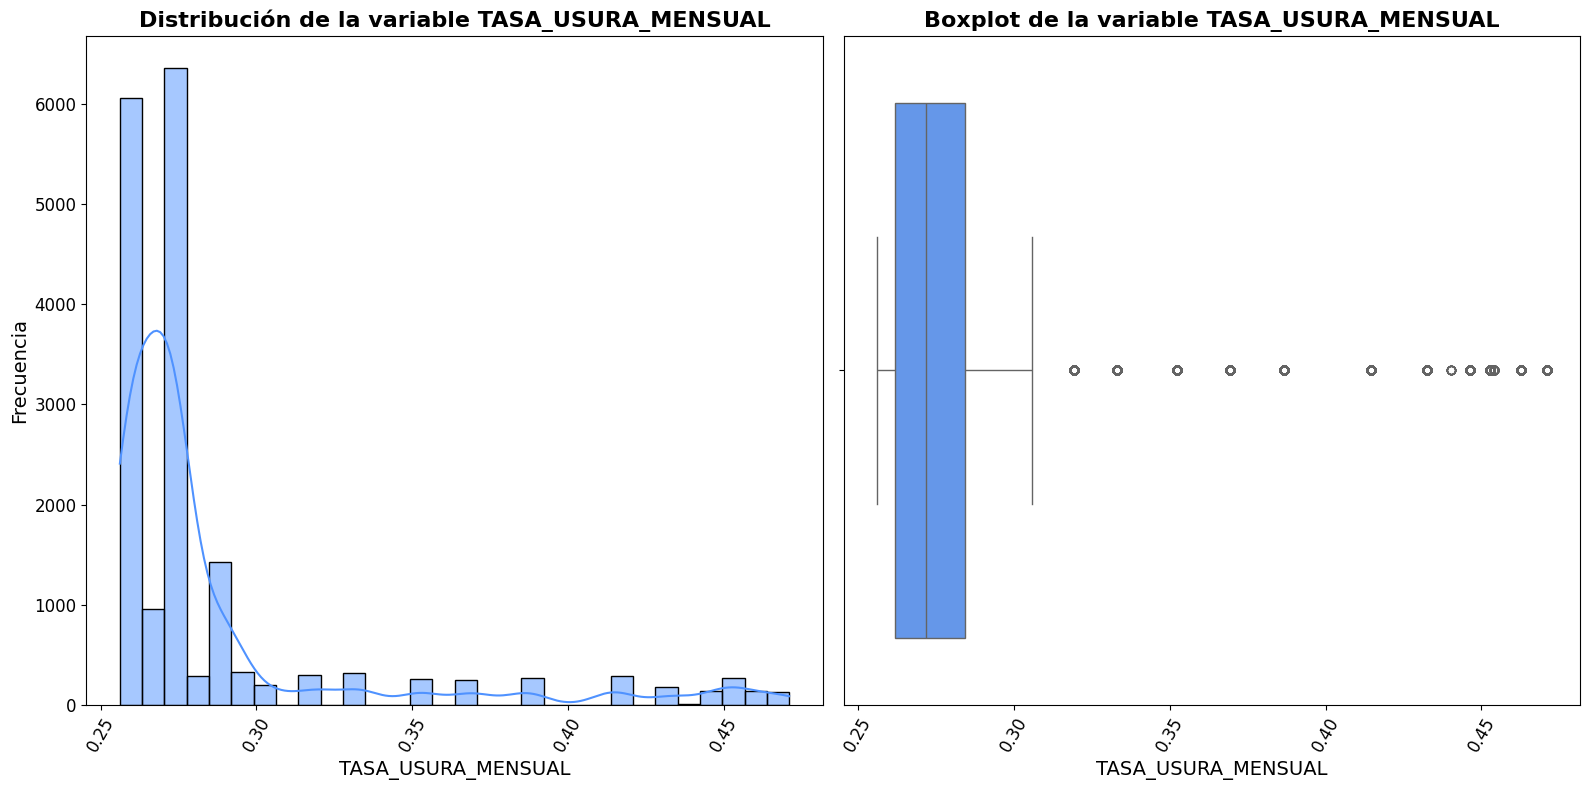

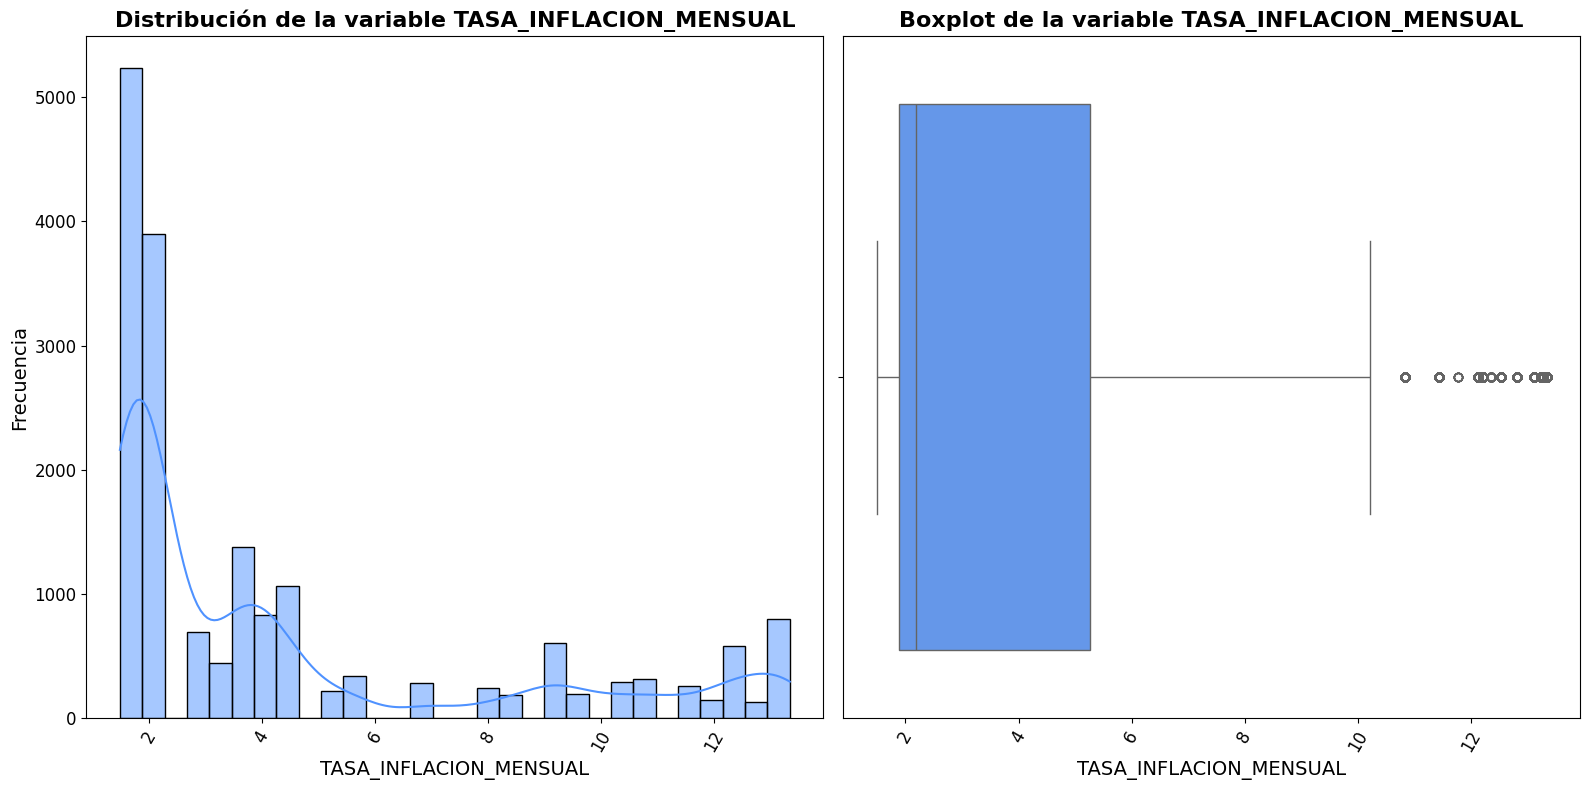

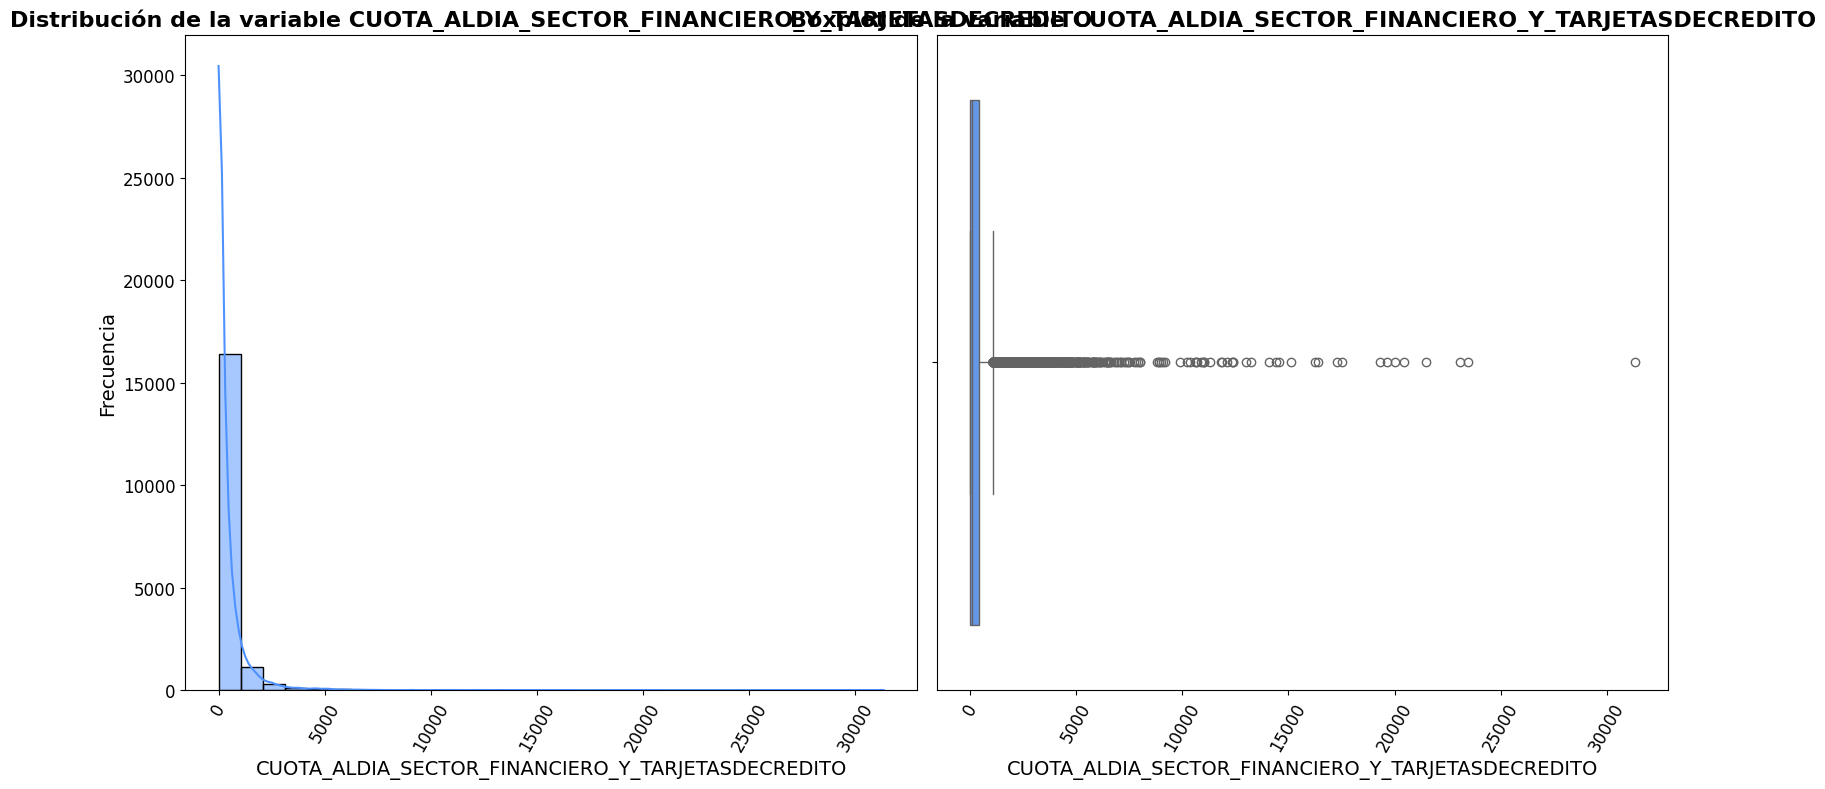

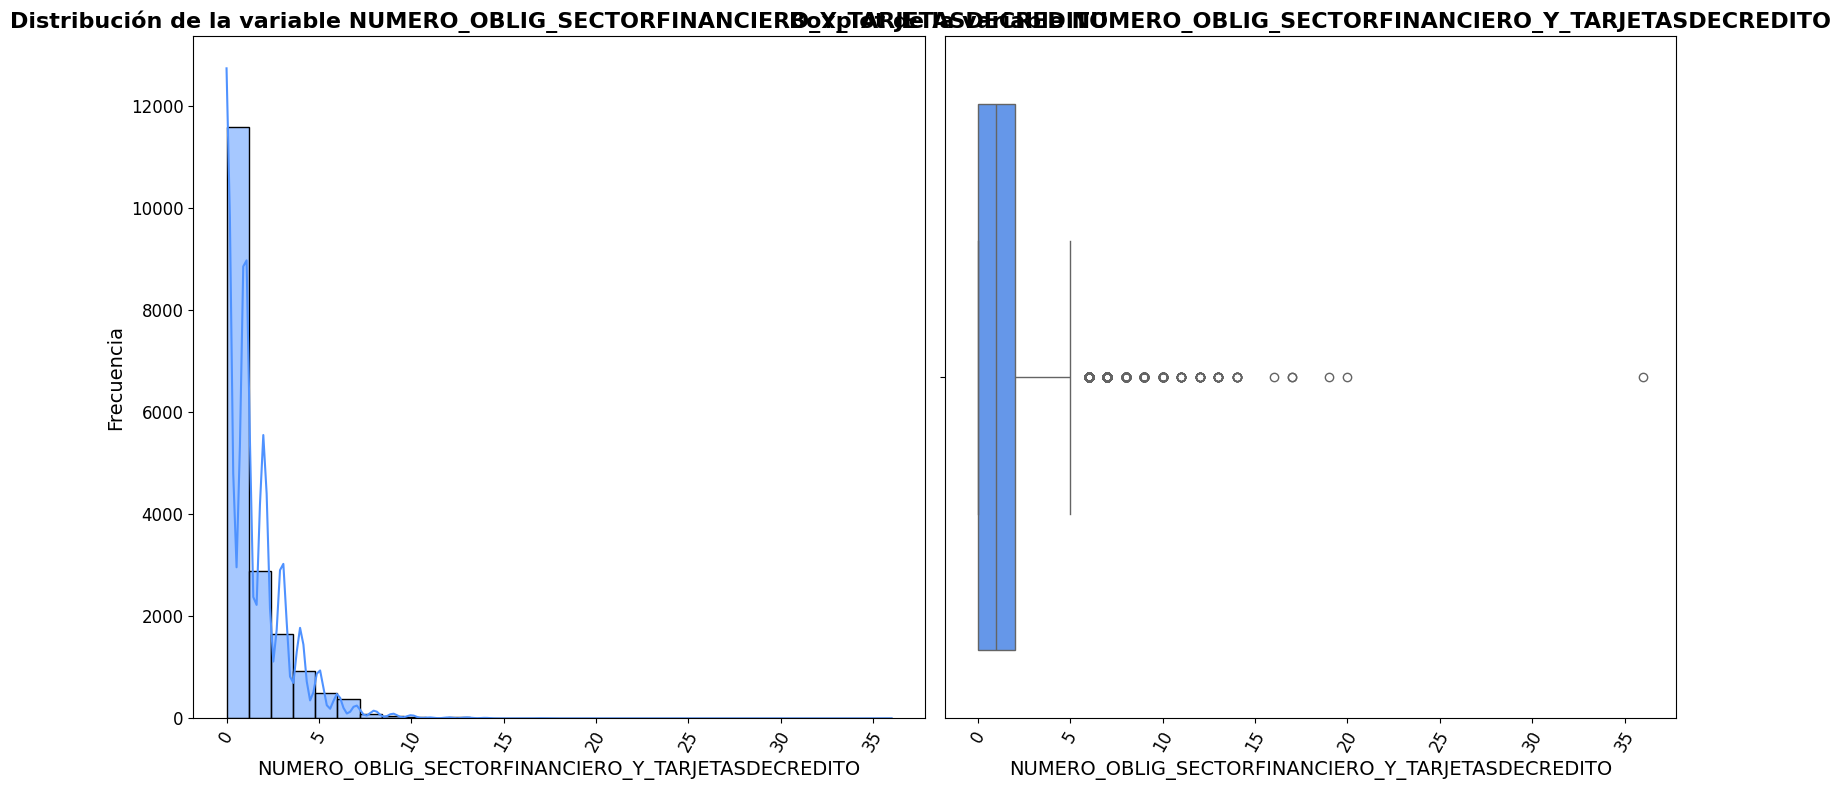

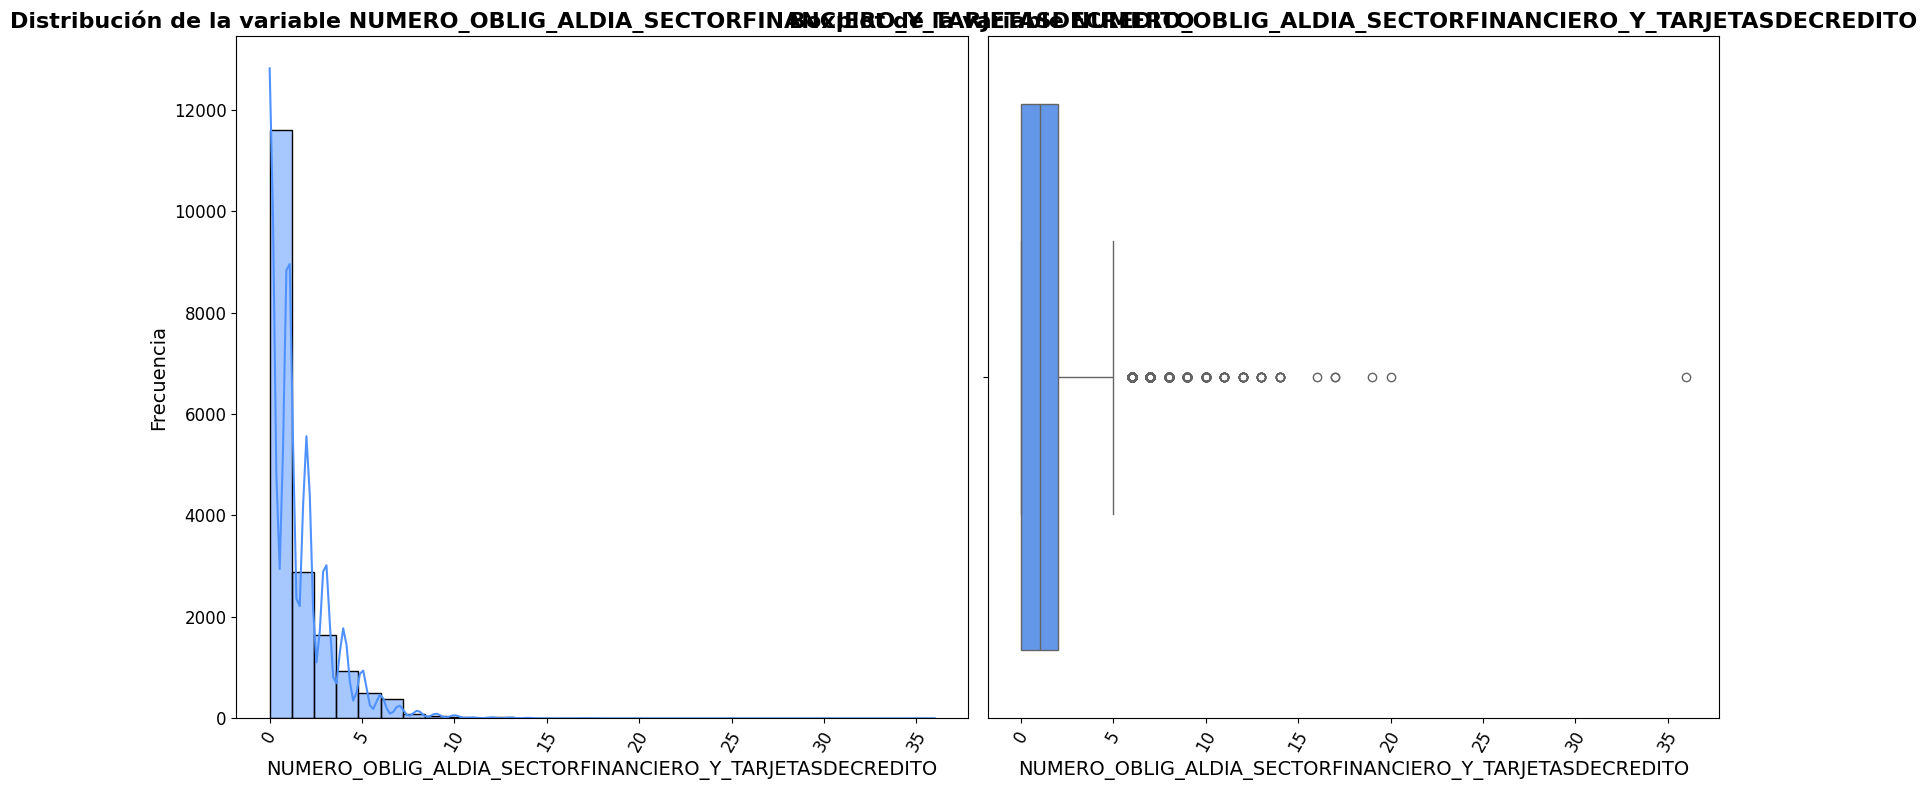

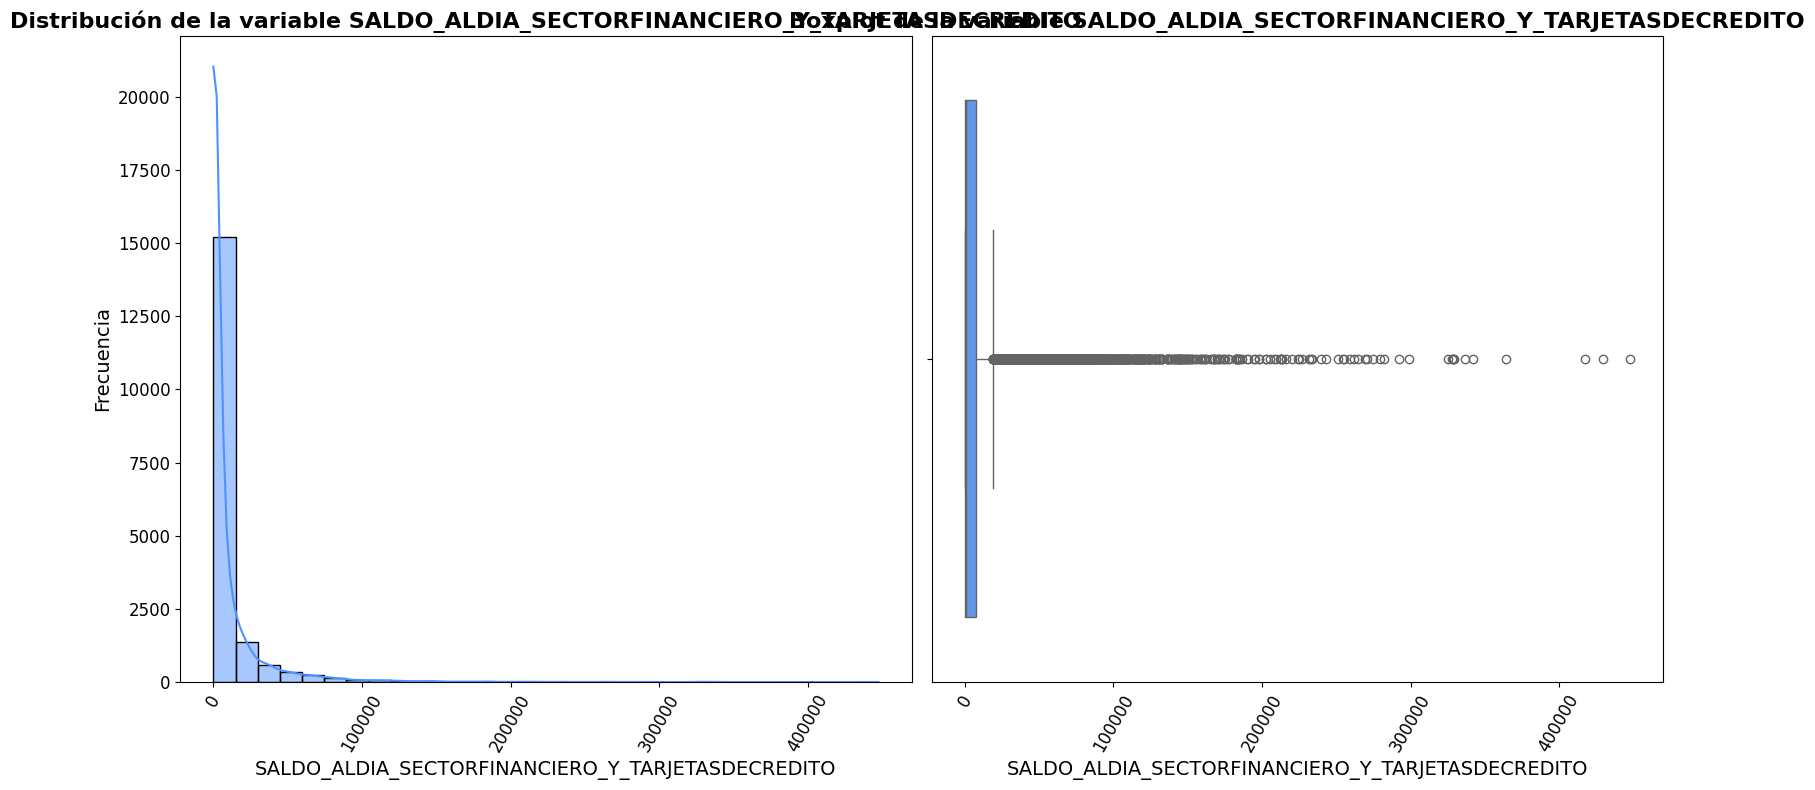

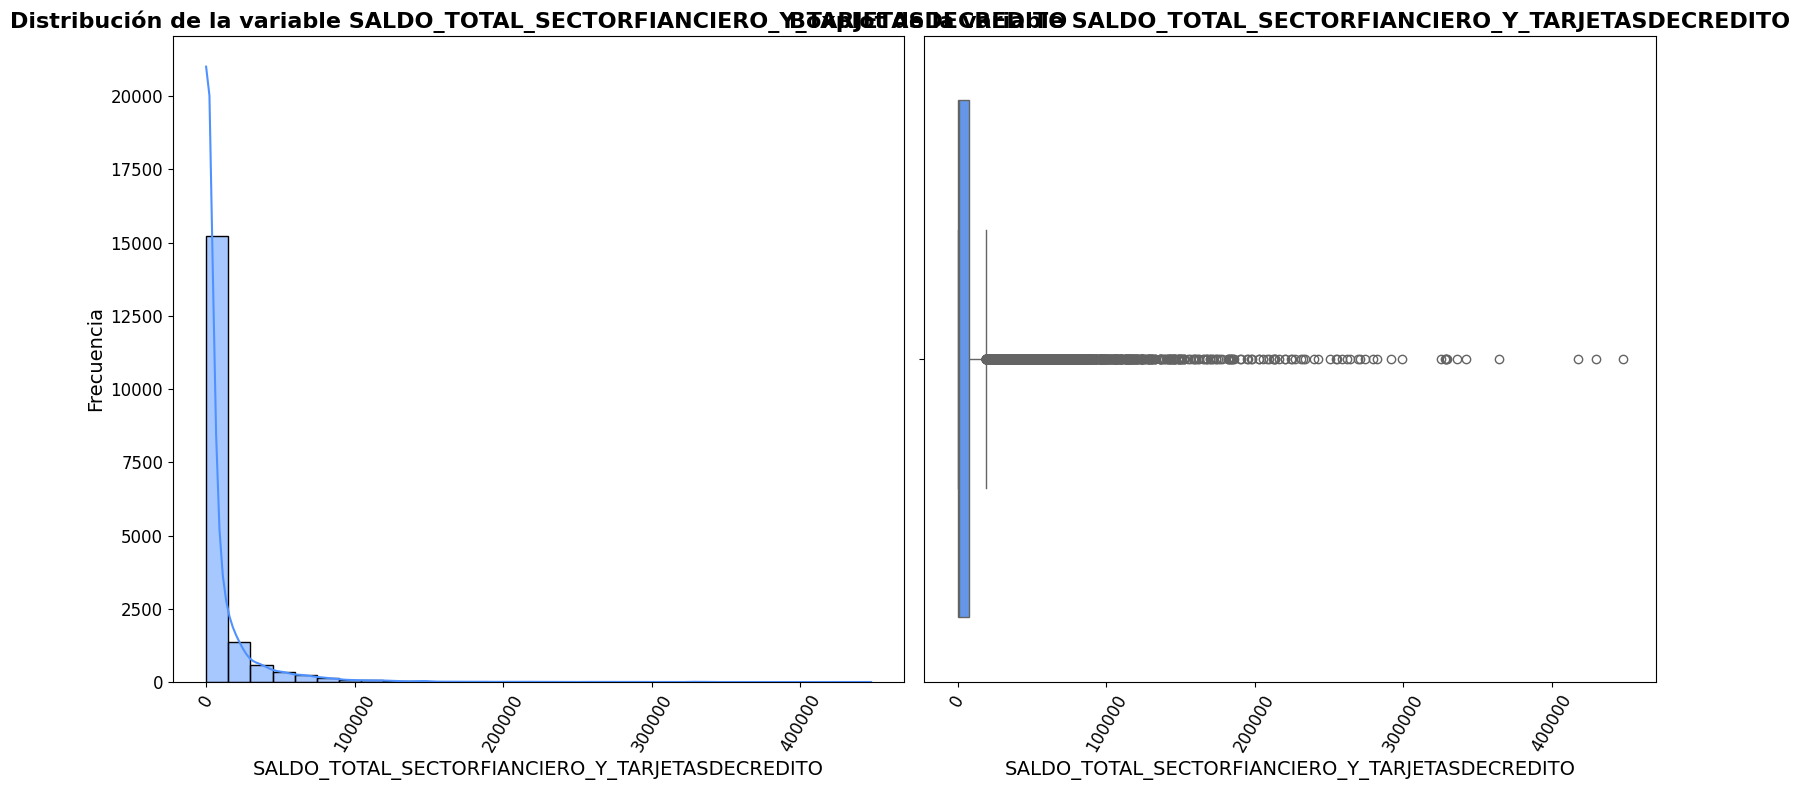

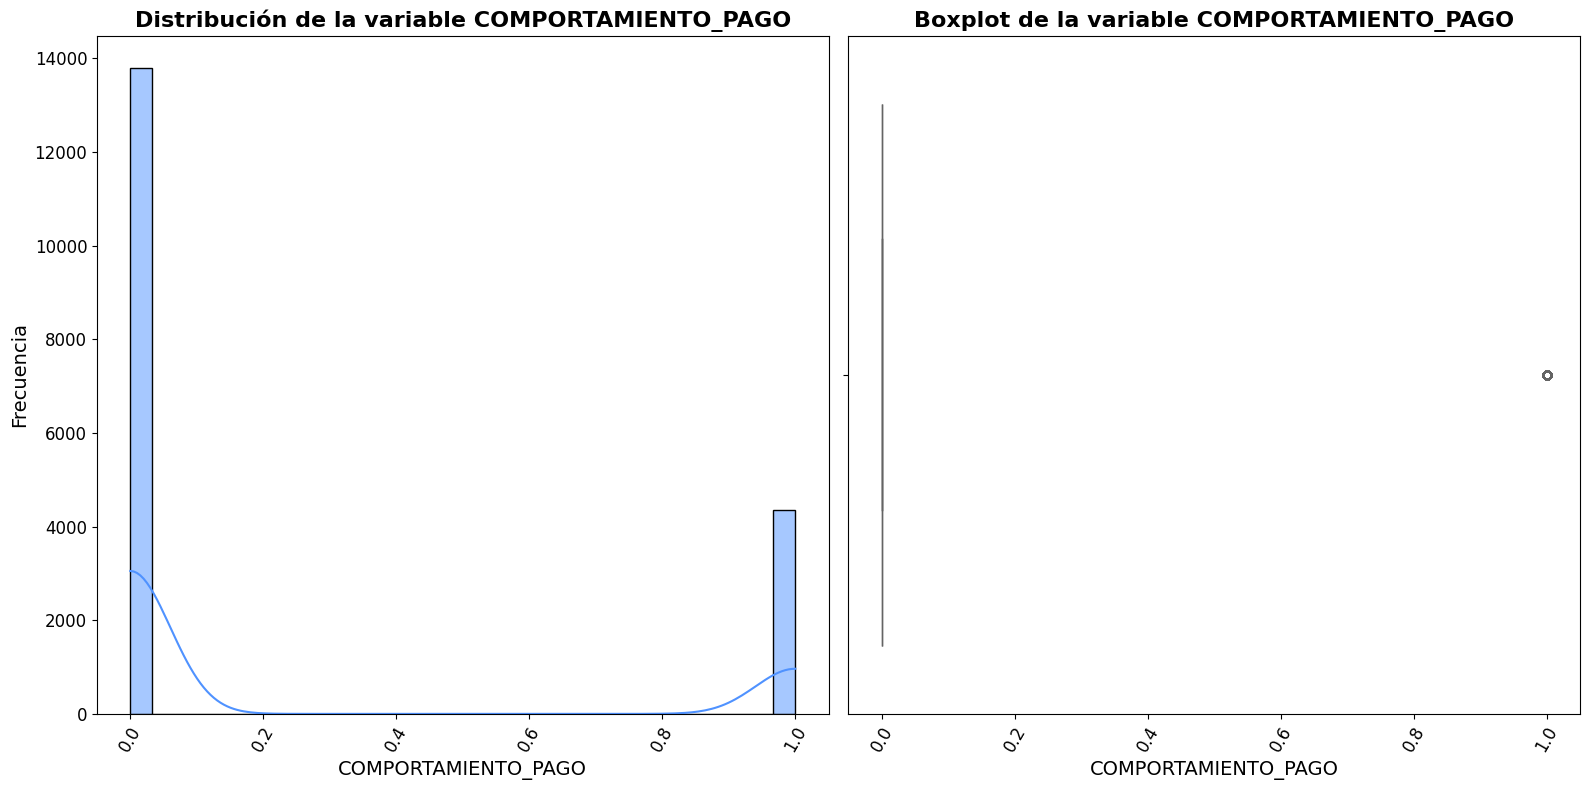

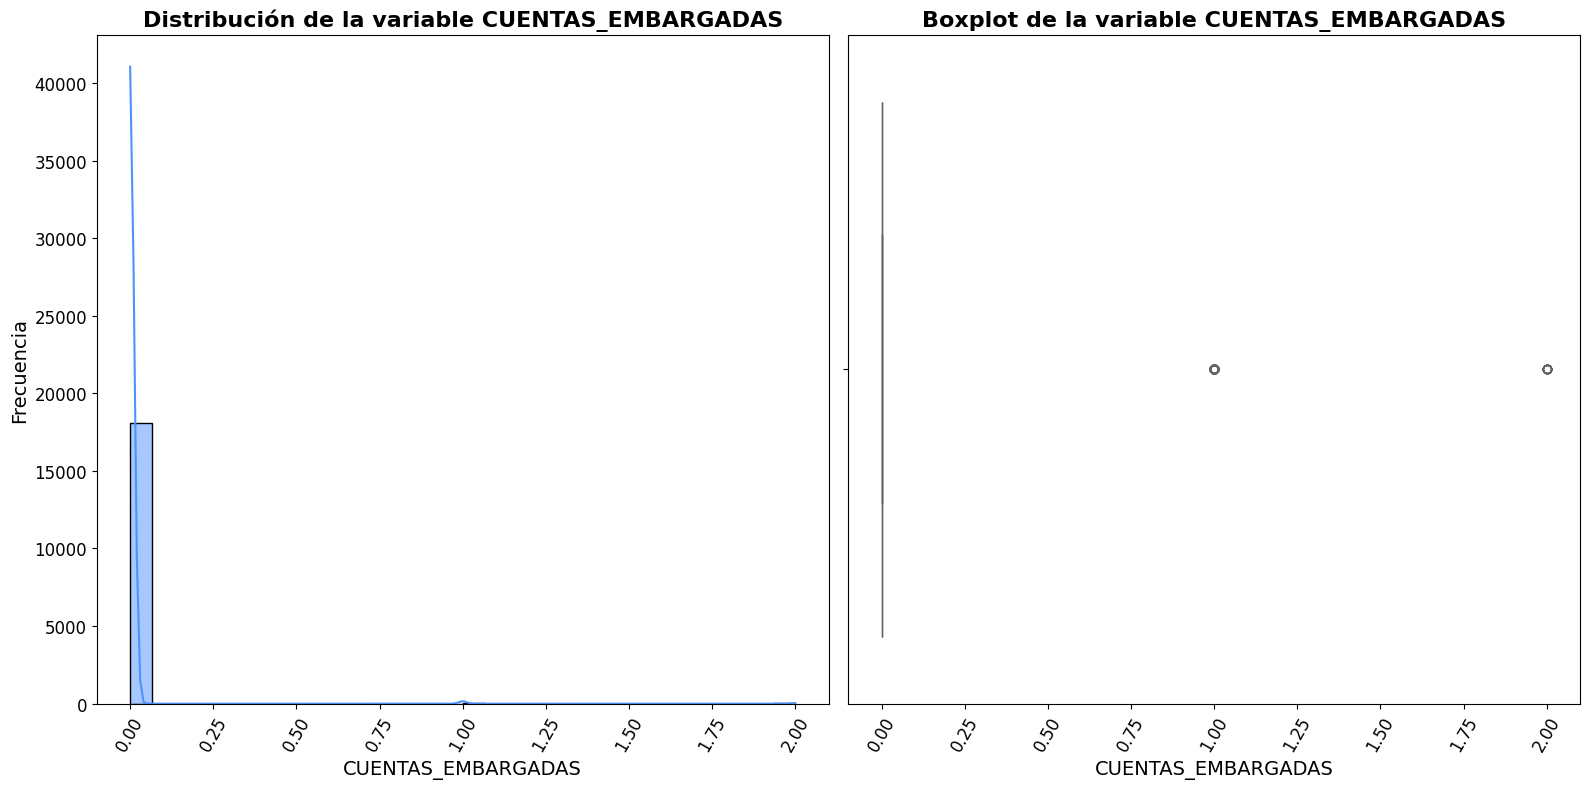

In [23]:
# Crear histograma y boxplot para cada variable cuantitativa
for col in variables_cuantitativas.columns:
    plt.figure(figsize=(16, 8))

    # Subplot 1: Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(data=base_clientes_sin_estrato, x=col, color="#4f92ff", kde=True, bins=30)
    plt.title(f"Distribución de la variable {col}", fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.xticks(rotation=60, fontsize=12)
    plt.yticks(fontsize=12)

    # Subplot 2: Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=base_clientes_sin_estrato, x=col, color="#4f92ff")
    plt.title(f"Boxplot de la variable {col}", fontsize=16, fontweight='bold')
    plt.xlabel(col, fontsize=14)
    plt.xticks(rotation=60, fontsize=12)
    plt.yticks(fontsize=12)

    plt.tight_layout()  # Ajustar diseño para evitar superposición
    plt.show()

Variables como SALARIO_MENSUAL, CUOTA_MENSUAL_SECTOR_REAL, y TIEMPO_VIVIENDA, presentan distribuciones altamente sesgadas a la derecha, indicando la presencia de valores atípicos significativos. Esto es evidente también en los boxplots, donde se observan múltiples outliers alejados del rango intercuartílico.

Las variables como VALOR_CREDITO, TIEMPO_VIVIENDA, SALARIO_MENSUAL, y ANTIGUEDAD_LABORAL_MESES muestran varios outliers en sus boxplots. Estos valores extremos deben analizarse cuidadosamente, ya que podrían influir en la interpretación de las métricas promedio y en los modelos predictivos.

Algunas variables, como PLAZO_MESES y PERSONAS_A_CARGO, muestran distribuciones con múltiples picos, lo que sugiere la existencia de diferentes grupos o segmentos dentro de los datos. Esto puede ser útil para la segmentación o el análisis diferenciado por subgrupos.

Variables como PUNTAJE muestran una distribución más concentrada, mientras que otras, como TIEMPO_VIVIENDA, presentan una alta dispersión, lo que indica mayor variabilidad en los datos.

Variables como CUOTA_DIA_TOTAL, NUMERO_OBLIG_SECTOR_REAL, SALDOS_ALDIA_SECTOR_REAL, y SALDOS_TOTALES presentan distribuciones fuertemente asimétricas a la derecha. Esto indica que la mayoría de los valores están concentrados en el extremo inferior de las distribuciones, con unos pocos valores muy altos que representan outliers.

Los boxplots confirman la presencia de un número significativo de valores atípicos, especialmente en variables como SALDOS_TOTALES, SALDOS_ALDIA_TOTAL, y NUMERO_OBLIG_TOTAL. Estos outliers están distribuidos en valores muy superiores al rango intercuartílico, lo que podría afectar la media y la interpretación de las estadísticas descriptivas de estas variables.

Las variables relacionadas con el número de obligaciones y saldos (NUMERO_OBLIG_TOTAL, SALDOS_TOTALES) muestran una clara concentración de valores bajos, pero con una cola larga hacia los valores más altos, lo que sugiere que algunos clientes tienen un número significativamente mayor de obligaciones o saldos que la mayoría.

Variables como "SALARIO_MENSUAL" "SALDO_ALDIA_SECTOR_FINANCIERO_Y_TARJETASDECREDITO", "CUOTA_MENSUAL", y otras variables relacionadas con montos de saldos y cuotas, presentan una alta concentración en valores bajos, con distribuciones asimétricas hacia la derecha y un número considerable de valores atípicos (outliers) en los extremos superiores. Este comportamiento es típico en datos financieros, donde una gran parte de la población se concentra en rangos de ingresos y deudas más bajos, mientras que algunos casos aislados presentan valores significativamente altos. Los boxplots corroboran la presencia de outliers en estas variables, lo que sugiere la necesidad de una estrategia adecuada para su tratamiento, como la transformación de datos o el análisis de la distribución antes de realizar modelos predictivos.

Variables como "TASA_USURA_MENSUAL" y "TASA_INFLACION_MENSUAL" también muestran una distribución con sesgo a la derecha y valores atípicos que deben tratarse con cuidado en el análisis. Además, se observa una fuerte concentración de datos en categorías específicas en algunas variables categóricas como "CUENTAS_EMBARGADAS", lo que sugiere que ciertas condiciones o eventos son poco frecuentes en la muestra.

**Teniendo en cuenta lo anterior, será necesario aplicar transformaciones o técnicas de tratamiento de outliers para mejorar la precisión y robustez de los modelos predictivos**

## **Participación de cada variable (Cuantitativa) frente a variable principal 'COMPORTAMIENTO_PAGO'**

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




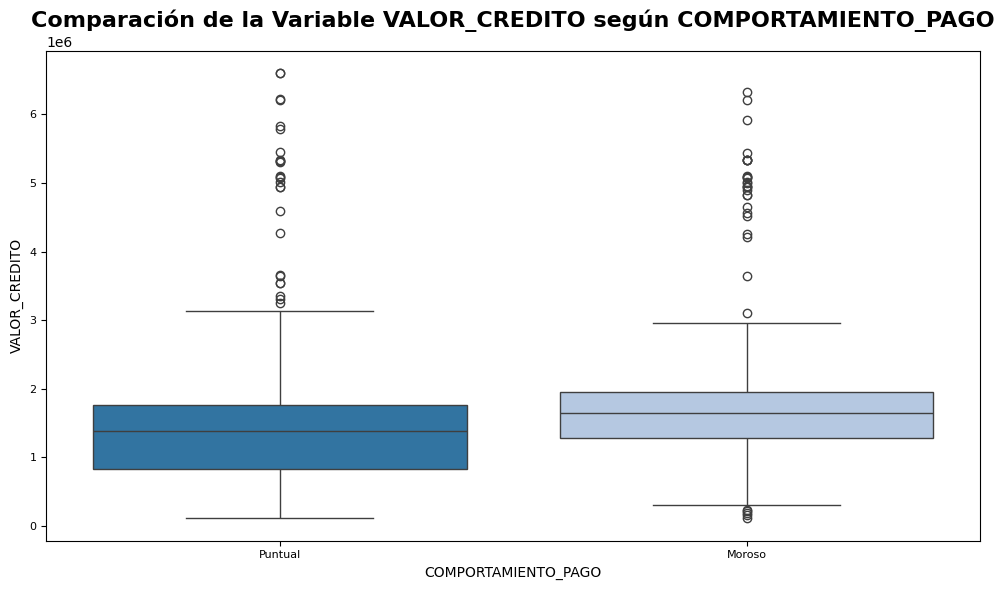

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




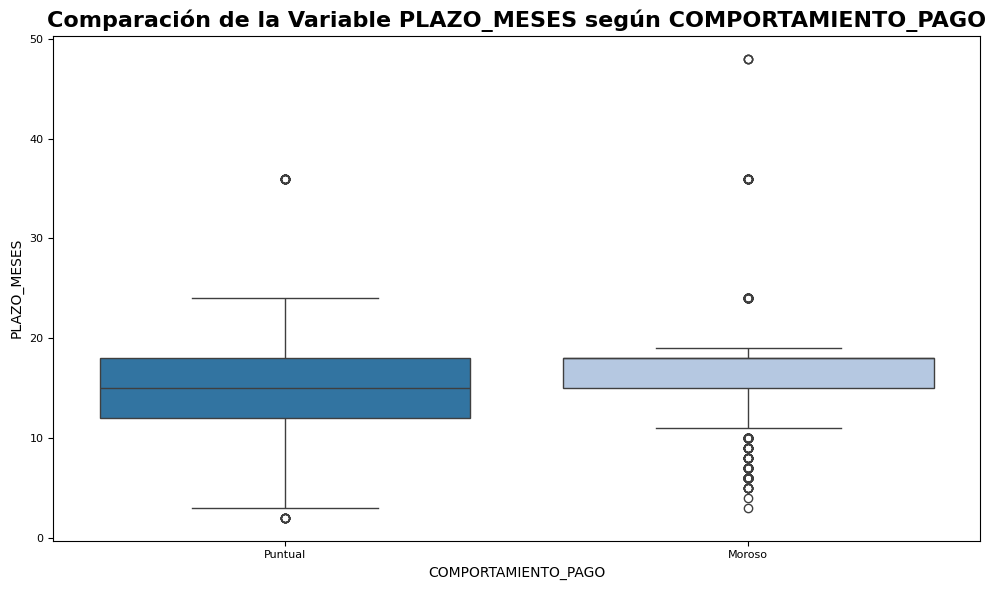

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




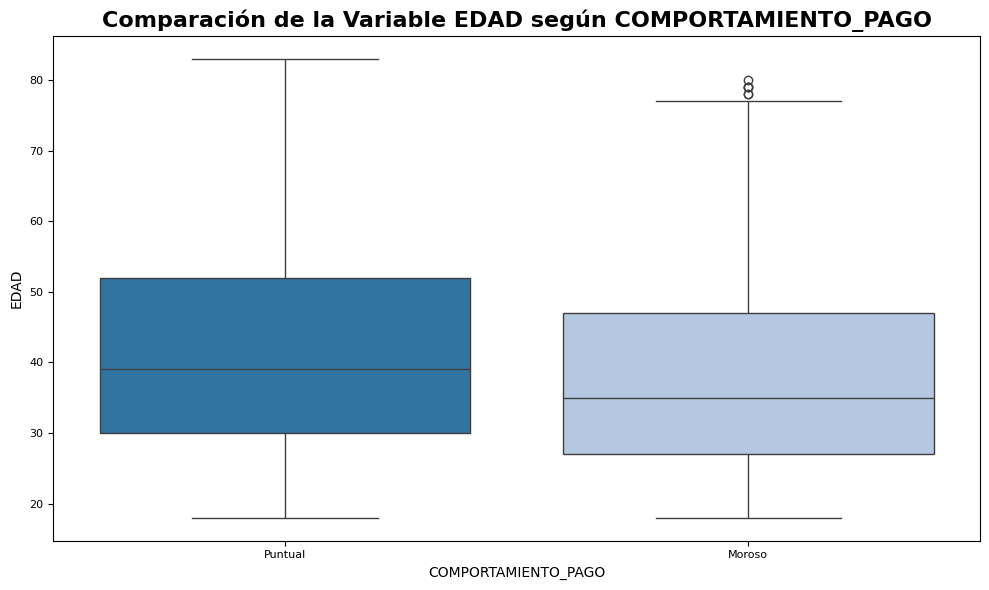

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




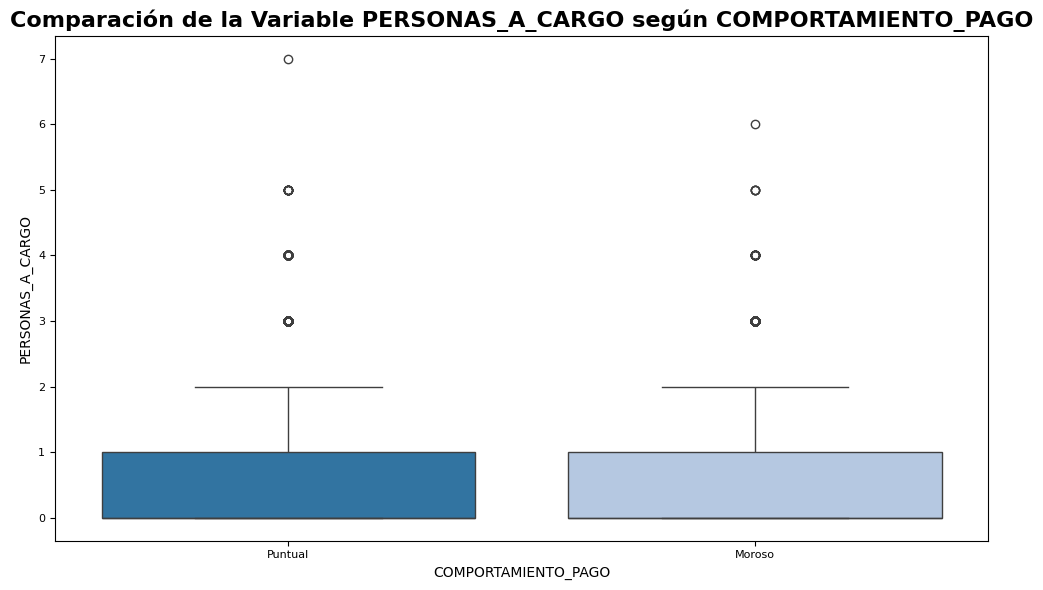

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




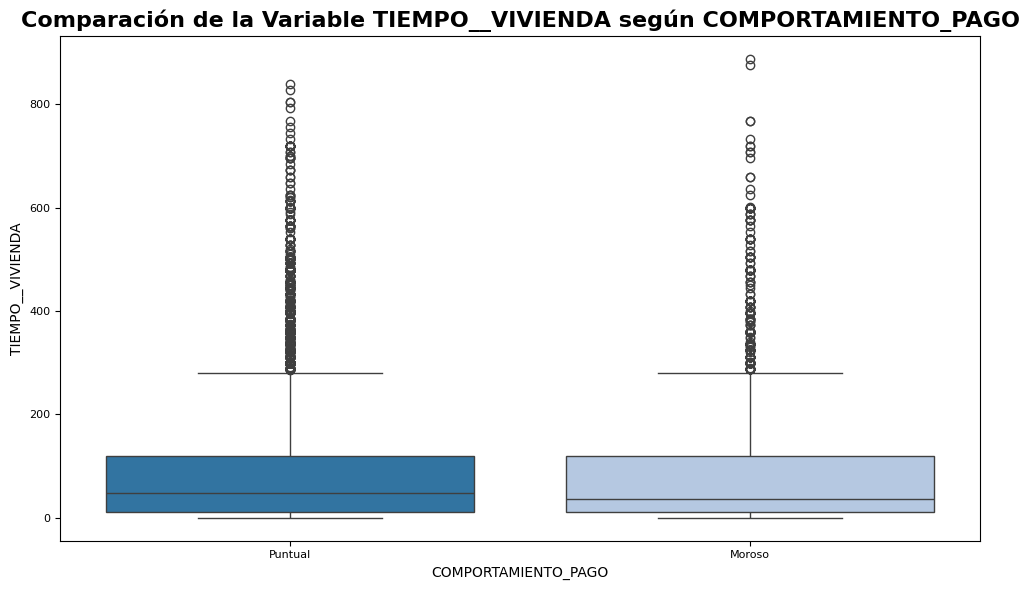

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




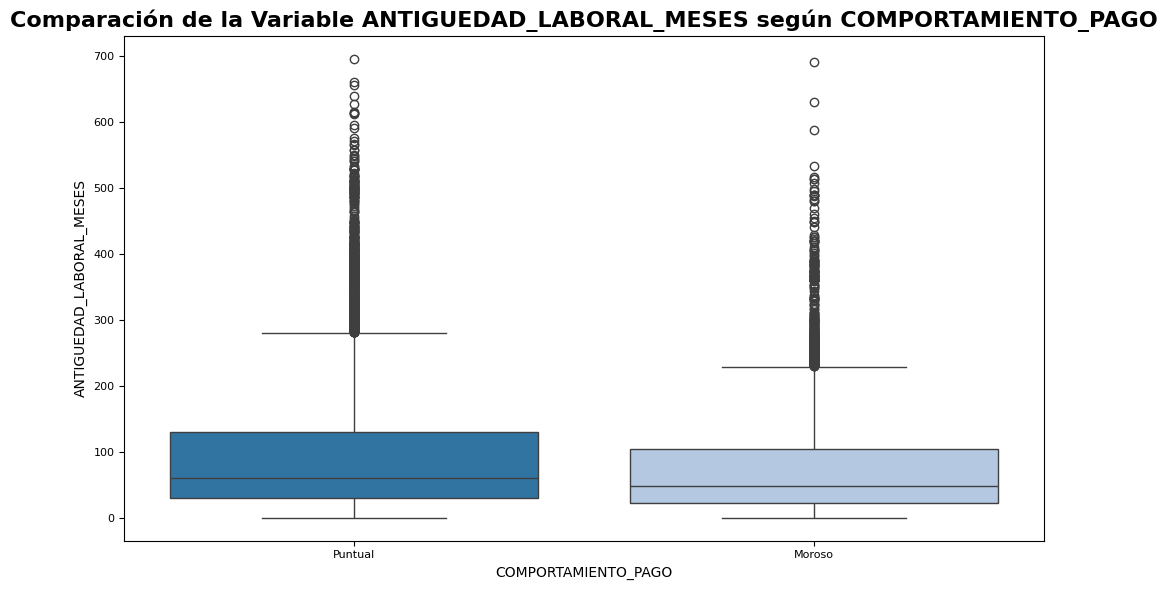

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




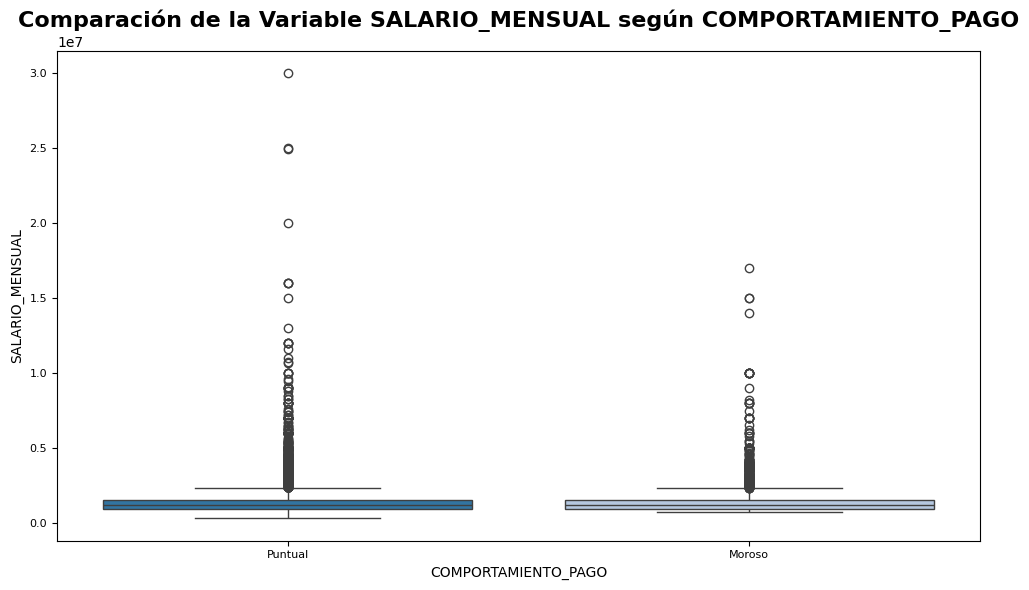

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




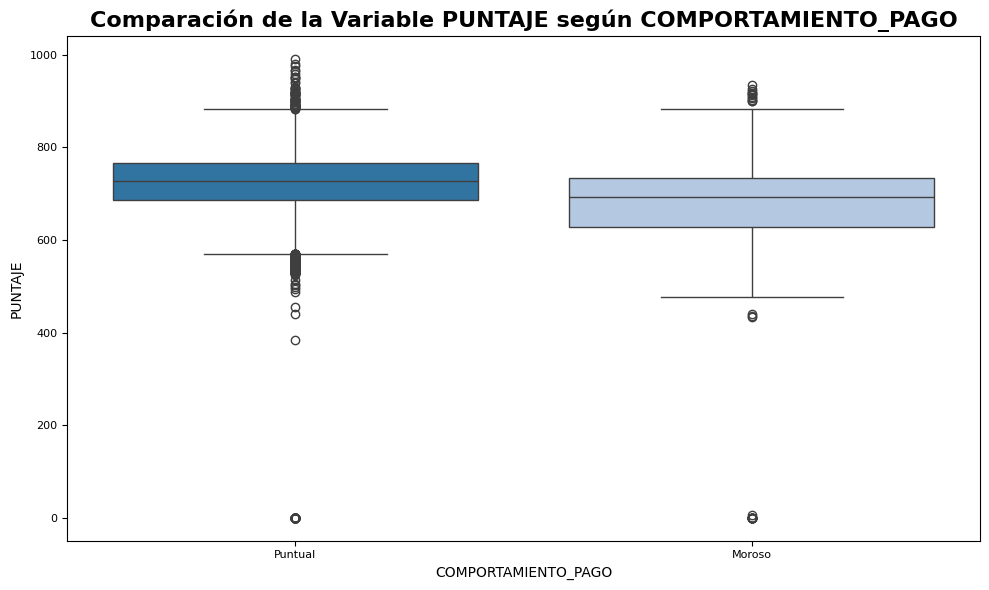

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




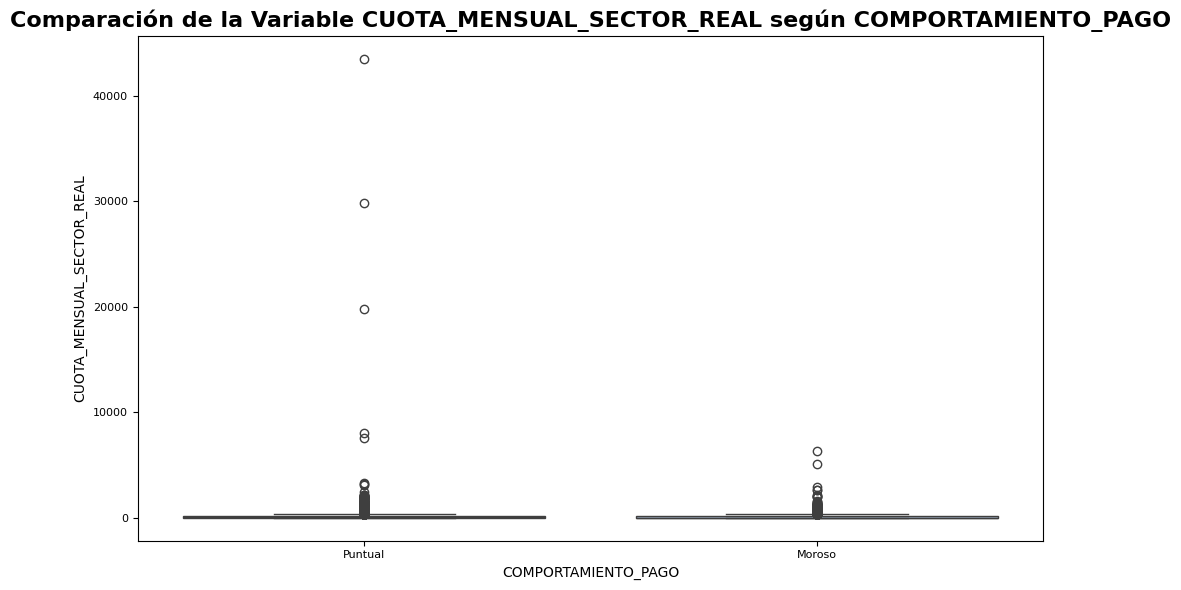

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




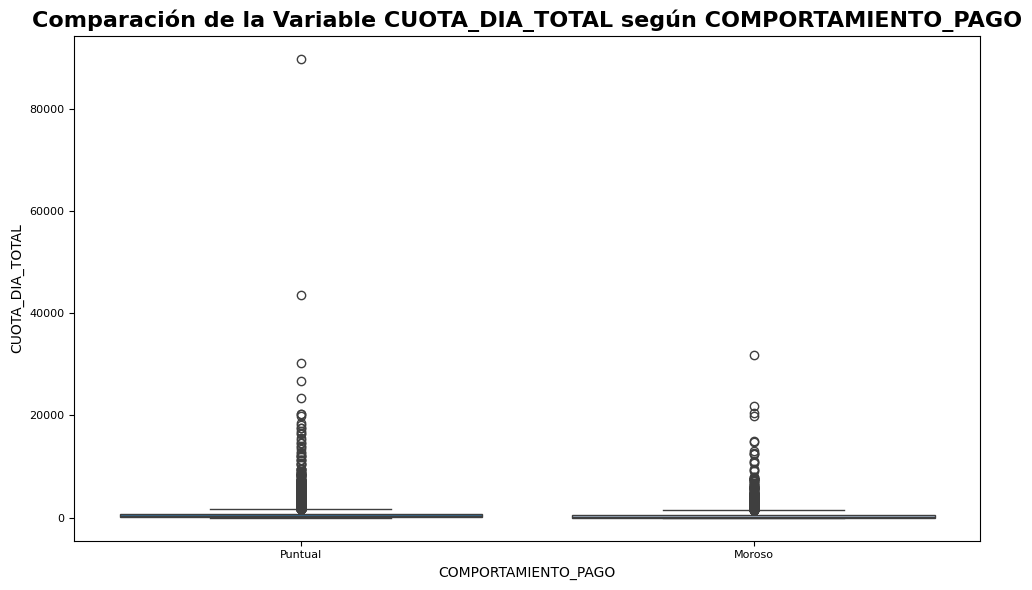

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




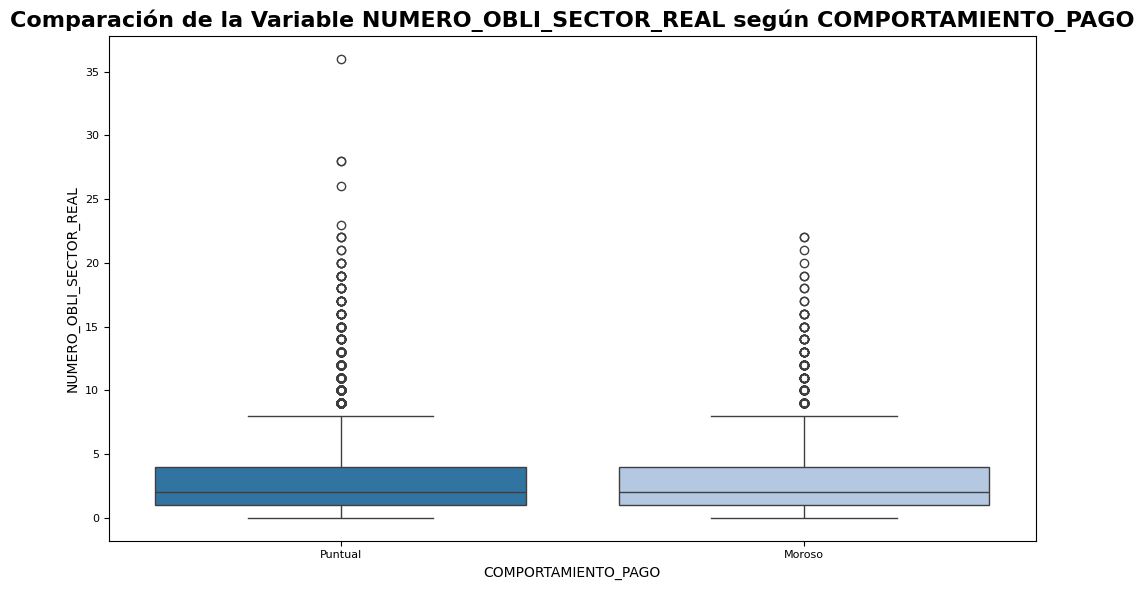

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




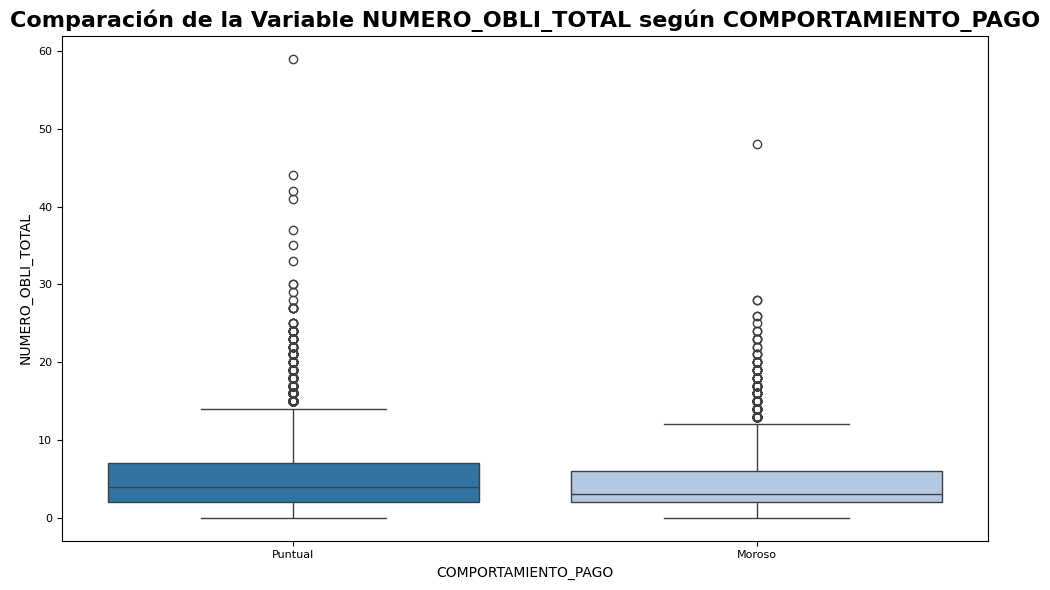

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




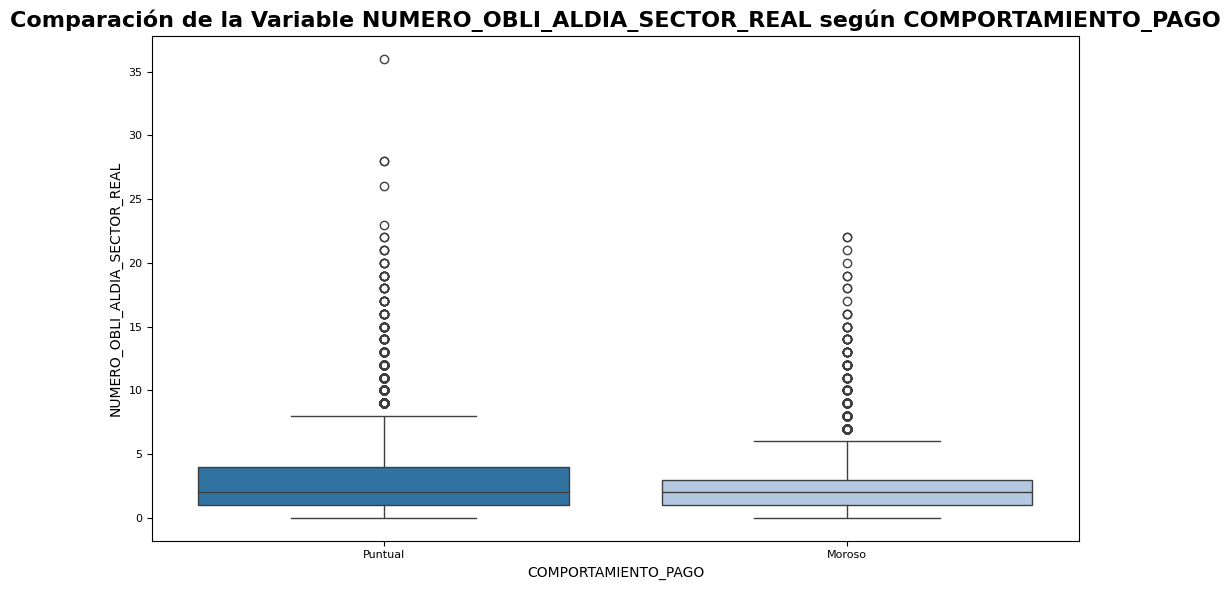

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




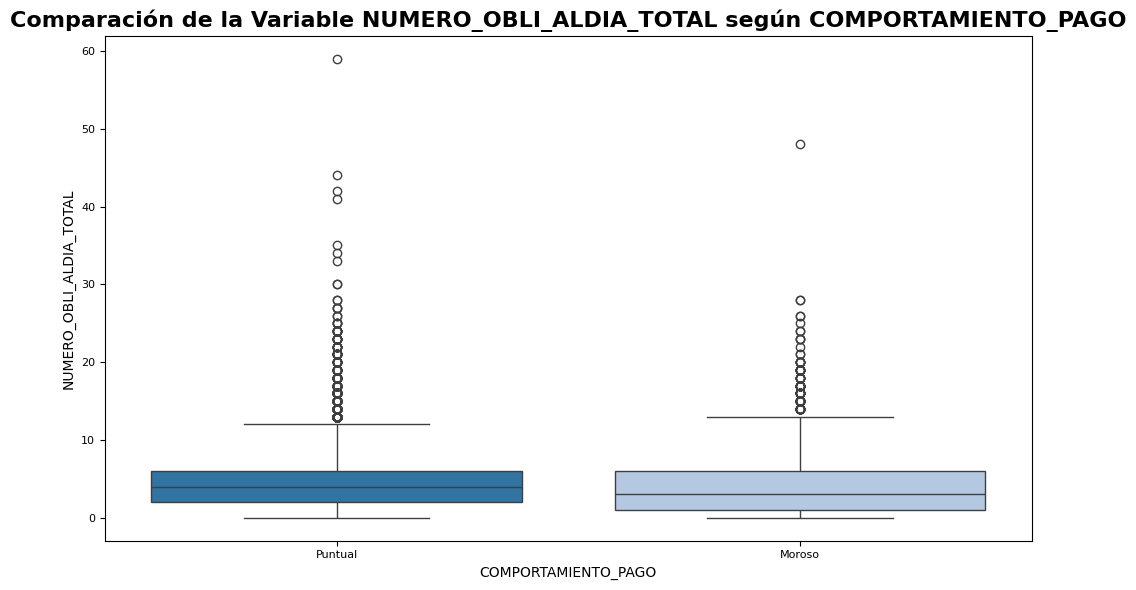

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




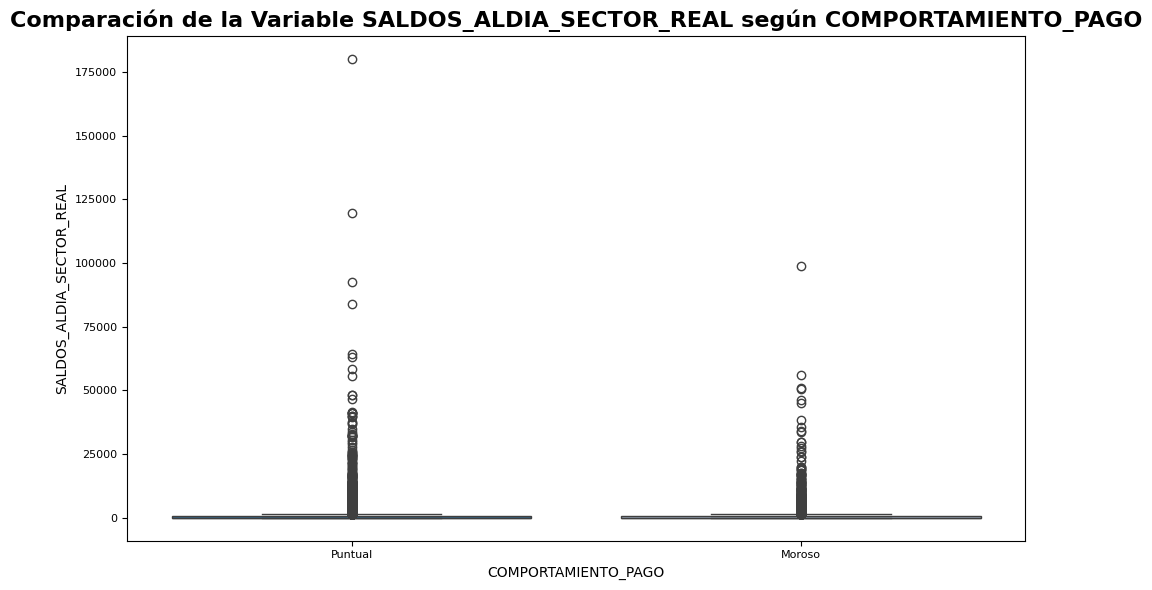

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




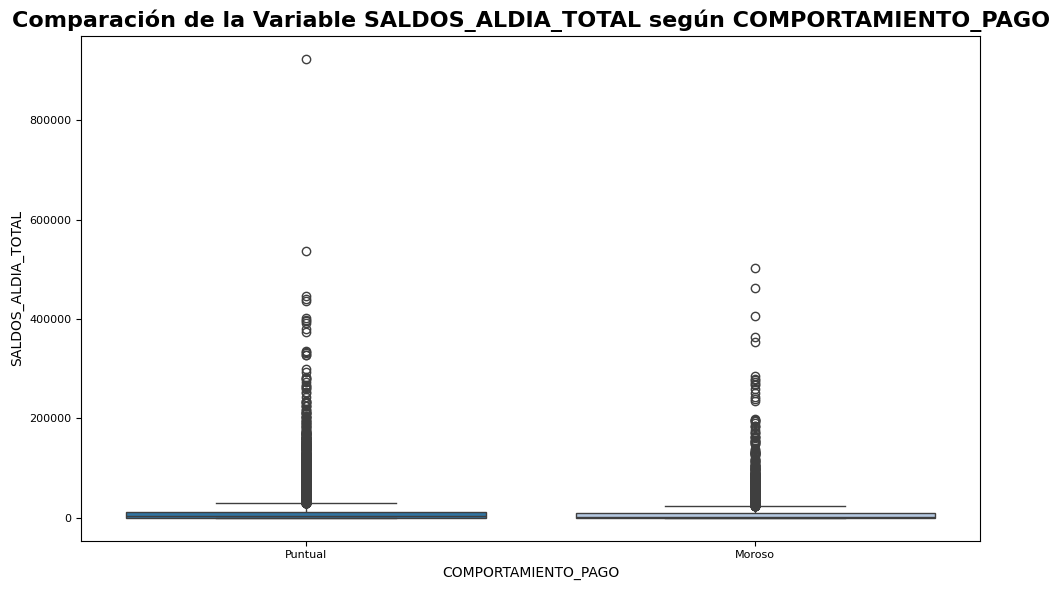

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




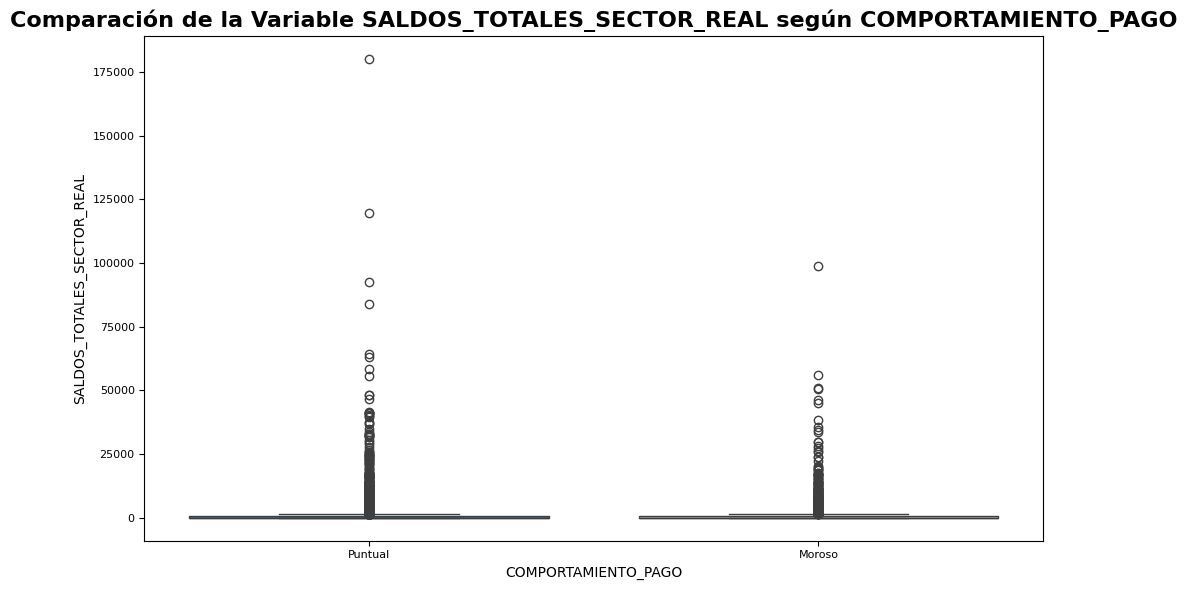

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




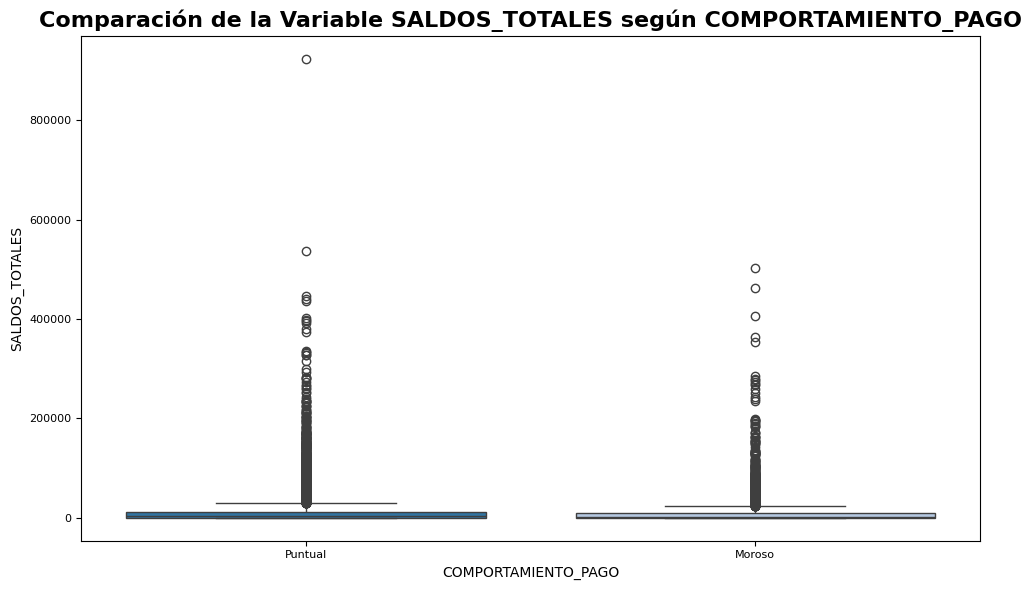

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




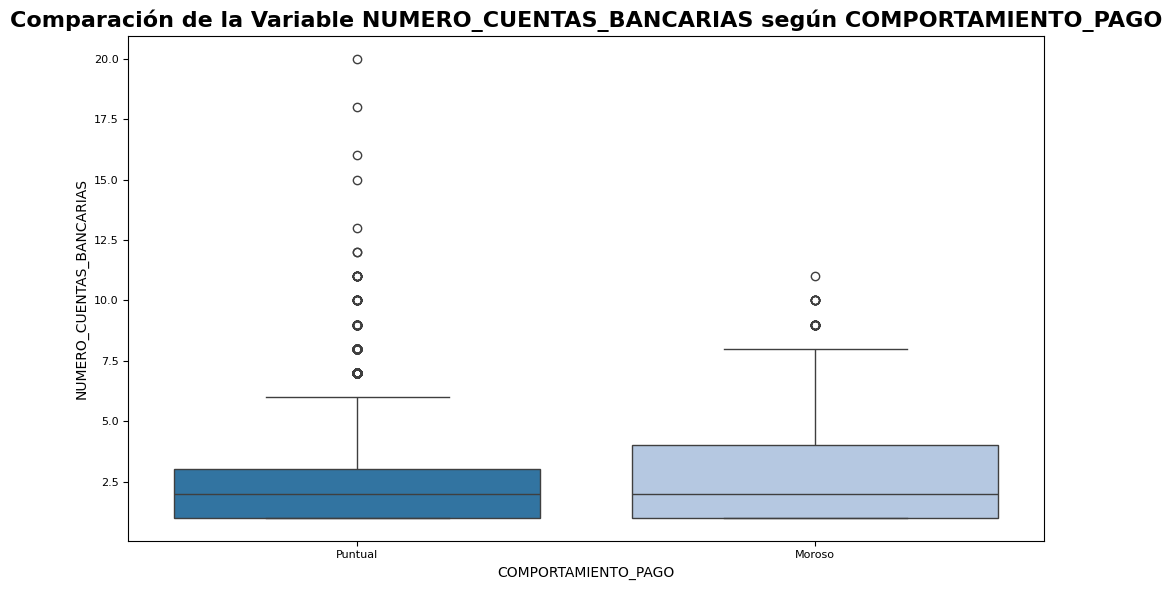

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




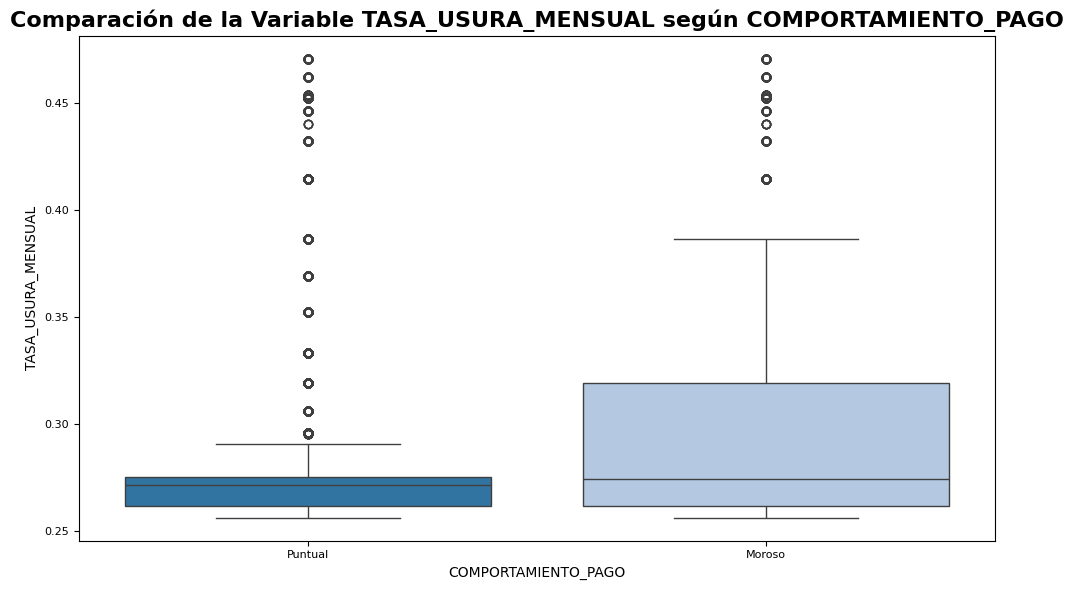

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




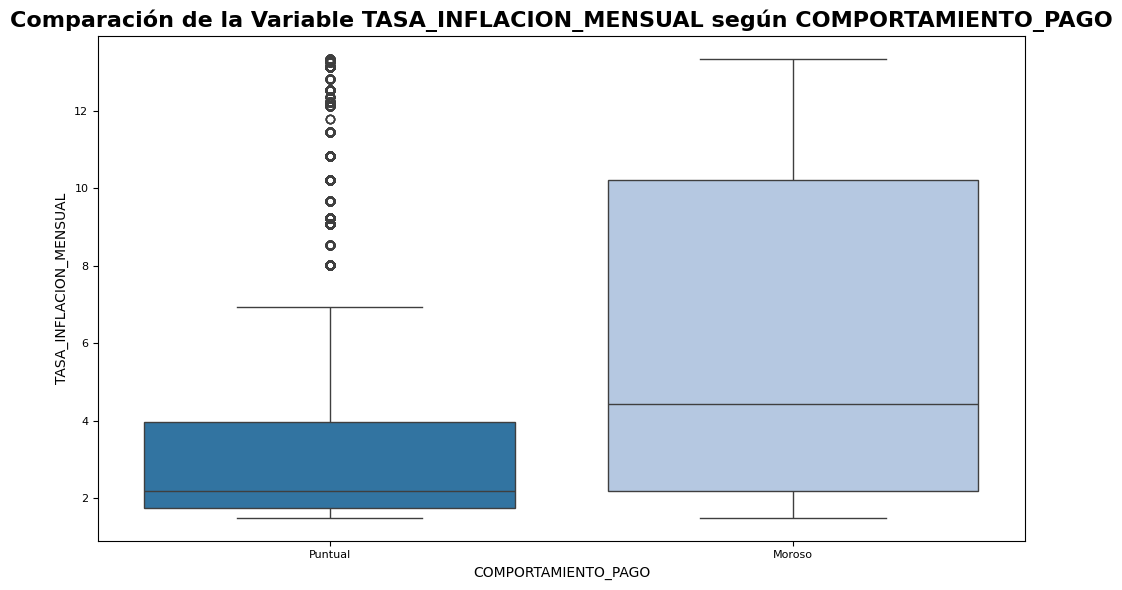

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




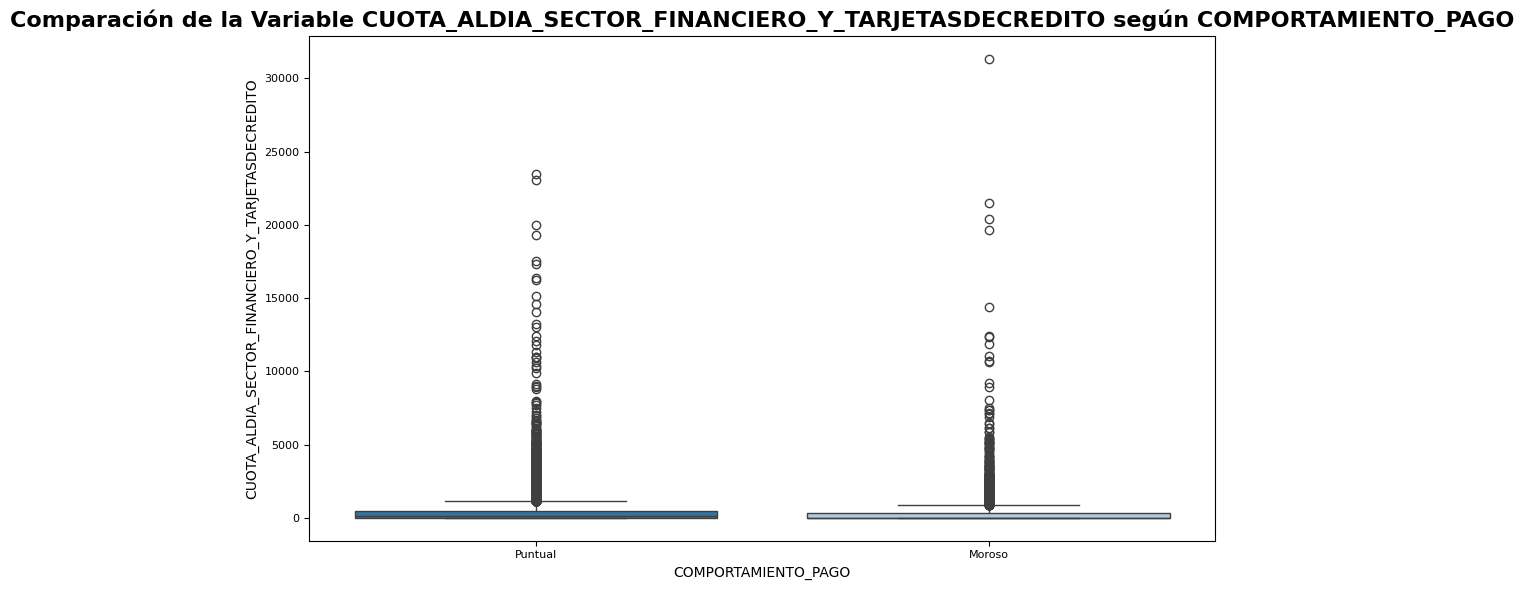

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




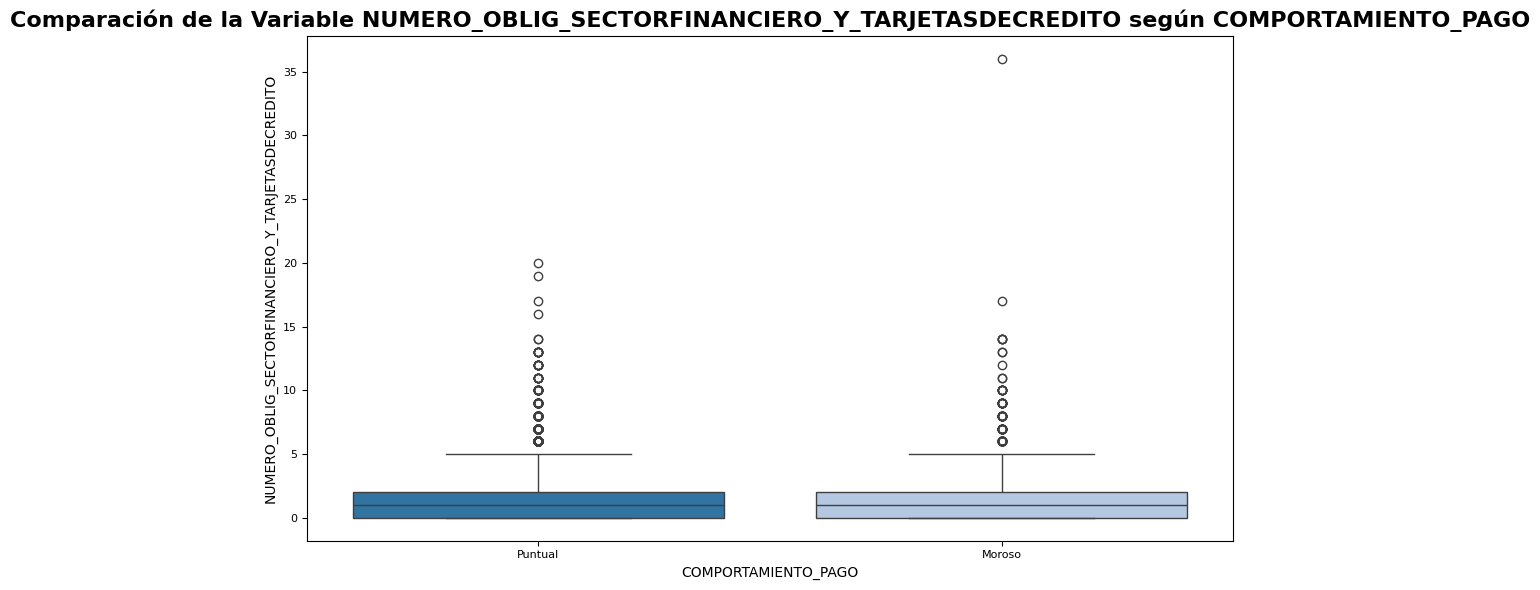

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




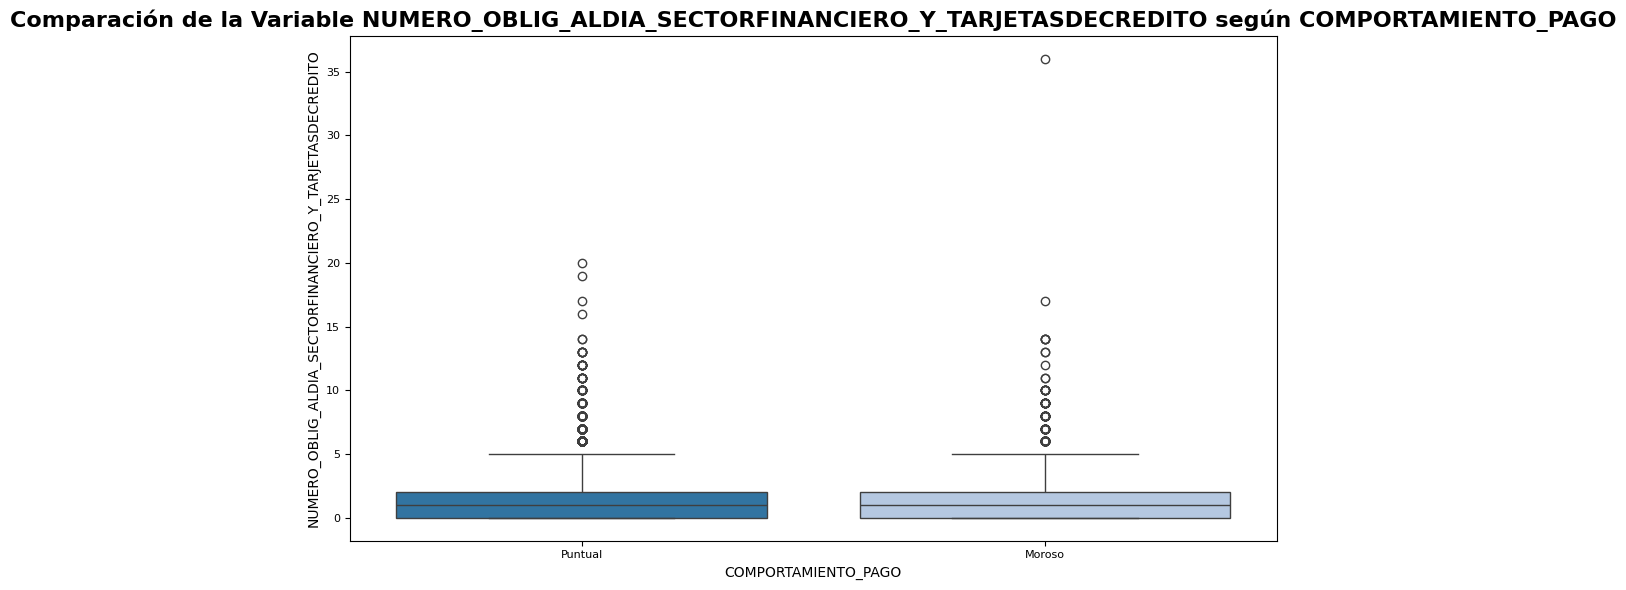

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




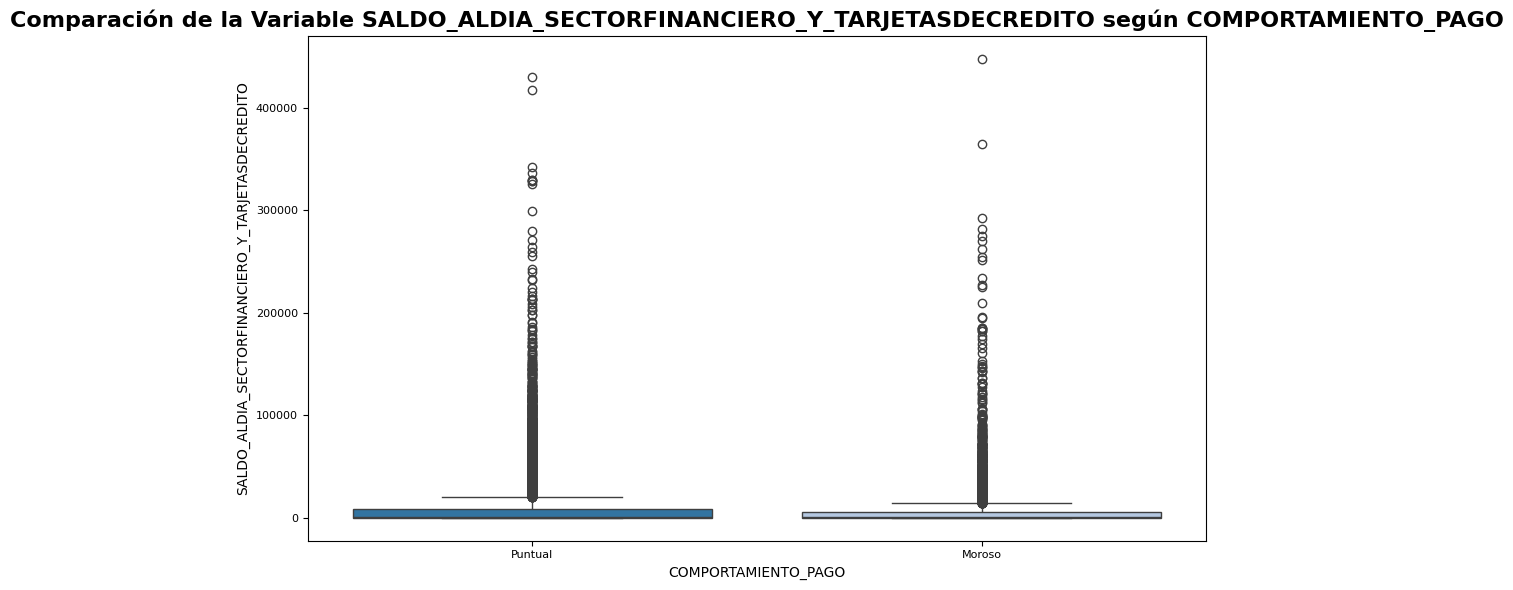

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




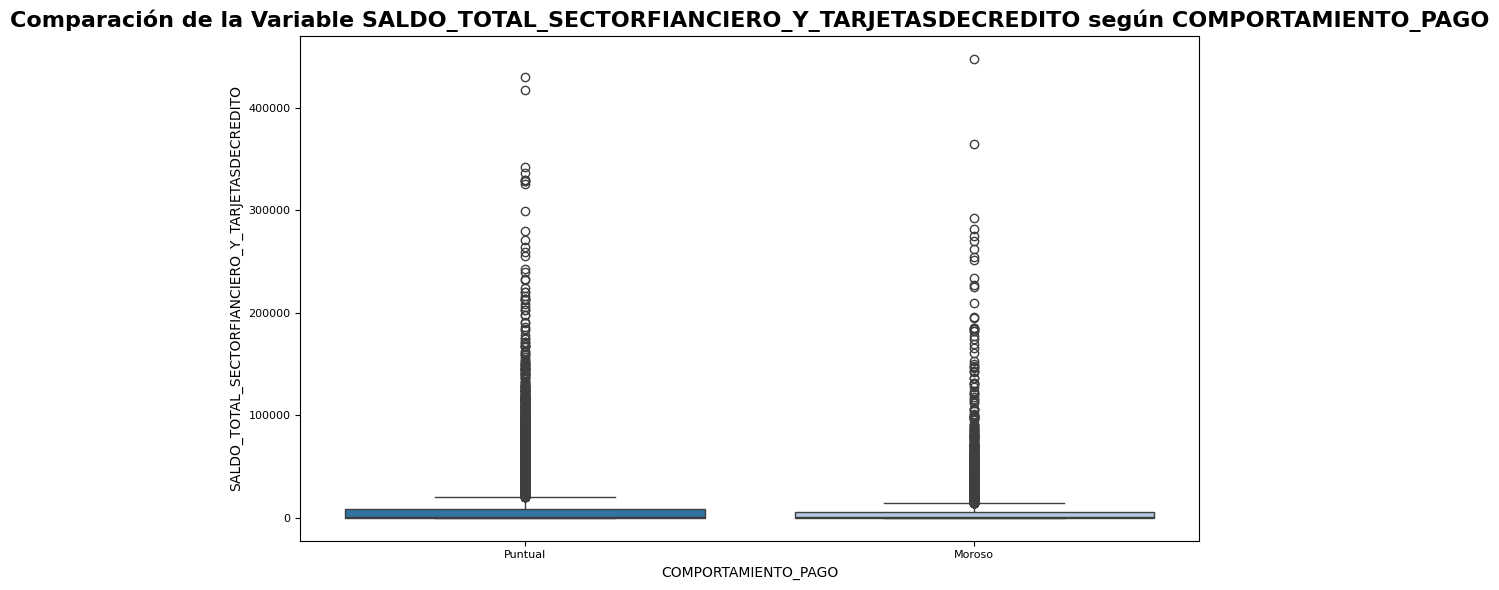

<ipython-input-24-fb9f45f26448>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




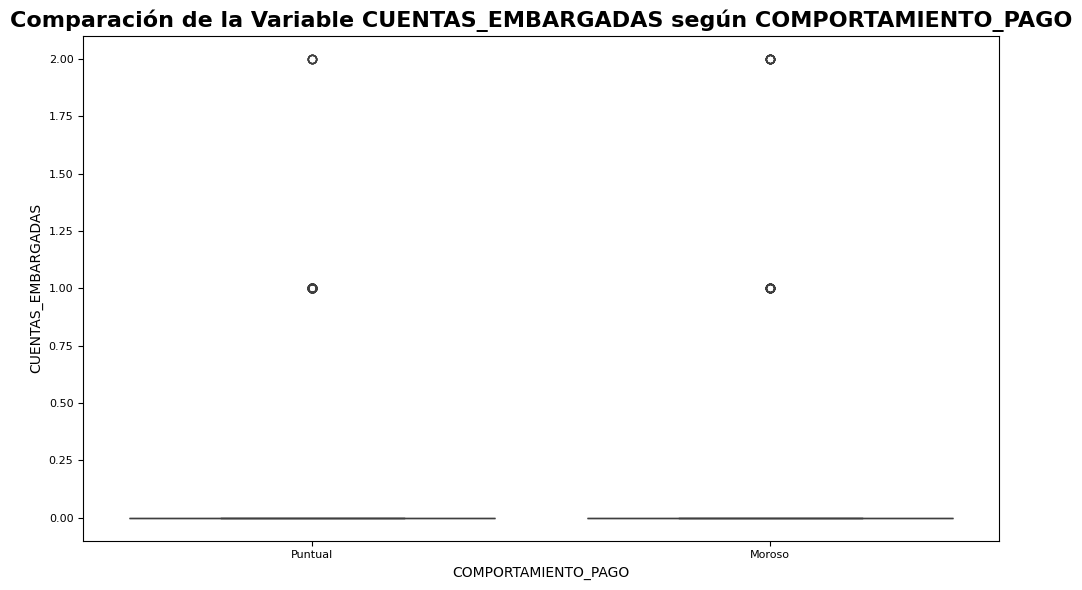

In [24]:
# Crear una copia del dataset original de variables cuantitativas
variables_cuantitativas_copy = variables_cuantitativas.copy()

# Convertir los valores de la variable 'COMPORTAMIENTO_PAGO' a categóricos con las etiquetas correspondientes
variables_cuantitativas_copy['COMPORTAMIENTO_PAGO'] = variables_cuantitativas_copy['COMPORTAMIENTO_PAGO'].replace({0: 'Puntual', 1: 'Moroso'})

# Eliminar la variable 'ESTRATO' del nuevo dataset
variables_cuantitativas_sin_estrato = variables_cuantitativas_copy.drop(columns=['ESTRATO'], errors='ignore')

# Definir los colores en base a la imagen proporcionada
colors = ['#1f77b4', '#aec7e8']  # Azul oscuro para 'Moroso' y azul claro para 'Puntual'

# Crear boxplot para cada variable numérica según 'COMPORTAMIENTO_PAGO'
for col in variables_cuantitativas_sin_estrato.columns:
    if col != 'COMPORTAMIENTO_PAGO':  # Excluir la variable 'COMPORTAMIENTO_PAGO' del análisis de boxplot
        plt.figure(figsize=(10, 6))

        # Crear el boxplot comparando las variables numéricas por 'COMPORTAMIENTO_PAGO'
        sns.boxplot(x='COMPORTAMIENTO_PAGO', y=col, data=variables_cuantitativas_sin_estrato, palette=colors)

        # Mejorar la visualización
        plt.title(f"Comparación de la Variable {col} según COMPORTAMIENTO_PAGO", fontsize=16, fontweight='bold')
        plt.xlabel('COMPORTAMIENTO_PAGO', fontsize=10)
        plt.ylabel(col, fontsize=10)
        plt.xticks(fontsize=8)
        plt.yticks(fontsize=8)

        # Ajustar márgenes
        plt.tight_layout()

        # Mostrar el gráfico
        plt.show()

**Al comparar cada una de las variables cuantitativas frente a la variable de interés 'COMPORTAMIENTO DE PAGO' se evidencia que:**

---


**Variables más relevantes**

**VALOR_CREDITO:** Los créditos de mayor valor están asociados con un mayor riesgo de morosidad, ya que los morosos tienden a tener créditos con valores más altos.

**PUNTAJE:** Los clientes morosos presentan puntajes más bajos en comparación con los puntuales, lo que lo convierte en un buen indicador del riesgo de incumplimiento.

**TASA_USURA_MENSUAL:** La mayor dispersión y valores más altos en los morosos sugieren que tasas de interés elevadas están asociadas con mayor probabilidad de morosidad.

**TASA_INFLACION_MENSUAL:** La variabilidad es significativamente mayor en los morosos, lo que indica que niveles de inflación más altos podrían afectar la capacidad de pago.

**NUMERO_OBLI_TOTAL:** Los morosos tienden a tener un mayor número de obligaciones, lo que podría ser indicativo de una carga financiera más alta y un mayor riesgo de incumplimiento.

**EDAD:** La mediana de edad es más baja en los morosos, lo que indica que los clientes más jóvenes podrían tener un mayor riesgo de morosidad.

---


**Variables menos relevantes**

**CUOTAS, SALDOS Y OBLIGACIONES DETALLADAS** (por ejemplo, CUOTA_ALDIA_SECTOR_FINANCIERO_Y_TARJETASDECREDITO, SALDOS_TOTALES, SALDO_ALDIA_TOTAL): Las distribuciones son similares entre puntuales y morosos, con muchos valores concentrados en los niveles más bajos y presencia de valores atípicos, lo que indica que estas variables no son efectivas para diferenciar el comportamiento de pago.

**CUENTAS_EMBARGADAS:** No muestra diferencias claras entre los grupos, lo que sugiere que el número de cuentas embargadas no es un factor relevante en la morosidad.

**PERSONAS_A_CARGO, ANTIGUEDAD_LABORAL_MESES, y TIEMPO_VIVIENDA:** Estas variables presentan distribuciones similares para ambos grupos y no parecen ser buenos predictores del comportamiento de pago.


## **Verificar normalidad y homocedasticidad**

In [134]:
from scipy import stats

# Diccionarios para almacenar los resultados de los tests de normalidad y homocedasticidad
normalidad_grupo1 = {}
normalidad_grupo2 = {}
homocedasticidad = {}

# Verificar normalidad con Shapiro-Wilk para cada grupo en cada variable cuantitativa
for col in variables_cuantitativas.columns:
    normalidad_grupo1[col] = stats.shapiro(grupo1[col])[1]  # p-valor para grupo 'Puntual'
    normalidad_grupo2[col] = stats.shapiro(grupo2[col])[1]  # p-valor para grupo 'Moroso'

# Verificar homocedasticidad con el test de Levene
for col in variables_cuantitativas.columns:
    homocedasticidad[col] = stats.levene(grupo1[col], grupo2[col])[1]  # p-valor para homocedasticidad

# Mostrar resultados de normalidad y homocedasticidad
print("Resultados de Normalidad (p-valores):")
for variable, p_valor in normalidad_grupo1.items():
    print(f"Variable: {variable}, Grupo 'Puntual' p-valor: {p_valor}, Grupo 'Moroso' p-valor: {normalidad_grupo2[variable]}")

print("\nResultados de Homocedasticidad (p-valores):")
for variable, p_valor in homocedasticidad.items():
    print(f"Variable: {variable}, p-valor: {p_valor}")

NameError: name 'grupo1' is not defined

**Dado que los resultados de los tests de normalidad muestran p-valores extremadamente bajos (p < 0.05), podemos concluir que las variables no siguen una distribución normal en ninguno de los grupos. Además, la prueba de Levene sugiere que muchas de las variables no cumplen con el supuesto de homogeneidad de varianzas (p-valores también menores a 0.05).**

**Estos resultados indican que el ANOVA no sería apropiado en este caso, y la prueba de Kruskal-Wallis, que no requiere normalidad ni homocedasticidad, es una mejor alternativa.**

# **Implementación de la Prueba de Kruskal-Wallis**

In [ ]:
from scipy import stats

# Realizar la prueba de Kruskal-Wallis para cada variable cuantitativa
kruskal_results = {}
for col in variables_cuantitativas.columns:
    kruskal_stat, p_value = stats.kruskal(grupo1[col], grupo2[col])
    kruskal_results[col] = p_value

# Mostrar resultados de la prueba de Kruskal-Wallis
print("\nResultados Prueba de Kruskal-Wallis (p-valores):")
for variable, p_valor in sorted(kruskal_results.items(), key=lambda item: item[1]):
    print(f"Variable: {variable}, p-valor: {p_valor}")

**Las variables con p-valores extremadamente bajos, prácticamente cercanos a cero, son las más influyentes y presentan diferencias significativas entre los grupos**

Se destaca como variables más **relevantes**:

**TASA_INFLACION_MENSUAL (p < e-200)**: Indica una alta sensibilidad en la variabilidad de comportamiento de pago. Podría reflejar el impacto de condiciones macroeconómicas en la capacidad de pago.

**PLAZO_MESES (p < e-200):** El plazo del crédito tiene una influencia notable, sugiriendo que el tiempo de endeudamiento es un factor clave en el comportamiento de pago.

**PUNTAJE (p < e-200):** Este factor, posiblemente un puntaje de riesgo o crédito, también está altamente correlacionado con el comportamiento de pago.

**VALOR_CREDITO (p < e-150):** El monto de crédito otorgado parece ser significativo, lo cual es coherente con la teoría de que los montos de deuda más altos están relacionados con mayores riesgos de incumplimiento.

**TASA_USURA_MENSUAL y EDAD:** Aunque ligeramente menos significativas que las anteriores, también muestran una relación importante, indicando que los costos de financiamiento y la edad del cliente podrían afectar el pago.

Variables **menos relevantes**:

**SALARIO_MENSUAL, NUMERO_CUENTAS_BANCARIAS y CUENTAS_EMBARGADAS, SALDOS_TOTALES_SECTOR_REAL.**

## **Análisis de correlación entre variables cuantitativas**

El análisis de correlación entre variables cuantitativas es fundamental para identificar relaciones lineales entre ellas, detectar multicolinealidad que puede afectar la fiabilidad de los modelos predictivos, y reducir la dimensionalidad del conjunto de datos al eliminar variables redundantes. Esto simplifica los modelos, mejora su interpretabilidad y garantiza que las variables utilizadas aporten información única y relevante, optimizando tanto la precisión como la estabilidad de las predicciones.

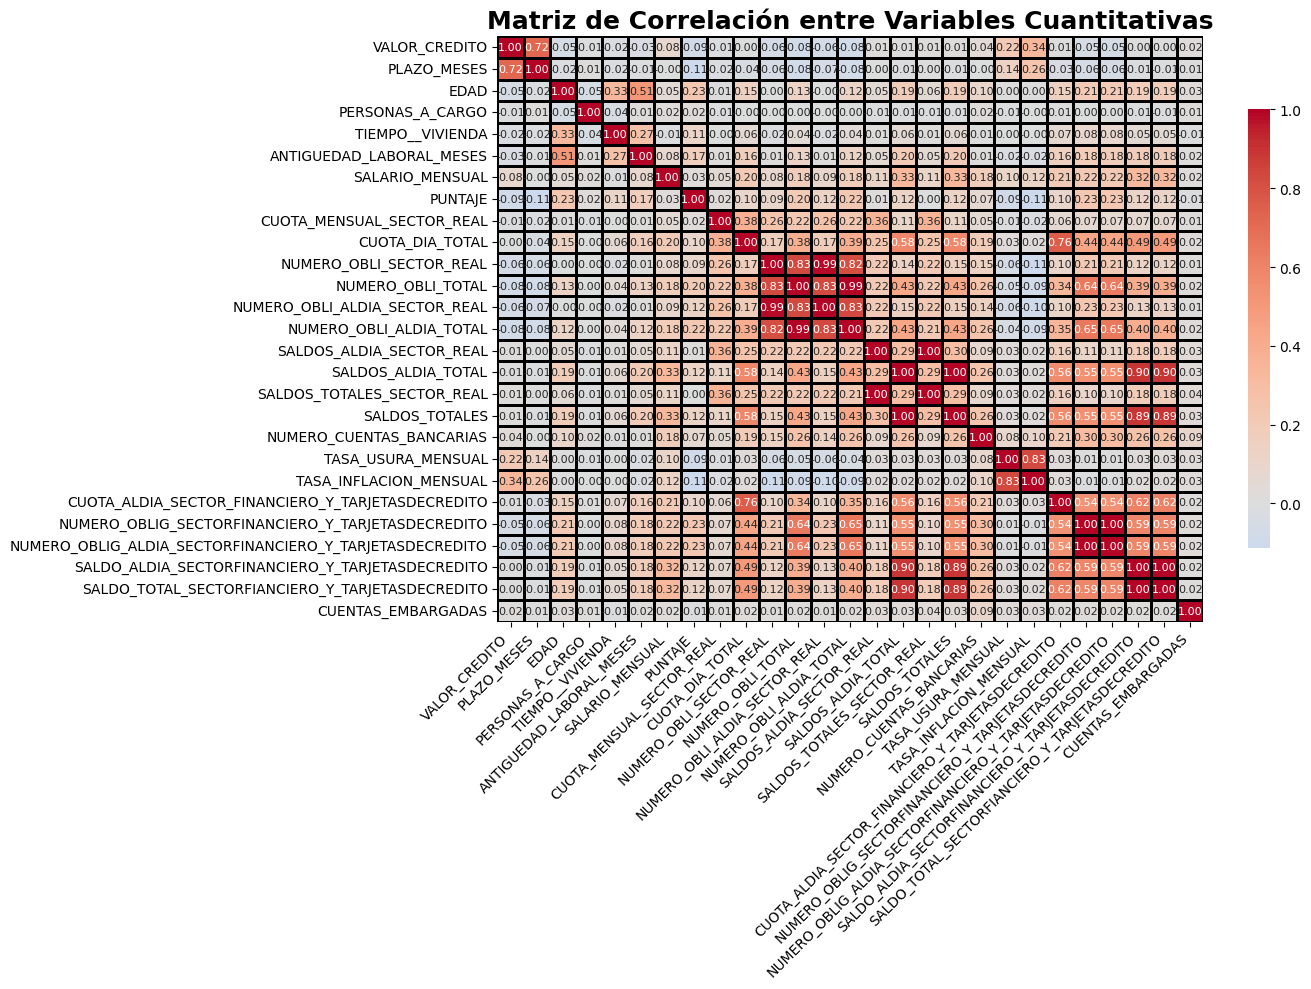

In [26]:
# Calcular la matriz de correlación de las variables numéricas (sin la variable 'COMPORTAMIENTO_PAGO' y 'ESTRATO')
correlation_matrix = variables_cuantitativas_sin_estrato.drop(columns=['COMPORTAMIENTO_PAGO'], errors='ignore').corr()

# Configuración del tamaño del gráfico
plt.figure(figsize=(14, 10))

# Crear el heatmap con una mejor paleta de colores
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0,
            linewidths=1, linecolor='black', annot_kws={"size": 8},
            cbar_kws={"shrink": .75}, fmt=".2f")

# Títulos y etiquetas
plt.title("Matriz de Correlación entre Variables Cuantitativas", fontsize=18, fontweight='bold')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajuste de las etiquetas del eje X
plt.yticks(fontsize=10)  # Ajuste de las etiquetas del eje Y
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Al observar la matriz de correlación se evidencia que:**

---

**Variables con Alta Correlación**


**Número de Obligaciones Totales y Número de Obligaciones al Día (sector real y total):** Estas variables están fuertemente correlacionadas entre sí (cercanas a 0.9 o superiores), lo que indica redundancia en la información. Podría ser útil eliminar una de ellas para evitar multicolinealidad.

**Saldos Totales y Saldos al Día:** También muestran alta correlación (>0.8), sugiriendo que estas variables aportan información similar. Podría considerarse eliminar una.

**Valor del Crédito y Plazo en Meses:** Aunque la correlación es moderada (0.7), indica que hay cierta relación entre el monto del crédito y la duración, por lo que se podría investigar más a fondo si ambas son necesarias.

---
**Variables con Baja o Nula Correlación**

**Variables como Personas a Cargo, Edad, Tipo de Vivienda, y Tasa de Usura Mensual:** presentan baja correlación con la mayoría de las otras variables, lo que sugiere que aportan información única al modelo y no generan redundancia.

**La eliminación de variables redundantes puede ser útil para reducir la dimensionalidad del modelo y mejorar su eficiencia, ya que variables muy correlacionadas entre sí pueden aportar información redundante en lugar de nueva. Sin embargo, en esta etapa del análisis, es preferible no eliminar ninguna variable. Mantener todas las variables permite contrastar mejor el desempeño de distintos modelos, lo cual es especialmente importante para identificar cuáles características realmente aportan valor predictivo. De esta forma, se puede evaluar de manera más completa la influencia de cada variable en el modelo, y evitar la eliminación prematura de alguna que, aunque parezca redundante, pueda tener interacciones importantes o efectos no lineales con otras variables.**

# **Prepación de los Datos: Originales, Estandarizados y Logarítmicos**

In [92]:
# Cargar el dataset
variables_cuantitativas2 = variables_cuantitativas.copy()

# Verificar la distribución de la variable objetivo
print(variables_cuantitativas2['COMPORTAMIENTO_PAGO'].value_counts(normalize=True))

COMPORTAMIENTO_PAGO
0    0.760004
1    0.239996
Name: proportion, dtype: float64


**Conclusión:**

Se evidencia que hay un desbalance significativo entre las clases:

Clase 0: 76%
Clase 1: 24%

Este desbalance puede afectar negativamente el rendimiento del modelo de regresión logística, ya que el modelo podría sesgarse hacia la clase mayoritaria. Para abordar este problema, es recomendable aplicar técnicas de balanceo de datos antes de entrenar el modelo.

**Validación de datos originales (sin estandarizar) :con modelo de regresión logística**

In [96]:
df_modelo = variables_cuantitativas.copy()

df_modelo['COMPORTAMIENTO_PAGO'] = variables_cuantitativas['COMPORTAMIENTO_PAGO']

# Convertir variables categóricas a variables dummy (indicadores binarios) si tienes alguna categórica
df_modelo_dummies = pd.get_dummies(df_modelo.drop(columns='COMPORTAMIENTO_PAGO', errors='ignore'), drop_first=True)

# Separar en variables independientes (X) y dependiente (y)
X = df_modelo_dummies
y = df_modelo['COMPORTAMIENTO_PAGO']

# Dividir en conjunto de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train, y_train)

# Obtener coeficientes y métricas de rendimiento del modelo
coeficientes = modelo.coef_[0]
columnas = X.columns
df_coeficientes = pd.DataFrame({
    'Variable': columnas,
    'Coeficiente': coeficientes,
    'Odds Ratio': np.exp(coeficientes)
}).sort_values(by='Coeficiente', ascending=False)

# Mostrar el DataFrame de coeficientes
print("\nCoeficientes del Modelo de Regresión Logística:")
print(df_coeficientes)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluación del modelo
auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print(f"\nAUC-ROC: {auc}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Coeficientes del Modelo de Regresión Logística:
                                             Variable   Coeficiente  \
20                             TASA_INFLACION_MENSUAL  1.682273e-04   
16                         SALDOS_TOTALES_SECTOR_REAL  1.609275e-04   
21  CUOTA_ALDIA_SECTOR_FINANCIERO_Y_TARJETASDECREDITO  9.468322e-05   
1                                         PLAZO_MESES  7.722602e-05   
8                           CUOTA_MENSUAL_SECTOR_REAL  6.571658e-05   
25    SALDO_TOTAL_SECTORFIANCIERO_Y_TARJETASDECREDITO  2.399736e-05   
15                                 SALDOS_ALDIA_TOTAL  8.807963e-06   
18                           NUMERO_CUENTAS_BANCARIAS  1.348542e-06   
0                                       VALOR_CREDITO  8.439435e-07   
19                                 TASA_USURA_MENSUAL  7.989779e-07   
26                                 CUENTAS_EMBARGADAS  5.122671e-07   
6                                     SALARIO_MENSUAL  1.406943e-09   
3                           

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Conclusión:**

Los resultados evidencian un fuerte desbalance en las clases, donde la mayoría de los datos pertenecen a la clase de puntuales. Este desbalance afecta la capacidad del modelo para identificar de manera efectiva a los morosos, ya que genera una alta tasa de falsos negativos y una baja sensibilidad hacia la clase de interés. Dado que el enfoque se centra en predecir morosos, es crucial balancear los datos.

Aplicar técnicas de reducción de resultados puntuales y ajustar el umbral de clasificación permitirán al modelo mejorar su precisión en la identificación de la clase minoritaria, optimizando la detección de morosos en el contexto del análisis.

# **Transformaciones de Datos**

# **Estandarización**

In [94]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from google.colab import files

# Paso 1: Crear un DataFrame con solo las variables cuantitativas y hacer una copia para no modificar los datos originales
variables_cuantitativas_df = base_clientes1[variables_cuantitativas_sin_estrato].copy()

# Paso 2: Estandarizar las variables cuantitativas
scaler = StandardScaler()
variables_cuantitativas_estandarizadas = scaler.fit_transform(variables_cuantitativas_df)

# Crear un DataFrame a partir de las variables estandarizadas
variables_cuantitativas_estandarizadas_df = pd.DataFrame(variables_cuantitativas_estandarizadas, columns=variables_cuantitativas_df.columns)

# Concatenar las variables estandarizadas y cualitativas en un solo DataFrame
df_estandarizado = pd.concat([variables_cuantitativas_estandarizadas_df, variables_cualitativas], axis=1)

# Guardar el DataFrame en un archivo Excel
output_file = '/content/variables_estandarizadas_y_cualitativas.xlsx'
df_estandarizado.to_excel(output_file, index=False)

# Descargar el archivo
files.download(output_file)

print("El archivo con las variables estandarizadas y cualitativas ha sido guardado y está disponible para descarga.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

El archivo con las variables estandarizadas y cualitativas ha sido guardado y está disponible para descarga.


# **Transformación Logarítmica**

In [95]:
import pandas as pd
import numpy as np
from google.colab import files

# Paso 1: Crear un DataFrame con solo las variables cuantitativas y hacer una copia para no modificar los datos originales
variables_cuantitativas_df = base_clientes1[variables_cuantitativas_sin_estrato].copy()

# Paso 2: Aplicar la transformación logarítmica a las variables cuantitativas
variables_cuantitativas_log = np.log1p(variables_cuantitativas_df)

# Crear un DataFrame a partir de las variables transformadas
variables_cuantitativas_log_df = pd.DataFrame(variables_cuantitativas_log, columns=variables_cuantitativas_df.columns)

# Concatenar las variables logarítmicas y cualitativas en un solo DataFrame
df_log = pd.concat([variables_cuantitativas_log_df, variables_cualitativas], axis=1)

# Guardar el DataFrame en un archivo Excel
output_file = '/content/variables_logaritmicas_y_cualitativas.xlsx'
df_log.to_excel(output_file, index=False)

# Descargar el archivo
files.download(output_file)

print("El archivo con las variables logarítmicas y cualitativas ha sido guardado y está disponible para descarga.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

El archivo con las variables logarítmicas y cualitativas ha sido guardado y está disponible para descarga.




---


# **Optimización de la Detección de Morosos: Reducción de Resultados mediante WOE y Balanceo de Datos**


---

# **WOE**

In [97]:
baseclientes2 = base_clientes1.copy()

In [98]:
variables_cuantitativas_sin_estrato = [var for var in variables_cuantitativas_sin_estrato if var != 'COMPORTAMIENTO_PAGO']

Puntos de corte para VALOR_CREDITO: [ 497019.   505247.   516020.   845659.5 1495221.  1867408.5 2000358.
 2116864.  2127770. ]


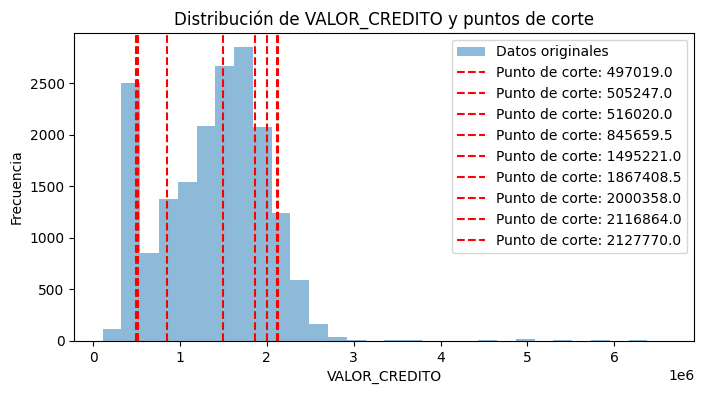

Puntos de corte para PLAZO_MESES: [ 4.5  6.5 10.5 11.5 12.5 13.5 15.5 18.5 42. ]


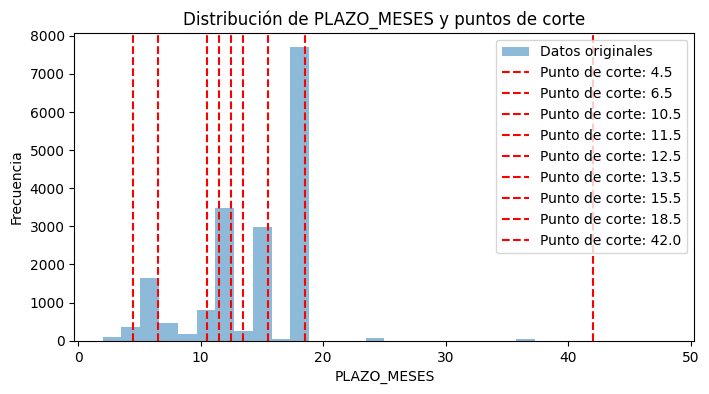

Puntos de corte para EDAD: [20.5 22.5 26.5 36.5 50.5 60.5 67.5 68.5 80.5]


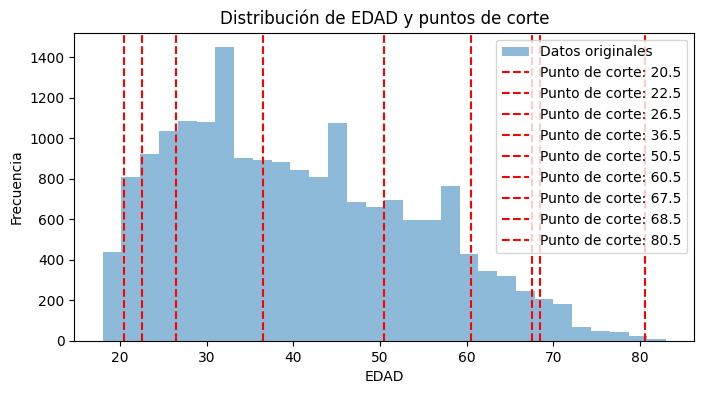

Puntos de corte para PERSONAS_A_CARGO: [0.5 1.5 2.5 3.5 4.5 5.5 6.5]


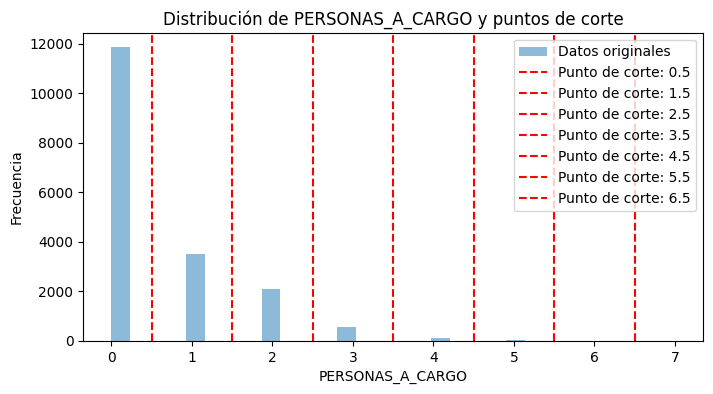

Puntos de corte para TIEMPO__VIVIENDA: [5.00e-01 9.50e+00 1.55e+01 1.75e+01 6.30e+01 3.61e+02 3.70e+02 5.02e+02
 8.58e+02]


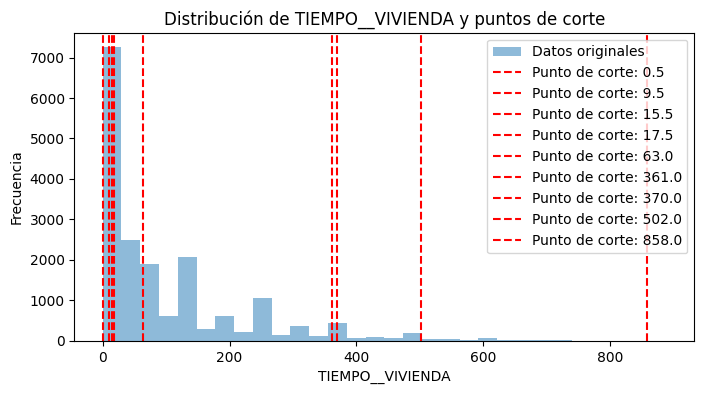

Puntos de corte para ANTIGUEDAD_LABORAL_MESES: [  4.5  17.5  52.5 131.5 132.5 170.5 177.5 488.5 489.5]


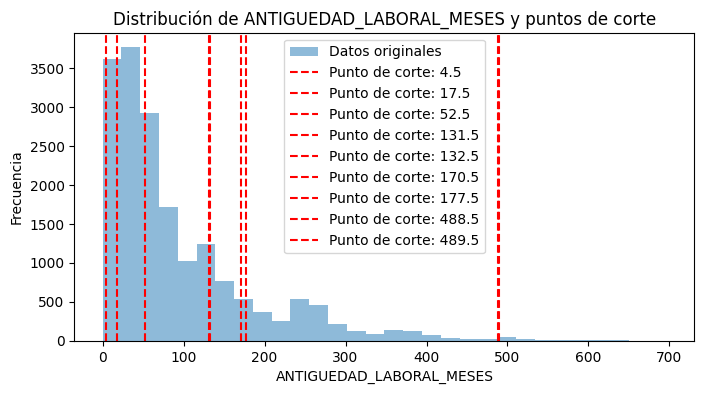

Puntos de corte para SALARIO_MENSUAL: [ 725000.   733850.   827650.   874374.5  877101.5  951000.   980828.5
 1000180.  1062571. ]


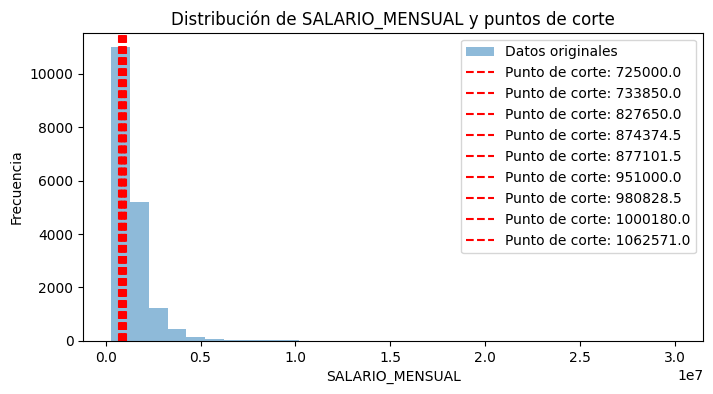

Puntos de corte para PUNTAJE: [  2.5 600.5 642.5 687.5 716.5 728.5 751.5 841.5 936. ]


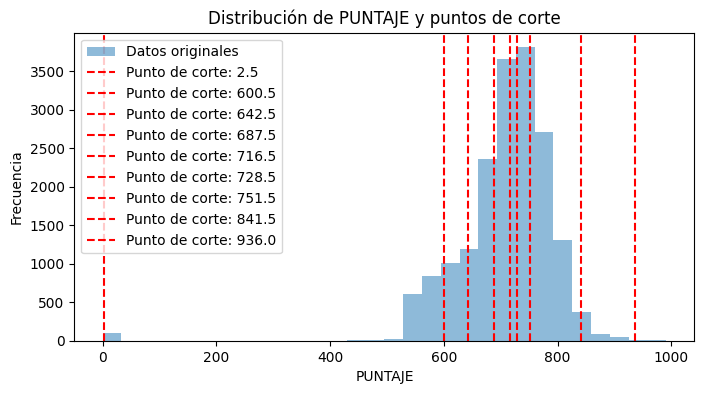

Puntos de corte para CUOTA_MENSUAL_SECTOR_REAL: [ 31.5 264.5 330.5 340.5 360.5 363.5 383.5 656.5 662. ]


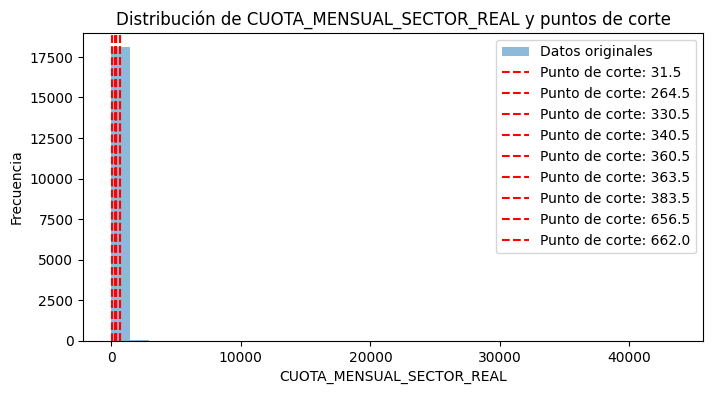

Puntos de corte para CUOTA_DIA_TOTAL: [  31.5   42.5   68.5   69.5   91.5  221.5 5094.5 5504.  5540.5]


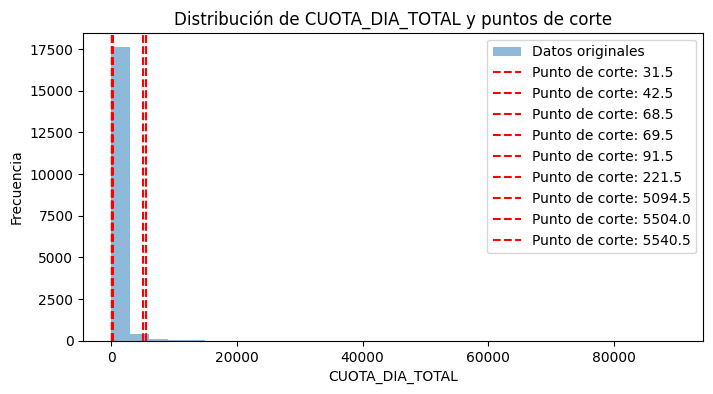

Puntos de corte para NUMERO_OBLI_SECTOR_REAL: [ 0.5  1.5  2.5  3.5  4.5  5.5 13.5 20.5 22.5]


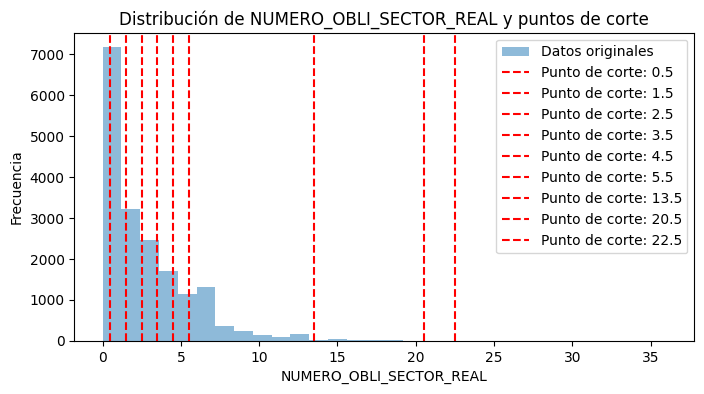

Puntos de corte para NUMERO_OBLI_TOTAL: [ 0.5  1.5  2.5  4.5  7.5 14.5 28.5 46.  53.5]


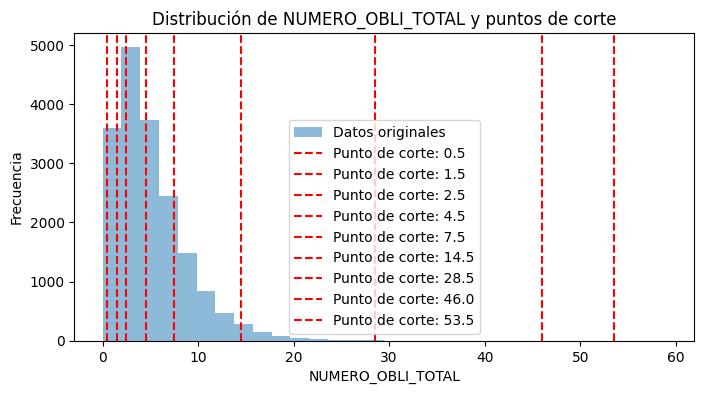

Puntos de corte para NUMERO_OBLI_ALDIA_SECTOR_REAL: [ 1.5  2.5  3.5  4.5  5.5  9.5 10.5 21.5 22.5]


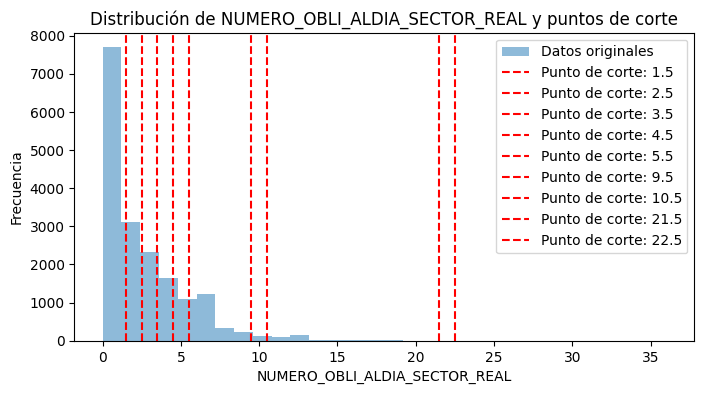

Puntos de corte para NUMERO_OBLI_ALDIA_TOTAL: [ 1.5  2.5  3.5  4.5  7.5 14.5 15.5 29.  46. ]


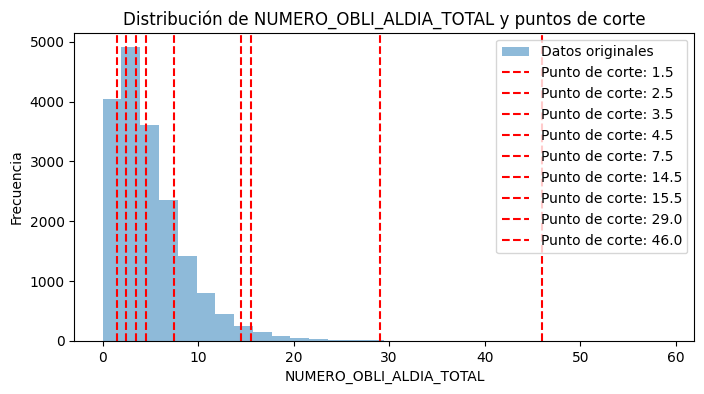

Puntos de corte para SALDOS_ALDIA_SECTOR_REAL: [1.5000e+00 1.0500e+01 8.5500e+01 3.5350e+02 3.9750e+02 3.1710e+03
 3.2615e+03 3.3825e+03 3.4725e+03]


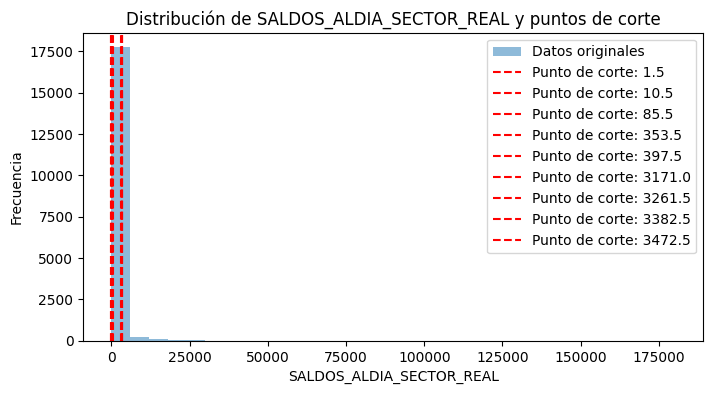

Puntos de corte para SALDOS_ALDIA_TOTAL: [ 109.5  110.5  717.5  866.5  874.5  946.5  949.  1503.5 1515.5]


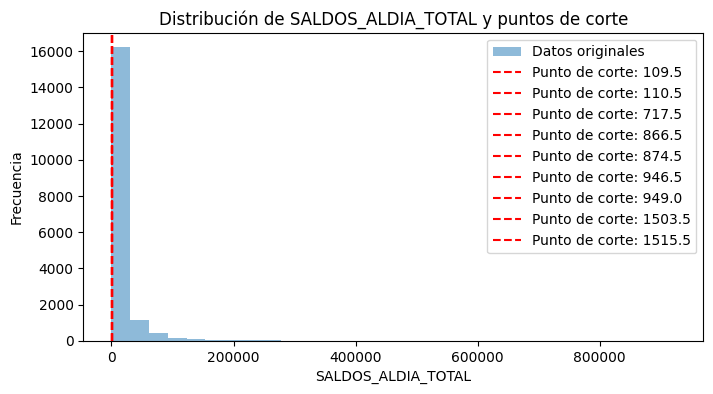

Puntos de corte para SALDOS_TOTALES_SECTOR_REAL: [3054.5 3070.5 3130.5 3133.5 3192.  3261.5 3382.5 3472.5 3715.5]


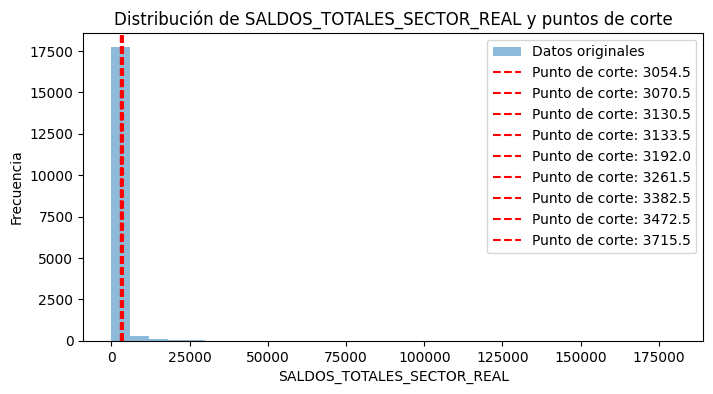

Puntos de corte para SALDOS_TOTALES: [  1347.5   1349.5   1355.5   5246.5   5251.5   5260.5   5359.  199810.5
 234761.5]


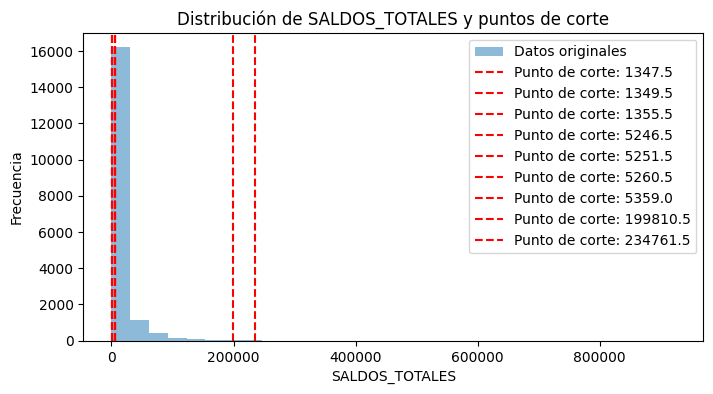

Puntos de corte para NUMERO_CUENTAS_BANCARIAS: [ 2.5  3.5  4.5  6.5  7.5  8.5  9.5 10.5 11.5]


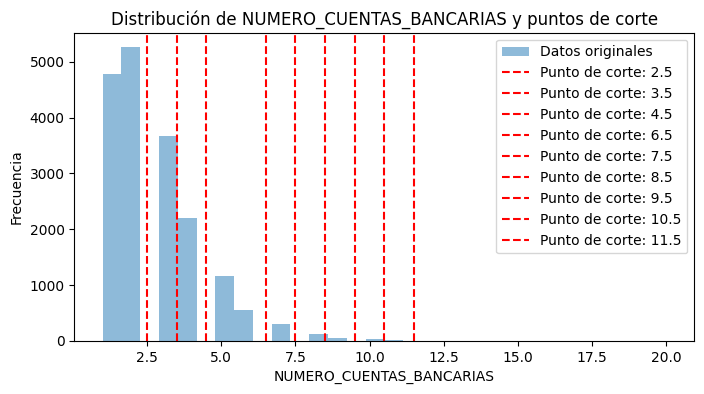

Puntos de corte para TASA_USURA_MENSUAL: [0.2594     0.26144999 0.26185    0.26625    0.27440003 0.27484997
 0.27614997 0.27869996 0.32620001]


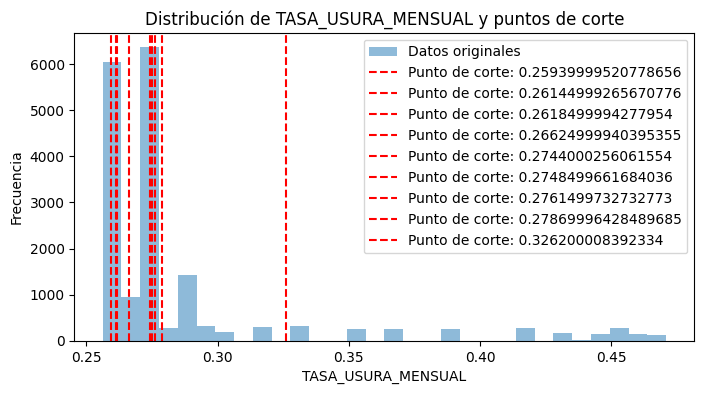

Puntos de corte para TASA_INFLACION_MENSUAL: [ 1.5         1.53499997  1.60500002  1.815       2.92999995  3.67500007
  8.26999998  8.79999971 10.5250001 ]


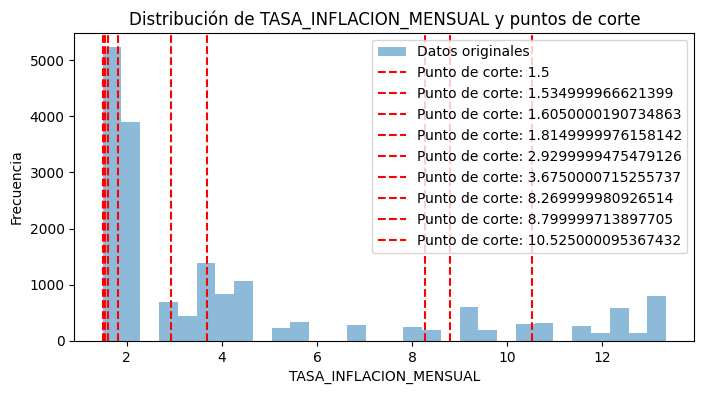

Puntos de corte para CUOTA_ALDIA_SECTOR_FINANCIERO_Y_TARJETASDECREDITO: [1.500e+00 6.750e+01 2.435e+02 2.445e+02 8.885e+02 8.905e+02 8.915e+02
 9.310e+02 5.104e+03]


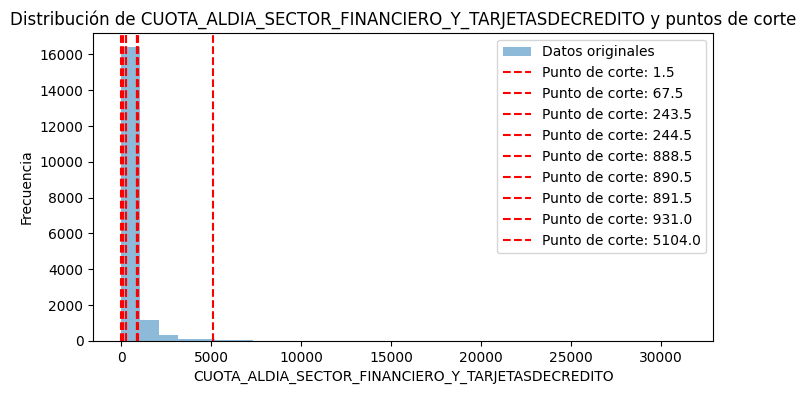

Puntos de corte para NUMERO_OBLIG_SECTORFINANCIERO_Y_TARJETASDECREDITO: [ 0.5  1.5  4.5  7.5 10.5 13.5 15.  18.  28. ]


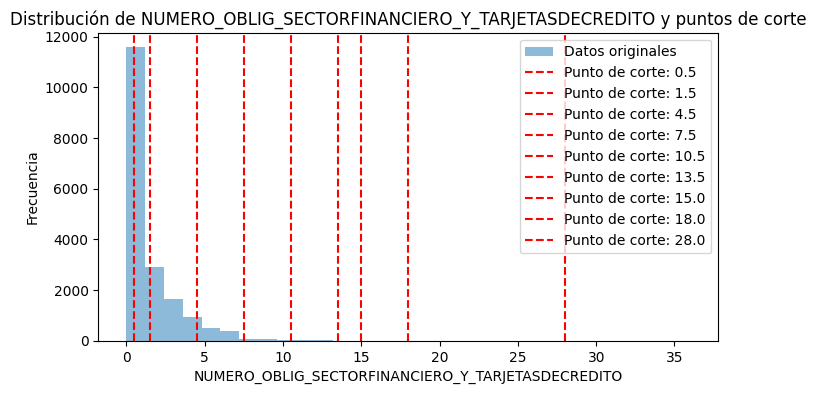

Puntos de corte para NUMERO_OBLIG_ALDIA_SECTORFINANCIERO_Y_TARJETASDECREDITO: [ 0.5  1.5  4.5  7.5 10.5 13.5 15.  18.  28. ]


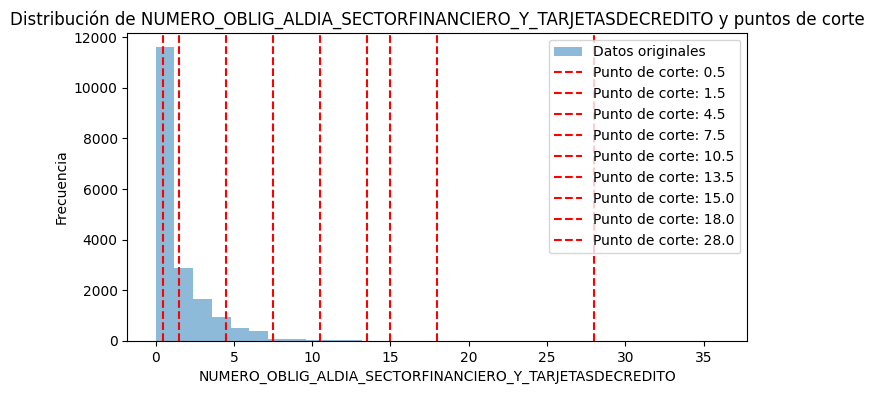

Puntos de corte para SALDO_ALDIA_SECTORFINANCIERO_Y_TARJETASDECREDITO: [1.500000e+00 9.750000e+01 1.256000e+03 1.273000e+03 1.315500e+03
 1.361500e+03 1.374500e+03 1.306705e+05 1.320230e+05]


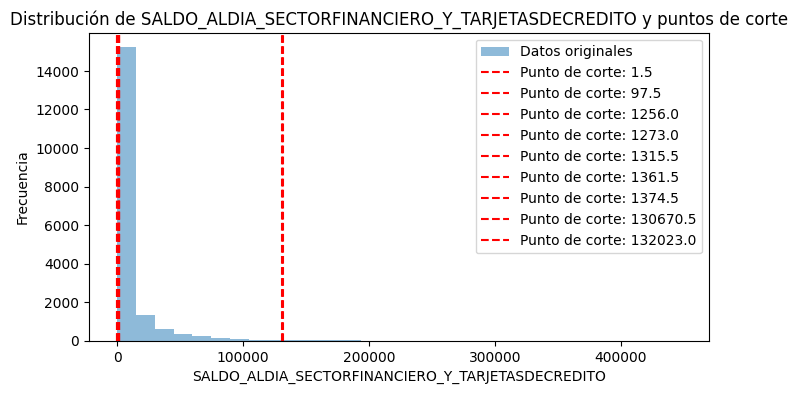

Puntos de corte para SALDO_TOTAL_SECTORFIANCIERO_Y_TARJETASDECREDITO: [1.500000e+00 9.750000e+01 1.256000e+03 1.273000e+03 1.315500e+03
 1.361500e+03 1.374500e+03 1.306705e+05 1.320230e+05]


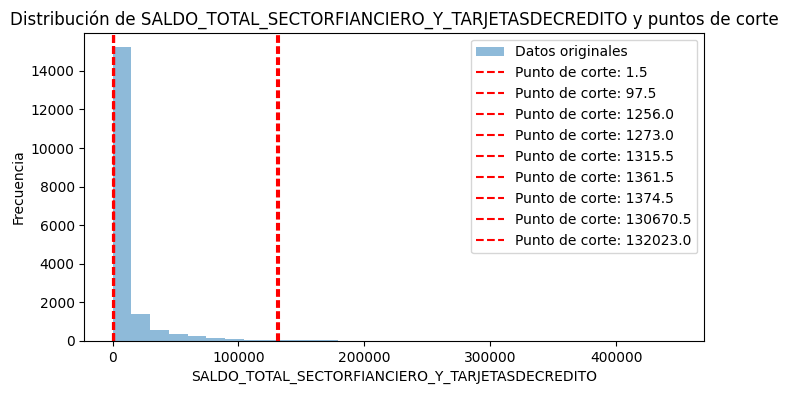

Puntos de corte para CUENTAS_EMBARGADAS: [0.5 1.5]


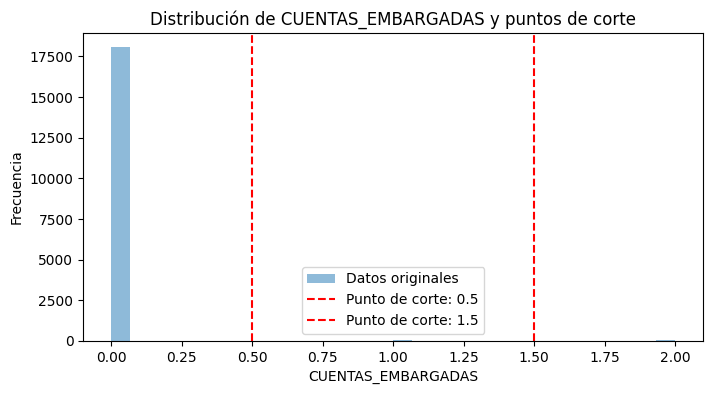

In [99]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

def crear_puntos_corte_por_variable(df, variables, target):
    """
    Función para crear puntos de corte a partir de árboles de decisión para cada variable numérica
    """
    puntos_corte_dict = {}

    for variable in variables:
        # Crear una copia del DataFrame con solo la variable numérica y la variable objetivo
        X = df[[variable]].values
        y = df[target].values

        # Crear el árbol de decisión para la variable actual
        tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=10)  # Ajustar el número de bins si es necesario
        tree.fit(X, y)

        # Obtener los puntos de corte del árbol de decisión
        thresholds = tree.tree_.threshold[tree.tree_.threshold != -2]  # -2 indica hojas del árbol
        puntos_corte = np.sort(thresholds)  # Ordenar los puntos de corte

        # Guardar los puntos de corte en un diccionario para cada variable
        puntos_corte_dict[variable] = puntos_corte

        print(f"Puntos de corte para {variable}: {puntos_corte}")

        # Graficar la variable y sus puntos de corte
        plt.figure(figsize=(8, 4))
        plt.hist(df[variable], bins=30, alpha=0.5, label='Datos originales')
        for corte in puntos_corte:
            plt.axvline(x=corte, color='red', linestyle='--', label=f'Punto de corte: {corte}')
        plt.legend()
        plt.title(f'Distribución de {variable} y puntos de corte')
        plt.xlabel(variable)
        plt.ylabel('Frecuencia')
        plt.show()

    return puntos_corte_dict

# Ejemplo de uso con tus objetos
puntos_corte_por_variable = crear_puntos_corte_por_variable(baseclientes2, variables_cuantitativas_sin_estrato, 'COMPORTAMIENTO_PAGO')

In [100]:
def dicotomizar_variables_con_limites(df, puntos_corte_dict):
    """
    Función para dicotomizar las variables en base a los puntos de corte obtenidos,
    creando etiquetas que indiquen los límites de cada rango.
    """
    for variable, puntos_corte in puntos_corte_dict.items():
        # Definir los límites de los bins (incluyendo -inf y inf)
        bins = [-np.inf] + list(puntos_corte) + [np.inf]

        # Crear etiquetas que identifiquen los rangos por sus límites
        labels = [f'{bins[i]} a {bins[i+1]}' for i in range(len(bins)-1)]

        # Crear una nueva columna dicotomizada para cada variable
        df[f'{variable}_dicotomizada'] = pd.cut(df[variable],
                                                bins=bins,
                                                labels=labels,
                                                right=False)

        # Mostrar cómo se ve la nueva columna con los límites
        print(f"Variable dicotomizada: {variable}_dicotomizada")
        print(df[[variable, f'{variable}_dicotomizada']].head())

    return df

# Aplicar la función para dicotomizar las variables en base a los puntos de corte obtenidos
df_dicotomizado = dicotomizar_variables_con_limites(baseclientes2, puntos_corte_por_variable)

Variable dicotomizada: VALOR_CREDITO_dicotomizada
   VALOR_CREDITO VALOR_CREDITO_dicotomizada
0         107756            -inf a 497019.0
1         109541            -inf a 497019.0
2         130650            -inf a 497019.0
3         151101            -inf a 497019.0
4         158539            -inf a 497019.0
Variable dicotomizada: PLAZO_MESES_dicotomizada
   PLAZO_MESES PLAZO_MESES_dicotomizada
0            9               6.5 a 10.5
1           12              11.5 a 12.5
2            4               -inf a 4.5
3            3               -inf a 4.5
4           12              11.5 a 12.5
Variable dicotomizada: EDAD_dicotomizada
   EDAD EDAD_dicotomizada
0    46       36.5 a 50.5
1    55       50.5 a 60.5
2    54       50.5 a 60.5
3    40       36.5 a 50.5
4    52       50.5 a 60.5
Variable dicotomizada: PERSONAS_A_CARGO_dicotomizada
   PERSONAS_A_CARGO PERSONAS_A_CARGO_dicotomizada
0                 0                    -inf a 0.5
1                 0                    -inf a 0.

In [101]:
def calcular_woe_iv(df, variable, target, epsilon=1e-6):
    """
    Función para calcular WOE e IV de una variable categórica o dicotomizada,
    considerando que en el target 1 representa "mora" y 0 "al día".
    Aplicamos smoothing para evitar división por cero.
    """
    # Crear una tabla de frecuencias para la variable categórica/dicotomizada y el target
    grupo = df.groupby(variable)[target].agg(['count', 'sum'])

    # La columna 'sum' será el número de casos "en mora" (1), y el resto serán "al día" (0)
    grupo['al_dia'] = grupo['count'] - grupo['sum']  # Cantidad de clientes "al día" (0)

    # Calcular la proporción de "en mora" (1) y "al día" (0), aplicando smoothing
    grupo['%mora'] = (grupo['sum'] + epsilon) / (grupo['sum'].sum() + epsilon)  # Proporción de "en mora"
    grupo['%al_dia'] = (grupo['al_dia'] + epsilon) / (grupo['al_dia'].sum() + epsilon)  # Proporción de "al día"

    # Calcular el WOE
    grupo['WOE'] = np.log(grupo['%al_dia'] / grupo['%mora'])

    # Calcular el IV
    grupo['IV'] = (grupo['%al_dia'] - grupo['%mora']) * grupo['WOE']

    # Sumar el IV total para la variable
    IV_total = grupo['IV'].sum()

    return IV_total

# Lista de variables categóricas (incluyendo dicotomizadas y categóricas originales como estado civil, nivel de estudios, etc.)
variables_categoricas = ['LINEA', 'SUBTIPO', 'SEXO','ESTADOCIVIL','ESTUDIOS','TIPO_VIVIENDA','DEPTO','TIPO_CONTRATO','ESTRATO','ESTADO_OBLIGACIONES', 'REGION','SUCURSAL'] + [f'{variable}_dicotomizada' for variable in variables_cuantitativas_sin_estrato]

# Aplicar el cálculo de WOE e IV a todas las variables categóricas
iv_totales = {}
for variable in variables_categoricas:
    iv_total = calcular_woe_iv(df_dicotomizado, variable, 'COMPORTAMIENTO_PAGO')
    iv_totales[variable] = iv_total

# Crear un DataFrame para mostrar los IV totales de cada variable
iv_totales_df = pd.DataFrame(list(iv_totales.items()), columns=['Variable', 'IV_total'])
iv_totales_df = iv_totales_df.sort_values(by='IV_total', ascending=False)

# Mostrar los resultados
print("\nInformation Value (IV) Totales por Variable:")
print(iv_totales_df)

# Opcional: guardar los resultados en un archivo CSV si lo necesitas
# iv_totales_df.to_csv('iv_totales.csv', index=False)


Information Value (IV) Totales por Variable:
                                             Variable  IV_total
13                           PLAZO_MESES_dicotomizada  0.506864
32                TASA_INFLACION_MENSUAL_dicotomizada  0.491069
31                    TASA_USURA_MENSUAL_dicotomizada  0.484753
12                         VALOR_CREDITO_dicotomizada  0.441261
1                                             SUBTIPO  0.334843
19                               PUNTAJE_dicotomizada  0.327966
0                                               LINEA  0.320049
11                                           SUCURSAL  0.101718
21                       CUOTA_DIA_TOTAL_dicotomizada  0.097315
27                    SALDOS_ALDIA_TOTAL_dicotomizada  0.092813
14                                  EDAD_dicotomizada  0.086381
17              ANTIGUEDAD_LABORAL_MESES_dicotomizada  0.085742
18                       SALARIO_MENSUAL_dicotomizada  0.084114
37  SALDO_TOTAL_SECTORFIANCIERO_Y_TARJETASDECREDIT...  0.0

<ipython-input-101-505d832e7eea>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-101-505d832e7eea>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-101-505d832e7eea>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

<ipython-input-101-505d832e7eea>:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to 

**Conclusión:**

Interpretación General del IV

IV Alto (0.3 - 0.5 o mayor): Variables con un poder predictivo fuerte.

IV Moderado (0.1 - 0.3): Variables con un poder predictivo moderado.

IV Bajo (< 0.1): Variables con un poder predictivo débil o insignificante.

**Las variables altamente predictivas son PLAZO_MESES_dicotomizada,TASA_INFLACION_MENSUAL, TASA_USURA_MENSUAL, VALOR_CREDITO, SUBTIPO, y PUNTAJE las cuáles son consideradas esenciales para el modelo de predicción, dado su alto IV.**

# **Modelo de Regresión Logística con datos balanceados: Submuestreo de la clase mayoritaria**

Eliminan aleatoriamente ejemplos de la clase mayoritaria para igualar el número de observaciones en la clase minoritaria.

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Crear un DataFrame a partir de las variables cuantitativas
df_modelo = variables_cuantitativas.copy()

# Agregar la variable objetivo
df_modelo['COMPORTAMIENTO_PAGO'] = variables_cuantitativas['COMPORTAMIENTO_PAGO']

# Convertir variables categóricas a dummies
df_modelo_dummies = pd.get_dummies(df_modelo.drop(columns='COMPORTAMIENTO_PAGO', errors='ignore'), drop_first=True)

# Separar en variables independientes (X) y dependiente (y)
X = df_modelo_dummies
y = df_modelo['COMPORTAMIENTO_PAGO']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar submuestreo de la clase mayoritaria para balancear los datos de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Ajustar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_res, y_train_res)

# Obtener los coeficientes del modelo
coeficientes = modelo.coef_[0]
columnas = X.columns
df_coeficientes = pd.DataFrame({
    'Variable': columnas,
    'Coeficiente': coeficientes,
    'Odds Ratio': np.exp(coeficientes)
}).sort_values(by='Coeficiente', ascending=False)

# Mostrar el DataFrame de coeficientes
print("\nCoeficientes del Modelo de Regresión Logística:")
print(df_coeficientes)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluación del modelo
auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print(f"\nAUC-ROC: {auc}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Coeficientes del Modelo de Regresión Logística:
                                             Variable   Coeficiente  \
16                         SALDOS_TOTALES_SECTOR_REAL  2.485863e-04   
20                             TASA_INFLACION_MENSUAL  1.129462e-04   
24   SALDO_ALDIA_SECTORFINANCIERO_Y_TARJETASDECREDITO  7.759699e-05   
1                                         PLAZO_MESES  6.863467e-05   
9                                     CUOTA_DIA_TOTAL  5.418134e-05   
17                                     SALDOS_TOTALES  2.136786e-05   
18                           NUMERO_CUENTAS_BANCARIAS  3.188699e-06   
0                                       VALOR_CREDITO  1.004152e-06   
19                                 TASA_USURA_MENSUAL  8.485776e-07   
26                                 CUENTAS_EMBARGADAS  4.621161e-07   
6                                     SALARIO_MENSUAL  2.574245e-08   
3                                    PERSONAS_A_CARGO -3.540068e-06   
23  NUMERO_OBLIG_ALDIA_SECTO

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Conclusión:**

Con los datos balanceados, aunque el AUC-ROC disminuye ligeramente de 0.6903 a 0.6772 y la precisión general (Accuracy) baja de 76.63% a 61.37%, se observa una mejora notable en la detección de morosos. El número de verdaderos positivos aumenta significativamente de 13 a 555, mientras que los falsos negativos disminuyen de 829 a 287. Esto indica que el modelo es ahora más efectivo en identificar a los morosos, lo cual es crucial dado tu enfoque en esta clase.

La disminución en precisión general y AUC-ROC es común en modelos balanceados, ya que el balanceo suele aumentar los falsos positivos, pero se obtiene una mejora en la sensibilidad hacia la clase de interés (morosos). Esto es especialmente útil para aplicaciones donde identificar casos de morosidad es prioritario, aunque implique una leve reducción en la especificidad.

---

# **Optimización del Modelo de Detección de Morosos**


---



# **1. Ajuste a umbral según resultados WOE - IV Moderado 0.1**

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Definir el umbral para IV significativo
umbral_iv = 0.1

# Filtrar las variables con IV mayor al umbral
variables_predictivas = iv_totales_df[iv_totales_df['IV_total'] > umbral_iv]['Variable'].tolist()

# Crear el DataFrame basado en las variables predictivas seleccionadas
df_modelo = df_dicotomizado[variables_predictivas].copy()

# Agregar la variable objetivo
df_modelo['COMPORTAMIENTO_PAGO'] = df_dicotomizado['COMPORTAMIENTO_PAGO']

# Convertir variables categóricas a dummies
df_modelo_dummies = pd.get_dummies(df_modelo.drop(columns='COMPORTAMIENTO_PAGO'), drop_first=True)

# Separar en variables independientes (X) y dependiente (y)
X = df_modelo_dummies
y = df_modelo['COMPORTAMIENTO_PAGO']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar submuestreo de la clase mayoritaria para balancear los datos de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Ajustar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_res, y_train_res)

# Obtener los coeficientes del modelo
coeficientes = modelo.coef_[0]
columnas = X.columns
df_coeficientes = pd.DataFrame({
    'Variable': columnas,
    'Coeficiente': coeficientes,
    'Odds Ratio': np.exp(coeficientes)
}).sort_values(by='Coeficiente', ascending=False)

# Mostrar el DataFrame de coeficientes
print("\nCoeficientes del Modelo de Regresión Logística:")
print(df_coeficientes)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluación del modelo
auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print(f"\nAUC-ROC: {auc}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Coeficientes del Modelo de Regresión Logística:
                                Variable  Coeficiente  Odds Ratio
6   PLAZO_MESES_dicotomizada_15.5 a 18.5     1.475514    4.373283
5   PLAZO_MESES_dicotomizada_13.5 a 15.5     1.251160    3.494396
7   PLAZO_MESES_dicotomizada_18.5 a 42.0     1.232894    3.431145
4   PLAZO_MESES_dicotomizada_12.5 a 13.5     1.127570    3.088143
72                      SUCURSAL_COROZAL     1.069581    2.914157
..                                   ...          ...         ...
47    PUNTAJE_dicotomizada_841.5 a 936.0    -0.698350    0.497405
46    PUNTAJE_dicotomizada_751.5 a 841.5    -0.760637    0.467369
36                      SUBTIPO_RECOMPRA    -0.949906    0.386778
37                     SUBTIPO_RETANQUEO    -1.101796    0.332274
48      PUNTAJE_dicotomizada_936.0 a inf    -1.369318    0.254280

[99 rows x 3 columns]

AUC-ROC: 0.78239932260998
Accuracy: 0.68724166437035
Confusion Matrix:
[[1867  920]
 [ 215  627]]


**Conclusión**

AUC-ROC (0.782): Indica un rendimiento adecuado en la diferenciación entre morosos y no morosos, aunque no es óptimo para maximizar la detección de morosos.

Accuracy (68.72%): La precisión general es moderada, pero no proporciona una evaluación completa en el contexto de morosidad.

Matriz de Confusión:

Falsos Positivos (920): Se mantiene un nivel significativo de falsos positivos, lo que afecta la precisión en la identificación de clientes puntuales.
Falsos Negativos (215): Aunque relativamente bajo, el número de morosos no detectados aún es notable.

**Este modelo, aunque balanceado, no maximiza la detección de morosos como se requiere para el objetivo. Para mejorar, se ajustará el umbral de clasificación.**

# **2. Ajuste a umbral según resultados WOE - IV Alto 0.3**

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Definir el umbral para IV significativo
umbral_iv = 0.3

# Filtrar las variables con IV mayor al umbral
variables_predictivas = iv_totales_df[iv_totales_df['IV_total'] > umbral_iv]['Variable'].tolist()

# Crear el DataFrame basado en las variables predictivas seleccionadas
df_modelo = df_dicotomizado[variables_predictivas].copy()

# Agregar la variable objetivo
df_modelo['COMPORTAMIENTO_PAGO'] = df_dicotomizado['COMPORTAMIENTO_PAGO']

# Convertir variables categóricas a dummies
df_modelo_dummies = pd.get_dummies(df_modelo.drop(columns='COMPORTAMIENTO_PAGO'), drop_first=True)

# Separar en variables independientes (X) y dependiente (y)
X = df_modelo_dummies
y = df_modelo['COMPORTAMIENTO_PAGO']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar submuestreo de la clase mayoritaria para balancear los datos de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Ajustar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_res, y_train_res)

# Obtener los coeficientes del modelo
coeficientes = modelo.coef_[0]
columnas = X.columns
df_coeficientes = pd.DataFrame({
    'Variable': columnas,
    'Coeficiente': coeficientes,
    'Odds Ratio': np.exp(coeficientes)
}).sort_values(by='Coeficiente', ascending=False)

# Mostrar el DataFrame de coeficientes
print("\nCoeficientes del Modelo de Regresión Logística:")
print(df_coeficientes)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluación del modelo
auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print(f"\nAUC-ROC: {auc}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Coeficientes del Modelo de Regresión Logística:
                                             Variable  Coeficiente  Odds Ratio
6                PLAZO_MESES_dicotomizada_15.5 a 18.5     1.561242    4.764737
7                PLAZO_MESES_dicotomizada_18.5 a 42.0     1.352651    3.867664
5                PLAZO_MESES_dicotomizada_13.5 a 15.5     1.286113    3.618693
4                PLAZO_MESES_dicotomizada_12.5 a 13.5     1.200602    3.322117
3                PLAZO_MESES_dicotomizada_11.5 a 12.5     0.950342    2.586594
..                                                ...          ...         ...
23  TASA_USURA_MENSUAL_dicotomizada_0.274849966168...    -0.664923    0.514313
46                 PUNTAJE_dicotomizada_751.5 a 841.5    -0.739788    0.477215
36                                   SUBTIPO_RECOMPRA    -0.950624    0.386500
37                                  SUBTIPO_RETANQUEO    -1.140554    0.319642
48                   PUNTAJE_dicotomizada_936.0 a inf    -1.457218    0.232883

[6

**Conclusión:**

El modelo presenta un AUC-ROC de 0.779, lo que indica una buena capacidad de discriminación entre morosos y no morosos. La Accuracy de 69.08% refleja un rendimiento sólido en términos generales, mientras que la matriz de confusión muestra un balance razonable entre detección de morosos y falsos positivos:

Verdaderos Negativos: 1878

Falsos Positivos: 909

Falsos Negativos: 213

Verdaderos Positivos: 629

**Este modelo logra un equilibrio efectivo, proporcionando una detección de morosos adecuada (629 verdaderos positivos) y manteniendo una buena precisión general, aunque con una moderada tasa de falsos positivos.**



---

**El Modelo 2 (WOE - IV Alto 0.3) es preferible según los objetivos planteados, ya que proporciona una precisión ligeramente mejor y reduce marginalmente los falsos negativos, lo cual es beneficioso para maximizar la detección de morosos.**


---



# **Revisión de umbral según resultados WOE - IV de 0.1 a 0.5**

Para ajustar el umbral de clasificación en el modelo, se realizará un análisis de la sensibilidad y especificidad a diferentes umbrales.


Resultados por Umbral de Clasificación (0.1 a 0.5):
   Umbral  Sensibilidad (Recall)  Especificidad  Accuracy
0    0.10               1.000000       0.126301  0.329016
1    0.15               0.992874       0.194833  0.379994
2    0.20               0.980998       0.262289  0.429044
3    0.25               0.957245       0.333692  0.478369
4    0.30               0.926366       0.403301  0.524662
5    0.35               0.899050       0.473628  0.572334
6    0.40               0.869359       0.541084  0.617250
7    0.45               0.813539       0.610693  0.657757
8    0.50               0.747031       0.673843  0.690824


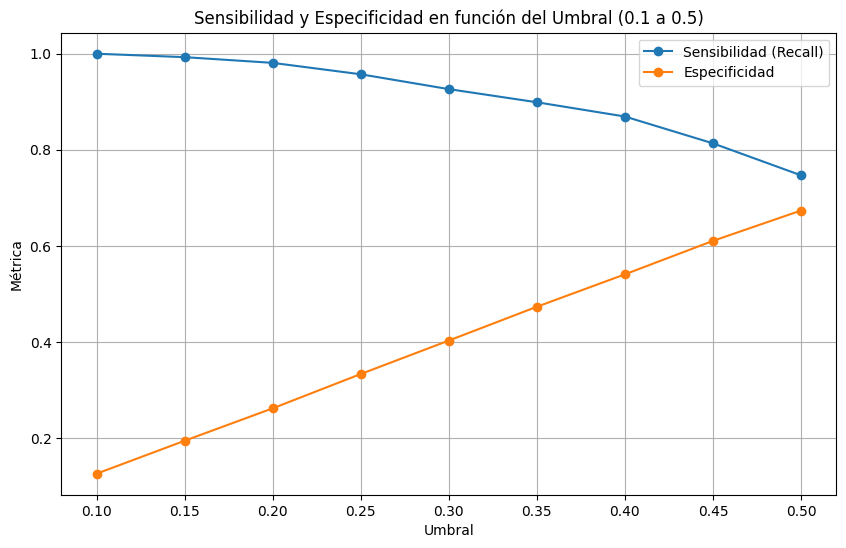

In [113]:
import numpy as np
import pandas as pd
from sklearn.metrics import recall_score, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Obtener probabilidades de predicción en el conjunto de prueba
y_prob_test = modelo.predict_proba(X_test)[:, 1]

# Definir un rango de umbrales de 0.1 a 0.5 en incrementos de 0.05
umbrales = np.arange(0.1, 0.51, 0.05)
resultados = []

# Evaluar el modelo en cada umbral dentro del rango deseado
for umbral in umbrales:
    y_pred_umbral = (y_prob_test >= umbral).astype(int)

    # Calcular sensibilidad, especificidad y accuracy
    sensibilidad = recall_score(y_test, y_pred_umbral)
    matriz_confusion = confusion_matrix(y_test, y_pred_umbral)
    especificidad = matriz_confusion[0, 0] / (matriz_confusion[0, 0] + matriz_confusion[0, 1])
    accuracy = accuracy_score(y_test, y_pred_umbral)

    # Guardar resultados en el DataFrame
    resultados.append({
        'Umbral': umbral,
        'Sensibilidad (Recall)': sensibilidad,
        'Especificidad': especificidad,
        'Accuracy': accuracy
    })

# Crear un DataFrame para visualizar resultados
df_resultados = pd.DataFrame(resultados)

# Mostrar resultados por umbral
print("\nResultados por Umbral de Clasificación (0.1 a 0.5):")
print(df_resultados)

# Visualización gráfica
plt.figure(figsize=(10, 6))
plt.plot(df_resultados['Umbral'], df_resultados['Sensibilidad (Recall)'], label="Sensibilidad (Recall)", marker='o')
plt.plot(df_resultados['Umbral'], df_resultados['Especificidad'], label="Especificidad", marker='o')
plt.xlabel("Umbral")
plt.ylabel("Métrica")
plt.title("Sensibilidad y Especificidad en función del Umbral (0.1 a 0.5)")
plt.legend()
plt.grid(True)
plt.show()

**Conclusión:**

Umbrales bajos (0.1 - 0.3): Alta sensibilidad (100% a 92.6%), lo que maximiza la detección de morosos, pero con baja especificidad (12.6% a 40.3%), generando muchos falsos positivos.

Umbral intermedio (0.4): Logra un balance entre sensibilidad (86.9%) y especificidad (54.1%), con una precisión de 61.7%.

Umbral alto (0.5): Mayor especificidad (67.4%) y precisión (69.1%), aunque con una sensibilidad reducida (74.7%).

**El umbral de 0.4 ofrece un buen balance entre detectar morosos y reducir falsos positivos.**

# **3. Ajuste a umbral según resultados WOE - IV de 0.4**

In [114]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Definir el umbral para IV significativo
umbral_iv = 0.4

# Filtrar las variables con IV mayor al umbral
variables_predictivas = iv_totales_df[iv_totales_df['IV_total'] > umbral_iv]['Variable'].tolist()

# Crear el DataFrame basado en las variables predictivas seleccionadas
df_modelo = df_dicotomizado[variables_predictivas].copy()

# Agregar la variable objetivo
df_modelo['COMPORTAMIENTO_PAGO'] = df_dicotomizado['COMPORTAMIENTO_PAGO']

# Convertir variables categóricas a dummies
df_modelo_dummies = pd.get_dummies(df_modelo.drop(columns='COMPORTAMIENTO_PAGO'), drop_first=True)

# Separar en variables independientes (X) y dependiente (y)
X = df_modelo_dummies
y = df_modelo['COMPORTAMIENTO_PAGO']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar submuestreo de la clase mayoritaria para balancear los datos de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Ajustar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_res, y_train_res)

# Obtener los coeficientes del modelo
coeficientes = modelo.coef_[0]
columnas = X.columns
df_coeficientes = pd.DataFrame({
    'Variable': columnas,
    'Coeficiente': coeficientes,
    'Odds Ratio': np.exp(coeficientes)
}).sort_values(by='Coeficiente', ascending=False)

# Mostrar el DataFrame de coeficientes
print("\nCoeficientes del Modelo de Regresión Logística:")
print(df_coeficientes)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluación del modelo
auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print(f"\nAUC-ROC: {auc}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Coeficientes del Modelo de Regresión Logística:
                                             Variable  Coeficiente  Odds Ratio
7                PLAZO_MESES_dicotomizada_18.5 a 42.0     1.826866    6.214382
6                PLAZO_MESES_dicotomizada_15.5 a 18.5     1.594248    4.924625
4                PLAZO_MESES_dicotomizada_12.5 a 13.5     1.349301    3.854731
5                PLAZO_MESES_dicotomizada_13.5 a 15.5     1.302204    3.677394
3                PLAZO_MESES_dicotomizada_11.5 a 12.5     1.057333    2.878684
15  TASA_INFLACION_MENSUAL_dicotomizada_8.26999998...     1.036781    2.820123
24  TASA_USURA_MENSUAL_dicotomizada_0.276149973273...     1.036781    2.820123
34   VALOR_CREDITO_dicotomizada_2116864.0 a 2127770.0     1.021795    2.778177
10  TASA_INFLACION_MENSUAL_dicotomizada_1.53499996...     0.856310    2.354457
17  TASA_INFLACION_MENSUAL_dicotomizada_10.5250000...     0.828838    2.290656
26  TASA_USURA_MENSUAL_dicotomizada_0.326200008392...     0.828838    2.290656
14 

**Conclusión:**

**Si bien, el umbral de 0.4 resultó tener un mejor balanceo en el ajuste de umbrales dentro del rango 0.1 a 0.5, un IV alto (0.4) no produjo el mismo rendimiento general debido a una selección más estricta de variables predictivas.**



---
**En resumen: El Ajuste con IV de 0.3 es la mejor opción, con alta precisión (Accuracy de 69.1%), un buen AUC-ROC (0.7790) y un balance óptimo en la matriz de confusión, logrando una alta detección de morosos y manteniendo los falsos negativos controlados.**

---




# **4. Ajuste a umbral según resultados WOE - IV Alto 0.3 + Variables destacadas EDA.**

El ajuste al umbral se realiza con base en los resultados del análisis Weight of Evidence (WOE) y el Information Value (IV), enfocándose en las variables con un IV alto (mayor a 0.3), lo cual refleja su importancia en la predicción del comportamiento de los clientes. Además, se consideran las variables destacadas del análisis exploratorio de datos (EDA), con el objetivo de optimizar la capacidad del modelo para identificar morosos de manera más precisa y efectiva.

In [117]:
# Filtrar las variables con IV mayor al umbral y crear una lista
umbral_iv = 0.3
variables_predictivas = iv_totales_df[iv_totales_df['IV_total'] > umbral_iv]['Variable'].tolist()

# Visualización como DataFrame
df_variables_predictivas = pd.DataFrame(variables_predictivas, columns=['Variable'])
print("Variables con IV mayor a 0.3:")
print(df_variables_predictivas)

# Opcional: Guardar en un archivo CSV para consulta completa fuera del entorno
df_variables_predictivas.to_csv('variables_con_iv_mayor_0_3.csv', index=False)
print("Archivo 'variables_con_iv_mayor_0_3.csv' guardado con éxito.")

Variables con IV mayor a 0.3:
                              Variable
0             PLAZO_MESES_dicotomizada
1  TASA_INFLACION_MENSUAL_dicotomizada
2      TASA_USURA_MENSUAL_dicotomizada
3           VALOR_CREDITO_dicotomizada
4                              SUBTIPO
5                 PUNTAJE_dicotomizada
6                                LINEA
Archivo 'variables_con_iv_mayor_0_3.csv' guardado con éxito.


In [118]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Definir el umbral para IV significativo
umbral_iv = 0.3

# Filtrar las variables con IV mayor al umbral
variables_iv_altas = iv_totales_df[iv_totales_df['IV_total'] > umbral_iv]['Variable'].tolist()

# Lista de variables adicionales identificadas en el EDA
variables_eda = ['SUBTIPO', 'REGION', 'TIPO_VIVIENDA', 'ESTADO_OBLIGACIONES', 'NUMERO_OBLI_TOTAL', 'EDAD']

# Combinar ambas listas, eliminando duplicados
variables_predictivas = list(set(variables_iv_altas + variables_eda))

# Crear el DataFrame basado en las variables predictivas seleccionadas
df_modelo = df_dicotomizado[variables_predictivas].copy()

# Agregar la variable objetivo
df_modelo['COMPORTAMIENTO_PAGO'] = df_dicotomizado['COMPORTAMIENTO_PAGO']

# Convertir variables categóricas a dummies
df_modelo_dummies = pd.get_dummies(df_modelo.drop(columns='COMPORTAMIENTO_PAGO'), drop_first=True)

# Separar en variables independientes (X) y dependiente (y)
X = df_modelo_dummies
y = df_modelo['COMPORTAMIENTO_PAGO']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar submuestreo de la clase mayoritaria para balancear los datos de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Ajustar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_res, y_train_res)

# Obtener los coeficientes del modelo
coeficientes = modelo.coef_[0]
columnas = X.columns
df_coeficientes = pd.DataFrame({
    'Variable': columnas,
    'Coeficiente': coeficientes,
    'Odds Ratio': np.exp(coeficientes)
}).sort_values(by='Coeficiente', ascending=False)

# Mostrar el DataFrame de coeficientes
print("\nCoeficientes del Modelo de Regresión Logística:")
print(df_coeficientes)

# Realizar predicciones y evaluar el modelo
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluación del modelo
auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar resultados
print(f"\nAUC-ROC: {auc}")
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Coeficientes del Modelo de Regresión Logística:
                                             Variable  Coeficiente  Odds Ratio
40               PLAZO_MESES_dicotomizada_15.5 a 18.5     1.515527    4.551817
41               PLAZO_MESES_dicotomizada_18.5 a 42.0     1.407528    4.085842
39               PLAZO_MESES_dicotomizada_13.5 a 15.5     1.282295    3.604904
38               PLAZO_MESES_dicotomizada_12.5 a 13.5     1.273004    3.571566
37               PLAZO_MESES_dicotomizada_11.5 a 12.5     0.975081    2.651382
..                                                ...          ...         ...
68  TASA_USURA_MENSUAL_dicotomizada_0.274849966168...    -0.604319    0.546447
60                 PUNTAJE_dicotomizada_751.5 a 841.5    -0.650513    0.521778
72                                   SUBTIPO_RECOMPRA    -0.928439    0.395170
73                                  SUBTIPO_RETANQUEO    -1.110691    0.329331
62                   PUNTAJE_dicotomizada_936.0 a inf    -1.293008    0.274444

[7



---
**Conclusión:**

AUC-ROC: El ajuste que incluye tanto IV alto como las variables destacadas en el EDA tiene un AUC-ROC ligeramente superior (0.7849 frente a 0.7790), lo que sugiere que este modelo es algo mejor en la discriminación entre morosos y no morosos.

Accuracy: Aunque el modelo que incorpora variables EDA tiene una precisión levemente inferior (0.6897 frente a 0.6908), la diferencia es mínima.
Matriz de Confusión: Ambos modelos presentan resultados similares en la clasificación de morosos y no morosos, con diferencias muy pequeñas en falsos positivos y falsos negativos.

**El ajuste que incorpora tanto IV alto como variables del EDA es ligeramente mejor en términos de AUC-ROC y, por lo tanto, en la capacidad de diferenciación entre clases. Aunque la accuracy es casi igual, el modelo con variables adicionales del EDA muestra una ventaja leve.**

---

# **Optimización de Hiperparámetros**

In [119]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

# Definir el umbral para IV significativo
umbral_iv = 0.3

# Filtrar las variables con IV mayor al umbral
variables_iv_altas = iv_totales_df[iv_totales_df['IV_total'] > umbral_iv]['Variable'].tolist()

# Lista de variables adicionales identificadas en el EDA
variables_eda = ['SUBTIPO', 'REGION', 'TIPO_VIVIENDA', 'ESTADO_OBLIGACIONES', 'NUMERO_OBLI_TOTAL', 'EDAD']

# Combinar ambas listas, eliminando duplicados
variables_predictivas = list(set(variables_iv_altas + variables_eda))

# Crear el DataFrame basado en las variables predictivas seleccionadas
df_modelo = df_dicotomizado[variables_predictivas].copy()

# Agregar la variable objetivo
df_modelo['COMPORTAMIENTO_PAGO'] = df_dicotomizado['COMPORTAMIENTO_PAGO']

# Convertir variables categóricas a dummies
df_modelo_dummies = pd.get_dummies(df_modelo.drop(columns='COMPORTAMIENTO_PAGO'), drop_first=True)

# Separar en variables independientes (X) y dependiente (y)
X = df_modelo_dummies
y = df_modelo['COMPORTAMIENTO_PAGO']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar submuestreo de la clase mayoritaria para balancear los datos de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Definir el modelo base de regresión logística
modelo_base = LogisticRegression(max_iter=1000)

# Definir el rango de valores para el hiperparámetro C
param_grid = {'C': np.logspace(-3, 3, 7)}  # Valores de C entre 0.001 y 1000 en escala logarítmica

# Realizar la búsqueda de hiperparámetros con GridSearchCV
grid_search = GridSearchCV(modelo_base, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_res, y_train_res)

# Obtener el mejor modelo y parámetros
mejor_modelo = grid_search.best_estimator_
mejor_C = grid_search.best_params_['C']

print(f"\nMejor valor de C encontrado: {mejor_C}")
print(f"Mejor AUC-ROC en validación cruzada: {grid_search.best_score_}")

# Evaluar el mejor modelo en el conjunto de prueba
y_pred = mejor_modelo.predict(X_test)
y_prob = mejor_modelo.predict_proba(X_test)[:, 1]

# Métricas de rendimiento del modelo optimizado
auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Mostrar los resultados del modelo optimizado
print(f"\nResultados del modelo optimizado:")
print(f"AUC-ROC en conjunto de prueba: {auc}")
print(f"Accuracy en conjunto de prueba: {accuracy}")
print(f"Matriz de Confusión en conjunto de prueba:\n{conf_matrix}")


Mejor valor de C encontrado: 10.0
Mejor AUC-ROC en validación cruzada: 0.7737787454686541

Resultados del modelo optimizado:
AUC-ROC en conjunto de prueba: 0.7847104856531896
Accuracy en conjunto de prueba: 0.6924772664645908
Matriz de Confusión en conjunto de prueba:
[[1886  901]
 [ 215  627]]


**Conclusión:**

**El modelo optimizado muestra un rendimiento estable, con una alta capacidad de discriminación (AUC-ROC de 0.7847) y una precisión adecuada en la clasificación general. La reducción en falsos negativos y una buena cantidad de morosos detectados (627) sugieren que el modelo es robusto para el objetivo de detección de morosos.**

# **Comparación de Modelos con Transformaciones de Datos: Estandarización y Logaritmización**

En este análisis, se replicará el proceso de modelado en dos versiones transformadas de los datos (estandarizados y log-transformados) para comparar el rendimiento frente al modelo con datos originales. El objetivo es evaluar si estas transformaciones adicionales mejoran la capacidad de predicción de morosos, identificando así el modelo más efectivo.

# **Todos los datos**

**Estandarizado**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

# Cargar el dataset estandarizado
df_estandarizado = pd.read_excel('/content/variables_estandarizadas_y_cualitativas.xlsx')

# Definir la variable objetivo
target = 'COMPORTAMIENTO_PAGO'

# Crear el DataFrame basado en todas las variables disponibles (sin filtrado)
df_modelo = df_estandarizado.copy()

# Convertir variables categóricas a dummies
df_modelo_dummies = pd.get_dummies(df_modelo.drop(columns=target), drop_first=True)

# Separar en variables independientes (X) y dependiente (y)
X = df_modelo_dummies
y = df_modelo[target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar submuestreo de la clase mayoritaria para balancear los datos de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Ajustar el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train_res, y_train_res)

# Obtener los coeficientes del modelo
coeficientes = modelo.coef_[0]
columnas = X.columns
df_coeficientes = pd.DataFrame({
    'Variable': columnas,
    'Coeficiente': coeficientes,
    'Odds Ratio': np.exp(coeficientes)
}).sort_values(by='Coeficiente', ascending=False)

# Mostrar el DataFrame de coeficientes
print("\nCoeficientes del Modelo de Regresión Logística:")
print(df_coeficientes)

# Realizar predicciones y evaluar el modelo en el conjunto de prueba
y_pred = modelo.predict(X_test)
y_prob = modelo.predict_proba(X_test)[:, 1]

# Evaluación del modelo
auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Mostrar resultados
print(f"\nAUC-ROC: {auc:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"\nReporte de Clasificación:\n{classification_rep}")

**Optimización de hiperparámetros**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

# Cargar el dataset estandarizado
df_estandarizado = pd.read_excel('/content/variables_estandarizadas_y_cualitativas.xlsx')

# Definir la variable objetivo
target = 'COMPORTAMIENTO_PAGO'

# Crear el DataFrame basado en todas las variables disponibles (sin filtrado)
df_modelo = df_estandarizado.copy()

# Convertir variables categóricas a dummies
df_modelo_dummies = pd.get_dummies(df_modelo.drop(columns=target), drop_first=True)

# Separar en variables independientes (X) y dependiente (y)
X = df_modelo_dummies
y = df_modelo[target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar submuestreo de la clase mayoritaria para balancear los datos de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Definir el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000, random_state=42)

# Definir el grid de hiperparámetros a optimizar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Valores de regularización
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solvers disponibles
    'penalty': ['l1', 'l2'],  # Penalizaciones L1 y L2
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Ajustar el modelo de búsqueda de hiperparámetros al conjunto de datos balanceado
grid_search.fit(X_train_res, y_train_res)

# Obtener el mejor modelo con los mejores hiperparámetros encontrados
best_model = grid_search.best_estimator_

# Mostrar los mejores parámetros y el puntaje AUC-ROC obtenido en validación cruzada
print(f"\nMejores Parámetros Encontrados: {grid_search.best_params_}")
print(f"Mejor AUC-ROC durante la Validación Cruzada: {grid_search.best_score_:.4f}")

# Realizar predicciones con el mejor modelo y evaluar en el conjunto de prueba
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

# Evaluación del modelo con los mejores hiperparámetros
auc_best = roc_auc_score(y_test, y_prob_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

# Mostrar resultados del mejor modelo
print(f"\nAUC-ROC: {auc_best:.4f}")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_best}")
print(f"\nReporte de Clasificación:\n{classification_rep_best}")

Fitting 5 folds for each of 30 candidates, totalling 150 fits


**Logaritmicas**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

# Cargar el dataset log-transformado
df_log = pd.read_excel('/content/variables_logaritmicas_y_cualitativas.xlsx')

# Definir la variable objetivo
target = 'COMPORTAMIENTO_PAGO'

# Crear el DataFrame basado en todas las variables disponibles (sin filtrado)
df_modelo = df_log.copy()

# Convertir variables categóricas a dummies
df_modelo_dummies = pd.get_dummies(df_modelo.drop(columns=target), drop_first=True)

# Separar en variables independientes (X) y dependiente (y)
X = df_modelo_dummies
y = df_modelo[target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar submuestreo de la clase mayoritaria para balancear los datos de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Definir el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000, random_state=42)

# Definir el grid de hiperparámetros a optimizar
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Valores de regularización
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Solvers disponibles
    'penalty': ['l1', 'l2'],  # Penalizaciones L1 y L2
}

# Configurar GridSearchCV
grid_search = GridSearchCV(estimator=modelo, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)

# Ajustar el modelo de búsqueda de hiperparámetros al conjunto de datos balanceado
grid_search.fit(X_train_res, y_train_res)

# Obtener el mejor modelo con los mejores hiperparámetros encontrados
best_model = grid_search.best_estimator_

# Mostrar los mejores parámetros y el puntaje AUC-ROC obtenido en validación cruzada
print(f"\nMejores Parámetros Encontrados: {grid_search.best_params_}")
print(f"Mejor AUC-ROC durante la Validación Cruzada: {grid_search.best_score_:.4f}")

# Realizar predicciones con el mejor modelo y evaluar en el conjunto de prueba
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

# Evaluación del modelo con los mejores hiperparámetros
auc_best = roc_auc_score(y_test, y_prob_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

# Mostrar resultados del mejor modelo
print(f"\nAUC-ROC: {auc_best:.4f}")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_best}")
print(f"\nReporte de Clasificación:\n{classification_rep_best}")

**Optimización de hiperparámetros**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, classification_report
from imblearn.under_sampling import RandomUnderSampler

# Cargar el dataset log-transformado
df_log = pd.read_excel('/content/variables_logaritmicas_y_cualitativas.xlsx')

# Definir la variable objetivo
target = 'COMPORTAMIENTO_PAGO'

# Crear el DataFrame basado en todas las variables disponibles (sin filtrado)
df_modelo = df_log.copy()

# Convertir variables categóricas a dummies
df_modelo_dummies = pd.get_dummies(df_modelo.drop(columns=target), drop_first=True)

# Separar en variables independientes (X) y dependiente (y)
X = df_modelo_dummies
y = df_modelo[target]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Aplicar submuestreo de la clase mayoritaria para balancear los datos de entrenamiento
undersampler = RandomUnderSampler(random_state=42)
X_train_res, y_train_res = undersampler.fit_resample(X_train, y_train)

# Definir el modelo de regresión logística
modelo = LogisticRegression(max_iter=1000, random_state=42)

# Definir el grid de hiperparámetros a optimizar
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Valores de regularización más amplios
    'solver': ['liblinear', 'lbfgs', 'saga', 'newton-cg'],  # Solvers disponibles
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],  # Penalizaciones adicionales
    'l1_ratio': [0.1, 0.5, 0.7, 0.9]  # Ratios para elasticnet
}

# Configurar RandomizedSearchCV para una búsqueda más eficiente
random_search = RandomizedSearchCV(estimator=modelo, param_distributions=param_grid, n_iter=50, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1, random_state=42)

# Ajustar el modelo de búsqueda de hiperparámetros al conjunto de datos balanceado
random_search.fit(X_train_res, y_train_res)

# Obtener el mejor modelo con los mejores hiperparámetros encontrados
best_model = random_search.best_estimator_

# Mostrar los mejores parámetros y el puntaje AUC-ROC obtenido en validación cruzada
print(f"\nMejores Parámetros Encontrados: {random_search.best_params_}")
print(f"Mejor AUC-ROC durante la Validación Cruzada: {random_search.best_score_:.4f}")

# Realizar predicciones con el mejor modelo y evaluar en el conjunto de prueba
y_pred_best = best_model.predict(X_test)
y_prob_best = best_model.predict_proba(X_test)[:, 1]

# Evaluación del modelo con los mejores hiperparámetros
auc_best = roc_auc_score(y_test, y_prob_best)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

# Mostrar resultados del mejor modelo
print(f"\nAUC-ROC: {auc_best:.4f}")
print(f"Accuracy: {accuracy_best:.4f}")
print(f"Confusion Matrix:\n{conf_matrix_best}")
print(f"\nReporte de Clasificación:\n{classification_rep_best}")

**Conclusión estandarización+balanceo+Hiper.Optmizados vs log+balanceo+Hiper.Optmizados**

xxxxx

**Conclusiones estandarización+balanceo+Hiper.Optmizados vs Originales+balanceo+WOE-IV0.3+EDAHiper.Optmizados**

xxxx